In [126]:
# Import Python libaries
%matplotlib inline

# General data management
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn import ensemble
from xgboost import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
# import pydo
# generate random integer values
from random import seed
from random import randint
# seed random number generator
seed(1)

# Machine learning & model visualization tools
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import export_graphviz
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from numpy import cov
from scipy.stats import pearsonr
from scipy import ndimage, misc
import pydot
import math
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_error
# from sklearn.externals import joblib
# Miscellaneous
import os
import io
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.inspection import partial_dependence, plot_partial_dependence

In [128]:
dropped = ['Atmosphere', 'Mass', 'Init_R', 'Fin_R', 'Voltage', 'Res_Volt', 'PulseTime_I', 'I_Mean']
def import_file(filename):
    # Convert to pandas dataframe & take a look
    # filename='FJH_ML.csv'
    df = pd.read_csv(filename, sep=",", encoding='ISO-8859-1', header=1)
    # df = df.drop('Unnamed: 27', axis=1)
    # df = df.drop('Unnamed: 28', axis=1)
    # df = df.drop('Unnamed: 29', axis=1)
    df = df.dropna()
    # Convert numerical columns to float
    interest = ['Mass', 'Pretreat_voltage', 'Pretreat_highest', 'Voltage', 'PulseTime', 'Cap', 
                'Res_Volt', 'Init_R', 'Fin_R', 'Volt_Drop', 'Res_Drop', 'Yield_Per', 'I_Max', 
                'I_Mean', 'Charge_Tot', 'PulseTime_I', 'I_Final', 'Maxima', 'Graphene_Yield', 
                'TwoDtoG', 'DtoG', 'FWHM 2D']
    for i in range(0, len(interest)):
        col = interest[i]
        df[col] = df[col].astype(float)
    # Fix percentages
    df['Graphene_Yield'] = df['Graphene_Yield']*100
    df['Yield_Per'] = df['Yield_Per']*100
    
    
    
    # Drop problematic data for this particular analysis
    dropped_features = ['Atmosphere', 'Res_Drop',
             'PulseTime_I', 'I_Mean', 'Maxima']
    df = df.drop(dropped_features, axis=1)
    
    
    
    # df = df[df['Yield_Per']>50]
    # Also drop asinine variables
    try:
        df = df.drop('Sample', axis = 1)
    except:
        pass
    df = df.drop('Tube Diam', axis = 1)
    # categorize_yield(df)
    # One-hot encode the data using pandas get_dummies
    df = pd.get_dummies(df)
    # df = df[df['Material_CB']>0.5]
    # Drop 1 thing
    # df = df.drop['']
    # Dataset is now stored in a Pandas Dataframe
    # print(df.shape)
    # print(df.head())
    # print(df.isnull().sum())
    return df

def import_file_noOneHot(filename):
# Convert to pandas dataframe & take a look
    # filename='FJH_ML.csv'
    df = pd.read_csv(filename, sep=",", encoding='ISO-8859-1', header=1)
    # df = df.drop('Unnamed: 27', axis=1)
    # df = df.drop('Unnamed: 28', axis=1)
    # df = df.drop('Unnamed: 29', axis=1)
    df = df.dropna()
    # Convert numerical columns to float
    interest = ['Mass', 'Pretreat_voltage', 'Pretreat_highest', 'Voltage', 'PulseTime', 'Cap', 
                'Res_Volt', 'Init_R', 'Fin_R', 'Volt_Drop', 'Res_Drop', 'Yield_Per', 'I_Max', 
                'I_Mean', 'PulseTime_I', 'I_Final', 'Maxima', 'Graphene_Yield', 'TwoDtoG', 'DtoG', 'FWHM 2D']
    for i in range(0, len(interest)):
        col = interest[i]
        df[col] = df[col].astype(float)
    # Fix percentages
    df['Graphene_Yield'] = df['Graphene_Yield']*100
    df['Yield_Per'] = df['Yield_Per']*100
    # Drop problematic data for this particular analysis
    # df = df[df['Yield_Per']>50]
    # Also drop asinine variables
    try:
        df = df.drop('Map File ID', axis = 1)
    except:
        pass
    df = df.drop('Tube Diam', axis = 1)
    # categorize_yield(df)
    # One-hot encode the data using pandas get_dummies
    # df = pd.get_dummies(df)
    # df = df[df['Material_CB']>0.5]
    # Drop 1 thing
    # df = df.drop['']
    # Dataset is now stored in a Pandas Dataframe
    # print(df.shape)
    # print(df.head())
    # print(df.isnull().sum())
    return df

def categorize_yield(df):
    yield_cat = []
    for i in range(0, len(df)):
        if df['Graphene_Yield'][i] < 50:
            yield_cat.append(0)
        elif df['Graphene_Yield'][i] < 50 and df['TwoDtoG'][i] < 0.8:
            yield_cat.append(1)
        else:
            yield_cat.append(2)
    print(len(df))
    print(len(yield_cat))
    df['Yield_Cat'] = yield_cat
    
def leave_one_out_proc(clf):
    # Leave one out evaluation
    # enumerate splits
    y_true, y_pred = list(), list()
    # Create leave one out procedure
    cv = LeaveOneOut()
    for train_ix, test_ix in cv.split(features):
        # split data
        train_features, test_features = features[train_ix, :], features[test_ix, :]
        train_labels, test_labels = labels[train_ix], labels[test_ix]
        clf.fit(train_features, train_labels)
        # evaluate model
        yhat = clf.predict(test_features)
        # store
        y_true.append(test_labels[0])
        y_pred.append(yhat[0])
    print('doneskies')
    return y_true, y_pred, clf

def category_normalization_theonesyoualwaysuse(df):
    groups = df.groupby(['Material'])
    norm_I_Max = []
    norm_charge_tot=[]
    for name, group in groups:
        I_Max_array = np.asfarray(group.I_Max)
        charge_tot_array = np.asfarray(group.Charge_Tot)
        mean_I_Max = np.mean(I_Max_array)
        mean_charge_tot = np.mean(charge_tot_array)
        std_I_Max = np.std(I_Max_array)
        std_charge_tot = np.std(charge_tot_array)
        print("Mean of ", name, "is ", mean_I_Max)
        norm_I_Max_cat = np.divide(np.subtract(I_Max_array, mean_I_Max), std_I_Max)
        norm_charge_tot_cat = np.divide(np.subtract(charge_tot_array, mean_charge_tot), std_charge_tot)
        norm_I_Max = np.append(norm_I_Max, norm_I_Max_cat)
        norm_charge_tot = np.append(norm_charge_tot, norm_charge_tot_cat)
    return norm_I_Max, norm_charge_tot

def category_normalization_mass(df):
    groups = df.groupby(['Material'])
    norm_array = []
    for name, group in groups:
        yield_array = np.asfarray(group.Mass)
        mean_yield = np.mean(yield_array)
        std_yield = np.std(yield_array)
        print("Mean of ", name, "is ", mean_yield)
        norm_yield_cat = np.divide(np.subtract(yield_array, mean_yield), std_yield)
        norm_array = np.append(norm_array, norm_yield_cat)
    return norm_array

In [129]:
# Import file
filename='FJH_ML_Final.csv'
df1 = import_file_noOneHot(filename)
Imax, chargetot = category_normalization_theonesyoualwaysuse(df1)
yield_array = category_normalization_mass(df1)
df = import_file(filename)
# df['Norm_I_Max'] = Imax
df['Norm_charge_tot'] = df['Charge_Tot']/(df['Mass'])*1000
df['Norm_I_Max'] = df['I_Max']/df['Mass']*1000
# df['Discharge_Rate'] = (df['Volt_Drop']/df['Mass'])/df['PulseTime']
# df['norm_mass'] = yield_array
# df['cap_energy'] = 0.5*df['Voltage']*df['Voltage']*df['Cap']/df['Mass']
df['charge_density'] = df['Voltage']*df['Cap']/df['Mass']
# df['charge_density2'] = df['Volt_Drop']*df['Cap']/df['Mass']
# df['RC'] = df['Init_R']*df['Cap']
# df['test_feature'] = 1/df['Mass']
df['Final_Current_Percent'] = df['I_Final']/df['I_Max']
# df['discharge_per'] = df['Res_Volt']/df['Voltage']
# df['Pretreat_CD'] = df['Pretreat_highest']*df['Cap']/df['Mass']
# df['inv_Mass'] = 1/df['Mass']
# df['average_res'] = (df['Init_R']+df['Fin_R'])/2
# df['Power'] = df['I_Max']*df['I_Max']*df['average_res']/df['Mass']
# df = df.drop('average_res', axis=1)
# df['test_feature'] = df['Res_Volt']/df['Voltage']
# df = df.drop('norm_mass', axis=1)
# Drop stuff
df = df.drop('Voltage', axis=1)
df = df.drop('Res_Volt', axis=1)
# df = df.drop('Norm_I_Max', axis=1)
df = df.drop('Volt_Drop', axis=1)
df = df.drop('Mass', axis=1)
df = df.drop('Cap', axis=1)
df = df.drop('PulseTime', axis=1)
df = df.drop('I_Final', axis=1)
df = df.drop('Fin_R', axis=1)
df = df.drop('Init_R', axis=1)
df = df.drop('Pretreat_highest', axis=1)
df = df.drop('Pretreat_voltage', axis=1)

# Why he droped Material_PA and Material_TCB?
df = df.drop('Material_PA', axis=1)
df = df.drop('Material_TCB', axis=1)


# df = df.drop('Norm_charge_tot', axis=1)
df = df.drop('Charge_Tot', axis=1)
# df = df.drop('Final_Current_Percent', axis=1)
# df = df.drop('charge_density', axis=1)
# df = df.drop('average_res', axis=1)""
# df['FJH_Power'] = df['I_Max']*df['I_Max']*df['Init_R']
# df = df[df['Graphene_Yield']>20]

# Print stats
print(df.shape)
print(df.head())
# print(len(df))
print(sum(df['Material_MC']))

Mean of  CB is  199.5962952631579
Mean of  MC is  548.2808046511627
Mean of  PA is  301.9472116666666
Mean of  TCB is  217.5159437837838
Mean of  CB is  186.9859649122807
Mean of  MC is  276.5790697674419
Mean of  PA is  283.28055555555557
Mean of  TCB is  319.81081081081084
(173, 13)
   Yield  Yield_Per      I_Max  Graphene_Yield   TwoDtoG      DtoG    FWHM 2D  \
0   77.0  38.500000  149.36410       85.714286  0.798070  0.546842  52.940275   
1  147.2  90.920321   88.60687        1.010101  0.458187  0.912020   0.000000   
2  168.0  84.000000   88.60687       34.920635  0.650986  0.746614  40.452173   
3   54.0  27.000000  102.74530       79.365079  0.763019  0.661025  50.596165   
4  128.7  68.823529   70.26505       25.396825  0.646567  0.500579  40.277124   

   Material_CB  Material_MC  Norm_charge_tot  Norm_I_Max  charge_density  \
0            1            0        80.159727  746.820500      112.800000   
1            1            0        13.029621  547.293823       84.496603   

In [130]:
# Let's start the actual ML
# Labels are the values we want to predict
output = "Graphene_Yield"
if output != "Graphene_Yield":
    df = df[df['Graphene_Yield']>40]
labels = np.array(df[output])
labels = np.asfarray(labels)

# Remove the labels from the features
# axis 1 refers to the columns
# Drop all "output" type variables as well
outputs = ['Yield', 'Graphene_Yield', 'TwoDtoG', 'DtoG', 'FWHM 2D', 'Yield_Per', 'I_Max']
df = df.drop(outputs, axis=1)
# df = df.drop('Yield_Cat', axis=1)
# Saving feature names for later use
feature_list = list(df.columns)
# Convert to numpy array

features = np.array(df)
features = np.asfarray(features)
# features = preprocessing.scale(features)
# labels = preprocessing.scale(labels)

# Standardize model
# scaler = preprocessing.StandardScaler()
# scaler = preprocessing.MinMaxScaler()
# features = scaler.fit_transform(features)
# Scale y values labels = scaler.fit_transform(labels.reshape(-1,1))
# print("Mean of y: ", np.mean(labels))
# print("Standard deviation of y: ", np.std(labels))
print("Mean of feature 1: ", features.mean(axis=0))
print("Standard deviation of feature 1: ", features.std(axis=0))

# Split the data into training and testing sets
rand = randint(1,50)
print(rand)
# Set Random seed if necessary
# Rand seed #8 was used to compile PD data as it performed particularly well
# Random seeds used to compile performance metrics for XGB-R were 8, 9, 22, 29, 42
rand=5
indices = np.arange(len(features))
train_features, test_features, train_labels, test_labels, idx1, idx2 = train_test_split(features, labels, indices, test_size = 0.2, random_state = rand)

Mean of feature 1:  [3.29479769e-01 2.48554913e-01 5.97953853e+01 1.26943987e+03
 9.24340497e+01 1.86378428e-01]
Standard deviation of feature 1:  [4.70024309e-01 4.32175159e-01 3.02708778e+01 7.23196082e+02
 3.40399052e+01 2.56602371e-01]
9


In [114]:
labels

array([85.7142857,  1.010101 , 34.9206349, 79.3650794, 25.3968254,
       87.3015873, 42.8571429, 58.7301587, 96.8253968, 60.3174603,
       93.6507937, 96.8253968, 71.4285714,  7.0707071, 92.0634921,
       93.6507937, 53.968254 , 96.8253968, 90.4761905, 90.4761905,
       96.8253968, 80.952381 , 95.2380952, 90.4761905, 92.0634921,
       88.8888889, 84.8484848,  2.020202 , 96.8253968, 95.2380952,
       10.1010101, 93.6507937, 87.3015873, 77.7777778, 69.6969697,
       82.5396825, 79.7979798, 88.8888889, 96.8253968, 71.7171717,
       92.0634921, 80.952381 , 75.5102041,  4.040404 , 93.6507937,
       85.7142857, 20.2020202, 96.8253968, 41.4141414, 82.2916667,
       40.2061856, 92.8571429, 88.8888889, 72.6315789, 47.5609756,
       78.1512605, 80.8510638, 17.4603175, 63.3333333, 35.8333333,
       30.       , 20.6349206, 52.3809524, 42.8571429, 65.0793651,
        3.1746032, 52.3809524, 44.4444444, 23.8095238, 34.9206349,
       25.3968254, 26.984127 , 12.6984127, 53.968254 , 52.5252

Pearsons correlation: -0.2881371337382632


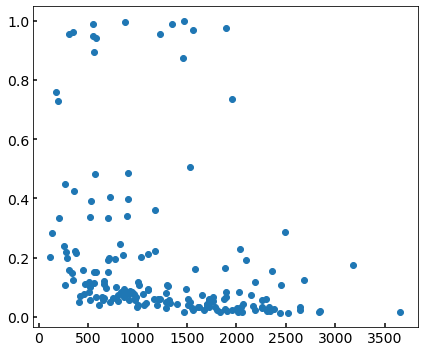

In [80]:
from scipy.stats import pearsonr
features1= features.transpose()
fig, ax = plt.subplots(figsize=(6,5))
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='14')
x = features1[3]
y = features1[5]

ax.scatter(x, y)
corr, _ = pearsonr(x, y)
print('Pearsons correlation:', corr)

# Save
plt.tight_layout()
plt.savefig('CorrMap35.png', dpi=300)
plt.show()

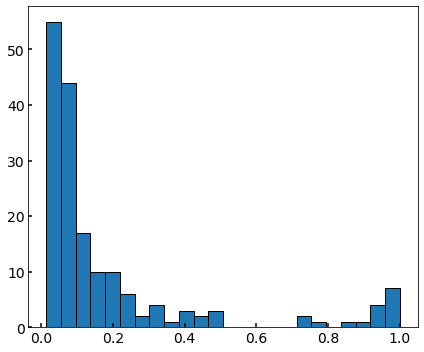

In [7]:
fig, ax = plt.subplots(figsize=(6,5))
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='14')
plt.hist(features1[5], edgecolor='black', bins=int(120/5))

# Save
plt.tight_layout()
plt.savefig('CorrMap55.png', dpi=300)
plt.show()

In [20]:
# Neural net
clf = MLPRegressor(hidden_layer_sizes=(100, 100, 100), activation='relu', 
                   alpha=0.05, learning_rate = 'adaptive', solver='adam')

# Train the model on training data
clf.fit(train_features, train_labels);

/home/kianoosh/anaconda3/envs/my-rdkit-env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
# Instantiate model with 1000 decision trees
clf = DecisionTreeRegressor(max_depth=4, min_samples_split=3)
# clf = XGBRegressor()
# Train the model on training data
clf.fit(train_features, train_labels);
print('doneskies')

doneskies


In [22]:
# Instantiate model with 1000 decision trees
clf = linear_model.BayesianRidge()
# clf = XGBRegressor()
# Train the model on training data
clf.fit(train_features, train_labels);
print('doneskies')

doneskies


In [11]:
# Instantiate model with 1000 decision trees
clf = linear_model.LinearRegression()
# clf = XGBRegressor()
# Train the model on training data
clf.fit(train_features, train_labels);
print('doneskies')

doneskies


In [8]:
# Instantiate model with 1000 decision trees
clf = XGBRegressor(max_depth=4, n_estimators=45, gamma=0.07, 
                   learning_rate = 0.118, subsample=0.725, min_child_weight = 2, 
                  random_state=0)
# clf = linear_model.BayesianRidge()
# clf = XGBRegressor()
# Train the model on training data
clf.fit(train_features, train_labels);
print('Doneskies')

Doneskies


In [13]:
# Instantiate model with 1000 decision trees
clf = RandomForestRegressor(max_depth=4, n_estimators=1000, min_samples_split=3)
# clf = linear_model.BayesianRidge()
# clf = XGBRegressor()
# Train the model on training data
clf.fit(train_features, train_labels);
print('doneskies')

doneskies


In [14]:
test_labels = np.asfarray(test_labels)

# Use the forest's predict method on the test data
predictions = clf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 4), 'units.')

train_labels = np.asfarray(train_labels)

# Use the forest's predict method on the test data
pred_train = clf.predict(train_features)
# Calculate the absolute errors
errors = abs(pred_train - train_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 4), 'units.')

Mean Absolute Error: 9.928 units.
Mean Absolute Error: 8.0165 units.


Doneskies
Mean Absolute Error: 10.6894 units.
Mean Absolute Error: 3.4981 units.


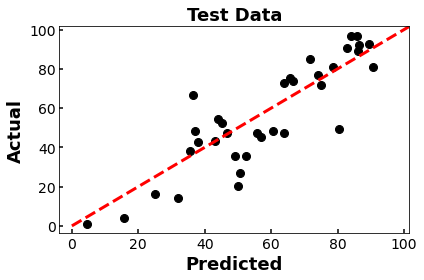

r2 score =  0.7546772222717475
RMSE =  13.313396562164728
MAE =  10.689440770738345
r2 score =  0.9723477159763494


<AxesSubplot:ylabel='Count'>

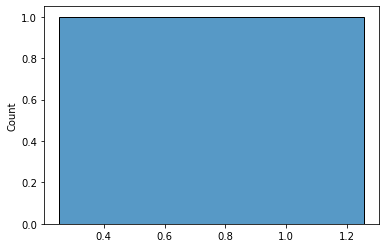

In [131]:
r_squareds = []
for i in range (0, 1):
 # Instantiate model with 1000 decision trees
 clf = XGBRegressor(max_depth=4, n_estimators=45, gamma=0.07, 
                   learning_rate = 0.118, subsample=0.725, min_child_weight = 2, 
                  random_state=i)
 # clf = linear_model.BayesianRidge()
 # clf = XGBRegressor()
 # Train the model on training data
 clf.fit(train_features, train_labels);
 print('Doneskies')
 
 test_labels = np.asfarray(test_labels)

 # Use the forest's predict method on the test data
 predictions = clf.predict(test_features)
 # Calculate the absolute errors
 errors = abs(predictions - test_labels)
 # Print out the mean absolute error (mae)
 print('Mean Absolute Error:', round(np.mean(errors), 4), 'units.')

 train_labels = np.asfarray(train_labels)

 # Use the forest's predict method on the test data
 pred_train = clf.predict(train_features)
 # Calculate the absolute errors
 errors = abs(pred_train - train_labels)
 # Print out the mean absolute error (mae)
 print('Mean Absolute Error:', round(np.mean(errors), 4), 'units.')
 # Plot predictions vs actual values
 # Plot style
 fig, ax = plt.subplots(figsize=(6,4))
 ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='14')
 # ax.set_xlim(20,105)
 # ax.set_ylim(20,105)

 # Predicted 2D/G
 plt.plot(predictions, test_labels, linestyle = 'none', marker = 'o', color='black', markersize='8')
 plt.title('Test Data', fontsize='18', fontname='Arial', fontweight='bold')
 plt.xlabel('Predicted', fontsize='18', fontname='Arial', fontweight='bold')
 plt.ylabel('Actual', fontsize='18', fontname='Arial', fontweight='bold')
 ymin, ymax = plt.ylim()
 plt.xlim(ymin, ymax)
 plt.ylim(ymin, ymax)
 # Make a red line to show perfect predictions
 x2 = np.arange(0, ymax*1.1, .1)
 y2 = np.arange(0, ymax*1.1, .1)
 plt.plot(x2,y2, linestyle='--', linewidth = '3', color='red')

 # Save
 plt.tight_layout()
 # plt.savefig('TestData2DtoG_RF.png', dpi=300)
 plt.show()

 y_pred = predictions
 y_true = test_labels

 r_squared = r2_score(test_labels, predictions)
 r_squareds.append(r_squared)
 print('r2 score = ', r_squared)
 rmse = math.sqrt(mean_squared_error(test_labels, predictions))
 print('RMSE = ', rmse)
 mae = mean_absolute_error(test_labels, predictions)
 print('MAE = ', mae)
 # corr, _ = pearsonr(test_labels, predictions)
 # print('Pearsons correlation: %.3f' % corr)
 # acc = accuracy_func(predictions, test_labels)
 # print('Accuracy: %.3f' % acc)


 r_squared = r2_score(train_labels, pred_train)
 print('r2 score = ', r_squared)

sns.histplot(r_squareds)

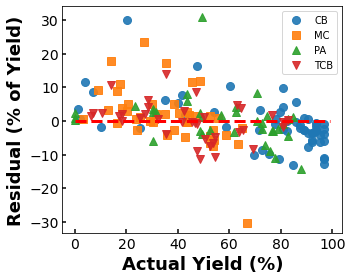

In [132]:
predictions = clf.predict(features)
errors_all = (predictions.reshape(-1, 1) - labels.reshape (-1, 1))

df1['errors'] = errors_all
groups = df1.groupby(['Material'])

# Plot
fig, ax = plt.subplots(figsize=(5,4))
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='14')
counter=0
markers = ['o', 's', '^', 'v']
colors=['blue', 'red', 'green', 'orange']
colors2 = ['maroon', 'darkorange', 'goldenrod', 'dodgerblue']
for name, group in groups:
    ax.plot(group.Graphene_Yield, group.errors, marker=markers[counter], alpha=0.9, 
            linestyle='', ms=8, label=name)
    counter+=1
plt.legend()


x = list(range(0, 100))
y = np.repeat(0, 100)
plt.plot(x, y, linestyle='--', color='red', linewidth='3')
ax.set_xlabel('Actual Yield (%)', fontsize='18', fontname='Arial', fontweight='bold')
ax.set_ylabel('Residual (% of Yield)', fontsize='18', fontname='Arial', fontweight='bold')
plt.tight_layout()
plt.tight_layout()
plt.savefig('resVSGY.png', dpi=200)

In [133]:
bad_result = list(np.where (abs(errors_all) > 20))[0]
for i in bad_result:
    if i not in bad_results:
        bad_results.append(i)
bad_results

[2, 3, 13, 42, 77, 108, 112, 151, 34, 46, 53, 82, 89, 92, 14, 47, 76, 71, 104]

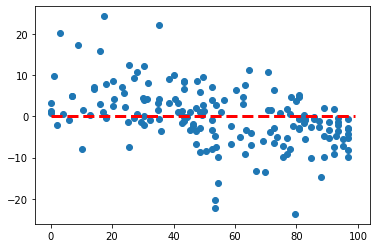

In [25]:
predictions = clf.predict(features)
errors_all = (predictions.reshape(-1, 1) - labels.reshape (-1, 1))
plt.scatter (labels, errors_all)
x = list(range(0, 100))
y = np.repeat(0, 100)
plt.plot(x, y, linestyle='--', color='red', linewidth='3')

In [ ]:
predictions = clf.predict(features)
errors_all = (predictions.reshape(-1, 1) - labels.reshape (-1, 1))
plt.scatter (labels, errors_all)
x = list(range(0, 100))
y = np.repeat(0, 100)
plt.plot(x, y, linestyle='--', color='red', linewidth='3')

In [10]:
df1['Material']

0       CB
1       CB
2       CB
3       CB
4       CB
      ... 
169    TCB
170    TCB
171    TCB
172    TCB
173    TCB
Name: Material, Length: 173, dtype: object

Average of r_squared for test 0.7523453203693011
std of r_squared for test 0.023361881936044628 

Average of r_squared for train 0.9723524245776508
std of r_squared for train 0.0022257276755111933
Mean Absolute Error: 3.2844 units.
r2 score =  0.9750313959935107
time is:  19.246554136276245
Mean Absolute Error for test: 10.6573 units.
r2 score =  0.7403334064963276
****
Average of r_squared for test 0.7924538890820145
std of r_squared for test 0.00580730365377962 

Average of r_squared for train 0.9697361799499019
std of r_squared for train 0.0016572819099351381
Mean Absolute Error: 3.5538 units.
r2 score =  0.9708160991633369
time is:  38.78634738922119
Mean Absolute Error for test: 12.1631 units.
r2 score =  0.7834919082835381
****
Average of r_squared for test 0.8155127408877547
std of r_squared for test 0.01140696283274054 

Average of r_squared for train 0.9687496841905554
std of r_squared for train 0.003369606069609119
Mean Absolute Error: 3.5741 units.
r2 score =  0.970126681167

/home/kianoosh/anaconda3/envs/my-rdkit-env/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


Average of r_squared for test 0.760615260839059
std of r_squared for test 0.01820685215977077 

Average of r_squared for train 0.9681617365837336
std of r_squared for train 0.0022767008528392692
Mean Absolute Error: 3.9139 units.
r2 score =  0.9654876927317739
time is:  423.05364871025085
Mean Absolute Error for test: 11.2713 units.
r2 score =  0.7275670704744286
****
Average of r_squared for test 0.8262571382863968
std of r_squared for test 0.0101739977280362 

Average of r_squared for train 0.9703531440451922
std of r_squared for train 0.002002893386188738
Mean Absolute Error: 3.696 units.
r2 score =  0.9681343599784454
time is:  442.3585259914398
Mean Absolute Error for test: 9.9937 units.
r2 score =  0.8305376274390789
****
Average of r_squared for test 0.6659592575450273
std of r_squared for test 0.030428605767604325 

Average of r_squared for train 0.9709825196459325
std of r_squared for train 0.0023860208741240483
Mean Absolute Error: 3.693 units.
r2 score =  0.9692048790951157


Average of r_squared for test 0.741025692175509
std of r_squared for test 0.01800449708620093 

Average of r_squared for train 0.969910043306648
std of r_squared for train 0.0019400679995332502
Mean Absolute Error: 3.3829 units.
r2 score =  0.9705268736632857
time is:  869.1643850803375
Mean Absolute Error for test: 13.1258 units.
r2 score =  0.72931435939247
****
Average of r_squared for test 0.7992032242459964
std of r_squared for test 0.022967818587888312 

Average of r_squared for train 0.9709801378189757
std of r_squared for train 0.0014247409105353557
Mean Absolute Error: 3.5003 units.
r2 score =  0.9734627856951822
time is:  888.0135254859924
Mean Absolute Error for test: 10.9183 units.
r2 score =  0.7920438785118348
****
Average of r_squared for test 0.8657882176174736
std of r_squared for test 0.015954316539219242 

Average of r_squared for train 0.9710072569529039
std of r_squared for train 0.003222528304026935
Mean Absolute Error: 3.5017 units.
r2 score =  0.9734519684776889

Average of r_squared for test 0.41267816080474623
std of r_squared for test 0.02550420176659701 

Average of r_squared for train 0.9755020049465102
std of r_squared for train 0.0013870285181938847
Mean Absolute Error: 3.3125 units.
r2 score =  0.9755168374548381
time is:  1248.1271750926971
Mean Absolute Error for test: 15.3373 units.
r2 score =  0.3806894517423336
****
Average of r_squared for test 0.8026684331579907
std of r_squared for test 0.015737400305161187 

Average of r_squared for train 0.971827099638592
std of r_squared for train 0.001885472670248948
Mean Absolute Error: 3.518 units.
r2 score =  0.9710229084576419
time is:  1249.0170583724976
Mean Absolute Error for test: 11.2036 units.
r2 score =  0.7941275512060717
****
Average of r_squared for test 0.682203218515475
std of r_squared for test 0.026396829046396387 

Average of r_squared for train 0.9713667379101038
std of r_squared for train 0.0016279367189683774
Mean Absolute Error: 3.4775 units.
r2 score =  0.974260541520

Average of r_squared for test 0.7755205761248194
std of r_squared for test 0.021194604329085435 

Average of r_squared for train 0.9701899716645588
std of r_squared for train 0.0028627392566845716
Mean Absolute Error: 3.7887 units.
r2 score =  0.9694547837225158
time is:  1269.8810782432556
Mean Absolute Error for test: 10.0632 units.
r2 score =  0.7941175290104667
****
Average of r_squared for test 0.7752820372306918
std of r_squared for test 0.01349022458895975 

Average of r_squared for train 0.9726269744369176
std of r_squared for train 0.0025855801238114503
Mean Absolute Error: 3.6965 units.
r2 score =  0.9699899514057723
time is:  1270.7950086593628
Mean Absolute Error for test: 11.455 units.
r2 score =  0.7760542108190225
****
Average of r_squared for test 0.7567525504500209
std of r_squared for test 0.01979600702988524 

Average of r_squared for train 0.9708133894187077
std of r_squared for train 0.0016047233539011566
Mean Absolute Error: 3.5749 units.
r2 score =  0.97081501401

Average of r_squared for test 0.7824579103014186
std of r_squared for test 0.01391358033217471 

Average of r_squared for train 0.9704131306196823
std of r_squared for train 0.00263820232614391
Mean Absolute Error: 3.7964 units.
r2 score =  0.9689606640191232
time is:  1291.5197942256927
Mean Absolute Error for test: 10.3654 units.
r2 score =  0.7758087451976722
****
Average of r_squared for test 0.8276122215005046
std of r_squared for test 0.008220915627990958 

Average of r_squared for train 0.9686694004113166
std of r_squared for train 0.0026289167976602554
Mean Absolute Error: 3.7285 units.
r2 score =  0.9698140954740955
time is:  1292.403242111206
Mean Absolute Error for test: 9.0042 units.
r2 score =  0.8265578184489232
****
Average of r_squared for test 0.6466169984773755
std of r_squared for test 0.041567560307264044 

Average of r_squared for train 0.9707256820160435
std of r_squared for train 0.0014128070354459824
Mean Absolute Error: 3.5612 units.
r2 score =  0.9718330025170

Average of r_squared for test 0.6202351057353199
std of r_squared for test 0.021402421477129285 

Average of r_squared for train 0.9772078744441689
std of r_squared for train 0.0018517950447295088
Mean Absolute Error: 3.4807 units.
r2 score =  0.9748508599484492
time is:  1312.8958876132965
Mean Absolute Error for test: 13.0185 units.
r2 score =  0.5954395321944234
****
Average of r_squared for test 0.7987569235402532
std of r_squared for test 0.04181213253075785 

Average of r_squared for train 0.9683022039864142
std of r_squared for train 0.0034349510307194837
Mean Absolute Error: 4.1029 units.
r2 score =  0.96224452011952
time is:  1313.8431754112244
Mean Absolute Error for test: 11.0655 units.
r2 score =  0.8210910081204512
****
Average of r_squared for test 0.6824974752615397
std of r_squared for test 0.01593649516766267 

Average of r_squared for train 0.9738038089883702
std of r_squared for train 0.002068451936743134
Mean Absolute Error: 3.6407 units.
r2 score =  0.9724589554604

Average of r_squared for test 0.8101306690836161
std of r_squared for test 0.013364862663695253 

Average of r_squared for train 0.9717850593472356
std of r_squared for train 0.0014678871779171111
Mean Absolute Error: 3.7615 units.
r2 score =  0.9695361806280594
time is:  1334.4268417358398
Mean Absolute Error for test: 9.1127 units.
r2 score =  0.8073744390302706
****
Average of r_squared for test 0.7875242791011954
std of r_squared for test 0.017911134936820436 

Average of r_squared for train 0.9716751647573062
std of r_squared for train 0.0027438162574015138
Mean Absolute Error: 3.3349 units.
r2 score =  0.9740602636292447
time is:  1335.3125259876251
Mean Absolute Error for test: 9.849 units.
r2 score =  0.8052017696478132
****
Average of r_squared for test 0.8214902293526227
std of r_squared for test 0.012350740208380114 

Average of r_squared for train 0.9702818664168478
std of r_squared for train 0.0017559949879639263
Mean Absolute Error: 3.6278 units.
r2 score =  0.96880919635

Average of r_squared for test 0.5314648071057014
std of r_squared for test 0.041575280383222744 

Average of r_squared for train 0.9725101420329143
std of r_squared for train 0.0009662376075876178
Mean Absolute Error: 3.6992 units.
r2 score =  0.9707809486236935
time is:  1355.5531215667725
Mean Absolute Error for test: 11.5598 units.
r2 score =  0.5608548048044912
****
Average of r_squared for test 0.7363895131550755
std of r_squared for test 0.021610586783024827 

Average of r_squared for train 0.9704052116409201
std of r_squared for train 0.0013391359449862537
Mean Absolute Error: 3.8353 units.
r2 score =  0.9691070267366395
time is:  1356.4217433929443
Mean Absolute Error for test: 10.0055 units.
r2 score =  0.7497874172735459
****
Average of r_squared for test 0.5091477684986231
std of r_squared for test 0.007299371920309719 

Average of r_squared for train 0.9782307320001511
std of r_squared for train 0.0013279643000114656
Mean Absolute Error: 3.2008 units.
r2 score =  0.97620487

Average of r_squared for test 0.6427593009096915
std of r_squared for test 0.025531199265213966 

Average of r_squared for train 0.977033657586498
std of r_squared for train 0.0016035700087355636
Mean Absolute Error: 3.4083 units.
r2 score =  0.9773051705471446
time is:  1375.8452711105347
Mean Absolute Error for test: 12.1214 units.
r2 score =  0.6213785124472538
****
Average of r_squared for test 0.7692260351951601
std of r_squared for test 0.00467190155164231 

Average of r_squared for train 0.9727971262749131
std of r_squared for train 0.0013195811691905752
Mean Absolute Error: 3.3992 units.
r2 score =  0.9751109968152659
time is:  1376.724828004837
Mean Absolute Error for test: 10.6608 units.
r2 score =  0.766955643785169
****
Average of r_squared for test 0.7833378050731781
std of r_squared for test 0.028168905890984364 

Average of r_squared for train 0.9723317146999563
std of r_squared for train 0.001489344401428331
Mean Absolute Error: 3.6369 units.
r2 score =  0.9714575401046

Average of r_squared for test 0.8342384827084952
std of r_squared for test 0.004435034854380989 

Average of r_squared for train 0.9684420449712376
std of r_squared for train 0.0043300320846494525
Mean Absolute Error: 3.5206 units.
r2 score =  0.9730714461407021
time is:  1395.98592877388
Mean Absolute Error for test: 9.2929 units.
r2 score =  0.8398309613936433
****
Average of r_squared for test 0.7587994891763816
std of r_squared for test 0.014227433864634462 

Average of r_squared for train 0.9708325625839136
std of r_squared for train 0.0008358816128099229
Mean Absolute Error: 3.6202 units.
r2 score =  0.971120598950266
time is:  1396.839962720871
Mean Absolute Error for test: 11.4495 units.
r2 score =  0.7797325618725215
****
Average of r_squared for test 0.7782961345504654
std of r_squared for test 0.01848105221859684 

Average of r_squared for train 0.970416784753019
std of r_squared for train 0.0014206258948095843
Mean Absolute Error: 3.5951 units.
r2 score =  0.972595516104980

Average of r_squared for test 0.6853153700830941
std of r_squared for test 0.020052625100080414 

Average of r_squared for train 0.974518464660834
std of r_squared for train 0.0010350017631437537
Mean Absolute Error: 3.3521 units.
r2 score =  0.97548941742436
time is:  1416.452077627182
Mean Absolute Error for test: 11.9138 units.
r2 score =  0.6938325910230814
****
Average of r_squared for test 0.7711598608174726
std of r_squared for test 0.01361602179968477 

Average of r_squared for train 0.9687329988478384
std of r_squared for train 0.0008770952766128068
Mean Absolute Error: 3.7619 units.
r2 score =  0.9693302938838125
time is:  1417.388637304306
Mean Absolute Error for test: 9.5753 units.
r2 score =  0.7596566792724523
****
Average of r_squared for test 0.6815229172548605
std of r_squared for test 0.022078701177432505 

Average of r_squared for train 0.9739299973574264
std of r_squared for train 0.0019408680349521114
Mean Absolute Error: 3.4907 units.
r2 score =  0.973734979946710

Average of r_squared for test 0.31951406565146795
std of r_squared for test 0.07103116726092801 

Average of r_squared for train 0.9765104774408689
std of r_squared for train 0.0021941908743316014
Mean Absolute Error: 3.1692 units.
r2 score =  0.9781556276236515
time is:  1436.9347105026245
Mean Absolute Error for test: 15.2985 units.
r2 score =  0.2137890954263959
****
Average of r_squared for test 0.6829415609612962
std of r_squared for test 0.01600171958755721 

Average of r_squared for train 0.9742930979622724
std of r_squared for train 0.001681153614970226
Mean Absolute Error: 3.5685 units.
r2 score =  0.97200718215853
time is:  1437.7823173999786
Mean Absolute Error for test: 12.3188 units.
r2 score =  0.6594816229392043
****
Average of r_squared for test 0.7784644558761833
std of r_squared for test 0.020936572497578455 

Average of r_squared for train 0.9730474186771279
std of r_squared for train 0.0013792208641565905
Mean Absolute Error: 3.6388 units.
r2 score =  0.971167985745

Average of r_squared for test 0.7456233917759036
std of r_squared for test 0.018302036466178485 

Average of r_squared for train 0.9707438846141093
std of r_squared for train 0.0017087886634342855
Mean Absolute Error: 3.6044 units.
r2 score =  0.9723161129692983
time is:  1457.6032989025116
Mean Absolute Error for test: 10.0521 units.
r2 score =  0.7483653843534392
****
Average of r_squared for test 0.6125406424651743
std of r_squared for test 0.023413096554309336 

Average of r_squared for train 0.9752398444759812
std of r_squared for train 0.0014441746838999752
Mean Absolute Error: 3.3367 units.
r2 score =  0.97652997879122
time is:  1458.4552807807922
Mean Absolute Error for test: 13.4522 units.
r2 score =  0.6034991825076794
****
Average of r_squared for test 0.8504562914906266
std of r_squared for test 0.006497850689027362 

Average of r_squared for train 0.9675964915161244
std of r_squared for train 0.0017872111208040893
Mean Absolute Error: 3.892 units.
r2 score =  0.96474926552

Average of r_squared for test 0.6744241388260294
std of r_squared for test 0.024204174057668882 

Average of r_squared for train 0.9760582523761029
std of r_squared for train 0.0017962768101442111
Mean Absolute Error: 3.3443 units.
r2 score =  0.9764662288120954
time is:  1477.6707155704498
Mean Absolute Error for test: 11.4323 units.
r2 score =  0.7038102815839038
****
Average of r_squared for test 0.6743602810096899
std of r_squared for test 0.028623820040119118 

Average of r_squared for train 0.9725270120588781
std of r_squared for train 0.0014408699388732656
Mean Absolute Error: 3.4174 units.
r2 score =  0.9750807669843269
time is:  1478.550725221634
Mean Absolute Error for test: 10.5428 units.
r2 score =  0.7036969680735555
****
Average of r_squared for test 0.7424735698558865
std of r_squared for test 0.014303513436416537 

Average of r_squared for train 0.9751921379191076
std of r_squared for train 0.0007436935194316586
Mean Absolute Error: 3.4088 units.
r2 score =  0.974663664

Average of r_squared for test 0.7207543224941114
std of r_squared for test 0.02184146339191121 

Average of r_squared for train 0.9730530048273351
std of r_squared for train 0.0020347995399693525
Mean Absolute Error: 3.272 units.
r2 score =  0.9762393304445035
time is:  1498.7325601577759
Mean Absolute Error for test: 10.53 units.
r2 score =  0.7490726555253719
****
Average of r_squared for test 0.712290396948441
std of r_squared for test 0.02943724971658214 

Average of r_squared for train 0.9713982012891236
std of r_squared for train 0.00041860939760571774
Mean Absolute Error: 3.7392 units.
r2 score =  0.9711088543021471
time is:  1499.6647984981537
Mean Absolute Error for test: 9.567 units.
r2 score =  0.7336359099437708
****
Average of r_squared for test 0.7725499590975954
std of r_squared for test 0.02396817399203395 

Average of r_squared for train 0.9711278528414097
std of r_squared for train 0.002501968798320591
Mean Absolute Error: 3.9127 units.
r2 score =  0.9699382147015125


Average of r_squared for test 0.7716432170206085
std of r_squared for test 0.016976623877230756 

Average of r_squared for train 0.9756417187380289
std of r_squared for train 0.0019861937530923964
Mean Absolute Error: 3.2283 units.
r2 score =  0.9778892199561584
time is:  1518.843079328537
Mean Absolute Error for test: 10.1864 units.
r2 score =  0.7599267592891388
****
Average of r_squared for test 0.5892730723313757
std of r_squared for test 0.03045941018211215 

Average of r_squared for train 0.9765566584035046
std of r_squared for train 0.0020087944470400425
Mean Absolute Error: 3.3018 units.
r2 score =  0.975844226078959
time is:  1519.6977162361145
Mean Absolute Error for test: 12.3129 units.
r2 score =  0.6064418156931057
****
Average of r_squared for test 0.6986558430285194
std of r_squared for test 0.04367334118500421 

Average of r_squared for train 0.9720363575450597
std of r_squared for train 0.0018575567653063283
Mean Absolute Error: 3.3241 units.
r2 score =  0.974008869909

Average of r_squared for test 0.8084481722449066
std of r_squared for test 0.013949795171285218 

Average of r_squared for train 0.9736936162644492
std of r_squared for train 0.0017518068443721359
Mean Absolute Error: 3.3354 units.
r2 score =  0.9735787160274644
time is:  1538.918832540512
Mean Absolute Error for test: 10.8888 units.
r2 score =  0.8005101572668388
****
Average of r_squared for test 0.7731769781633494
std of r_squared for test 0.009820546884249604 

Average of r_squared for train 0.9733332569677124
std of r_squared for train 0.0013287826333060304
Mean Absolute Error: 3.4673 units.
r2 score =  0.9731909478635153
time is:  1539.7693846225739
Mean Absolute Error for test: 10.1332 units.
r2 score =  0.77456616134766
****
Average of r_squared for test 0.812810623582694
std of r_squared for test 0.0218222750002793 

Average of r_squared for train 0.9691693196209394
std of r_squared for train 0.0020061935759496893
Mean Absolute Error: 3.9584 units.
r2 score =  0.96822196847000

Average of r_squared for test 0.7279312865317553
std of r_squared for test 0.01510822046416313 

Average of r_squared for train 0.9718592809383102
std of r_squared for train 0.00283739587517273
Mean Absolute Error: 3.6107 units.
r2 score =  0.9728683620618246
time is:  1559.1950285434723
Mean Absolute Error for test: 12.3871 units.
r2 score =  0.7323590899289966
****
Average of r_squared for test 0.7787633383750413
std of r_squared for test 0.011861168314937833 

Average of r_squared for train 0.9703633472188121
std of r_squared for train 0.0030701134274358282
Mean Absolute Error: 3.5758 units.
r2 score =  0.9727453630058268
time is:  1560.0462138652802
Mean Absolute Error for test: 9.6055 units.
r2 score =  0.7611822517052768
****
Average of r_squared for test 0.7923747602808838
std of r_squared for test 0.015181576381931338 

Average of r_squared for train 0.9685482384509992
std of r_squared for train 0.0032074307989186117
Mean Absolute Error: 3.9929 units.
r2 score =  0.967962653159

Average of r_squared for test 0.7645253837307573
std of r_squared for test 0.010194218103554292 

Average of r_squared for train 0.9696176053917644
std of r_squared for train 0.0013869202368706104
Mean Absolute Error: 3.6057 units.
r2 score =  0.9699635102494166
time is:  1579.7311787605286
Mean Absolute Error for test: 11.3703 units.
r2 score =  0.7601592009144494
****
Average of r_squared for test 0.8338855820097478
std of r_squared for test 0.017397474987793864 

Average of r_squared for train 0.9693416000585653
std of r_squared for train 0.001216685290881211
Mean Absolute Error: 3.8149 units.
r2 score =  0.9696824691638185
time is:  1580.5870988368988
Mean Absolute Error for test: 8.1531 units.
r2 score =  0.8398425943319673
****
Average of r_squared for test 0.7522505888120437
std of r_squared for test 0.010339616972086305 

Average of r_squared for train 0.9694368630643924
std of r_squared for train 0.002395252391484053
Mean Absolute Error: 3.8507 units.
r2 score =  0.96826633005

Average of r_squared for test 0.8165225345799973
std of r_squared for test 0.013105058066551392 

Average of r_squared for train 0.9696156738426595
std of r_squared for train 0.0013562367073047456
Mean Absolute Error: 3.8404 units.
r2 score =  0.9674556904966636
time is:  1600.5708622932434
Mean Absolute Error for test: 9.8813 units.
r2 score =  0.8175758228194592
****
Average of r_squared for test 0.8335583455777975
std of r_squared for test 0.017648616488405853 

Average of r_squared for train 0.9722928445762605
std of r_squared for train 0.0013322607934919829
Mean Absolute Error: 3.7789 units.
r2 score =  0.9700271311176849
time is:  1601.4318823814392
Mean Absolute Error for test: 9.2332 units.
r2 score =  0.8519137554671188
****
Average of r_squared for test 0.682422142484078
std of r_squared for test 0.015789597090689486 

Average of r_squared for train 0.9718812443462527
std of r_squared for train 0.001994166870464459
Mean Absolute Error: 3.6523 units.
r2 score =  0.971699460286

Average of r_squared for test 0.8146251193575399
std of r_squared for test 0.012902443845755921 

Average of r_squared for train 0.9664604679557496
std of r_squared for train 0.0029251458682795317
Mean Absolute Error: 3.8323 units.
r2 score =  0.9656293463560758
time is:  1620.8500797748566
Mean Absolute Error for test: 10.9591 units.
r2 score =  0.8076734554435744
****
Average of r_squared for test 0.7456856889828216
std of r_squared for test 0.02088765809420036 

Average of r_squared for train 0.9712355251684975
std of r_squared for train 0.0015301677745440472
Mean Absolute Error: 3.6968 units.
r2 score =  0.9696056715197465
time is:  1621.724280834198
Mean Absolute Error for test: 10.0278 units.
r2 score =  0.747183231701687
****
Average of r_squared for test 0.7502997772984867
std of r_squared for test 0.03635498541515329 

Average of r_squared for train 0.9704440687443947
std of r_squared for train 0.0016980746484377674
Mean Absolute Error: 3.5697 units.
r2 score =  0.972440543197

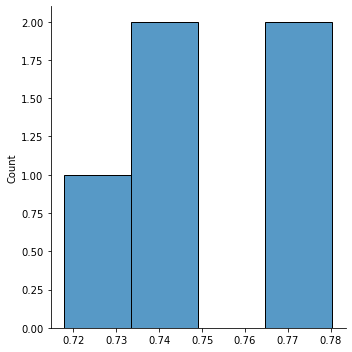

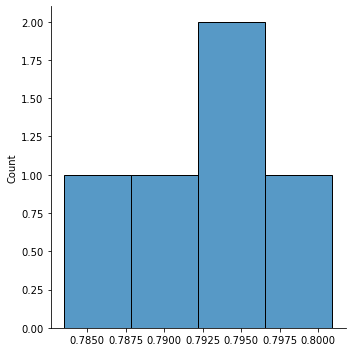

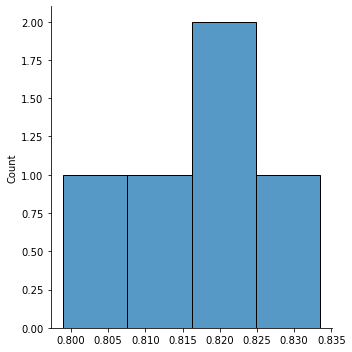

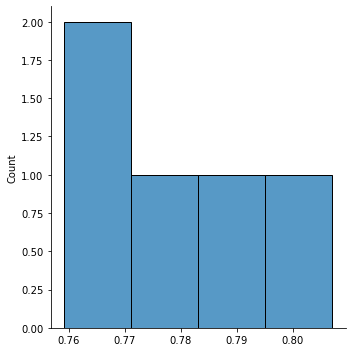

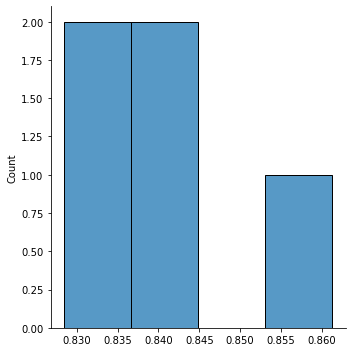

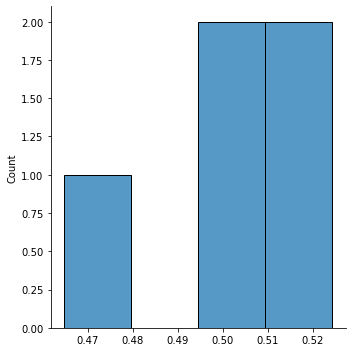

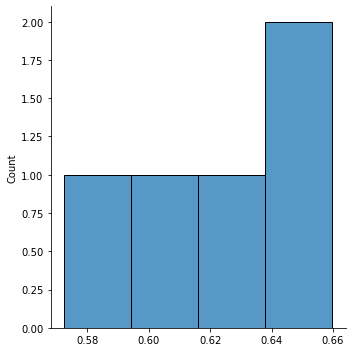

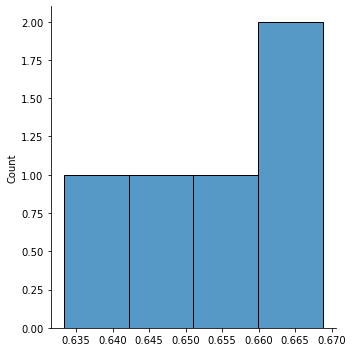

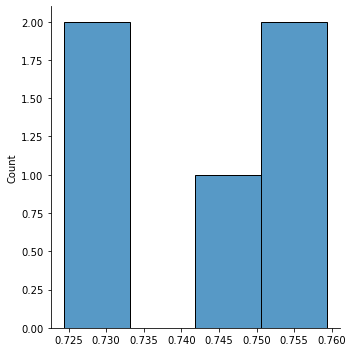

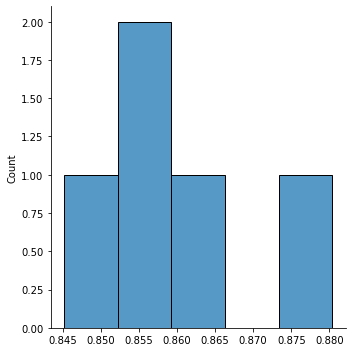

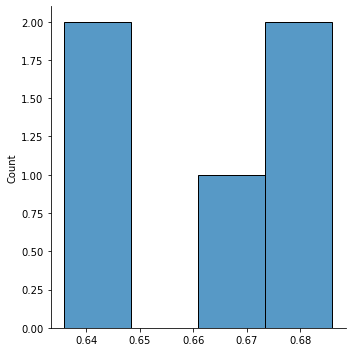

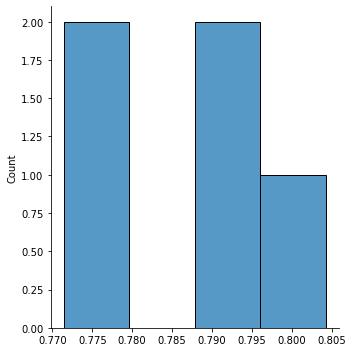

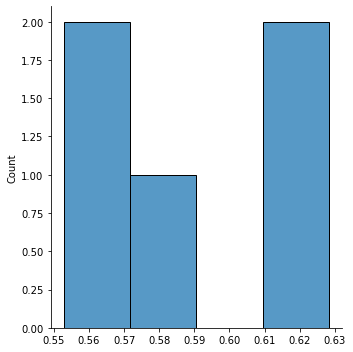

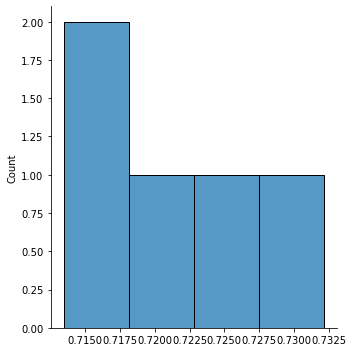

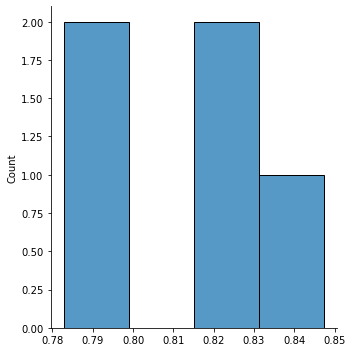

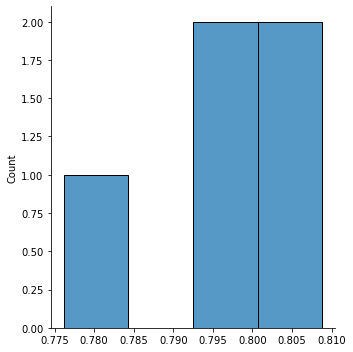

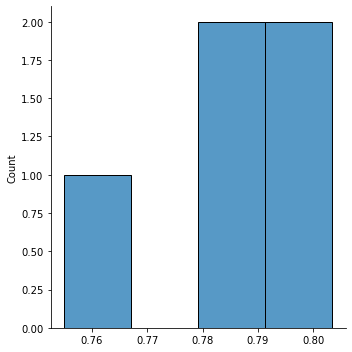

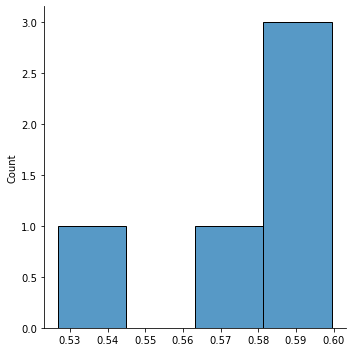

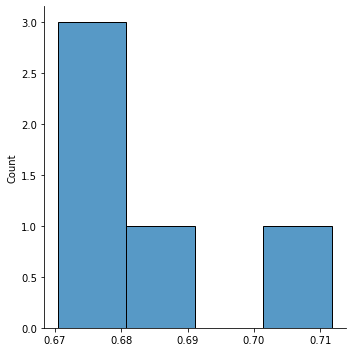

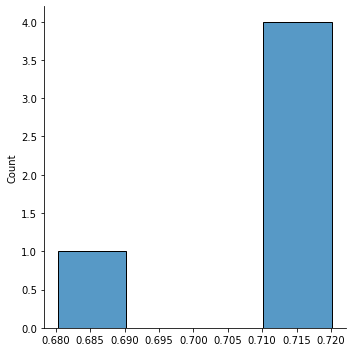

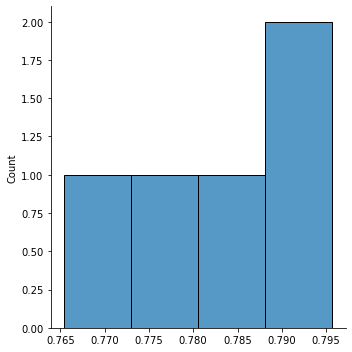

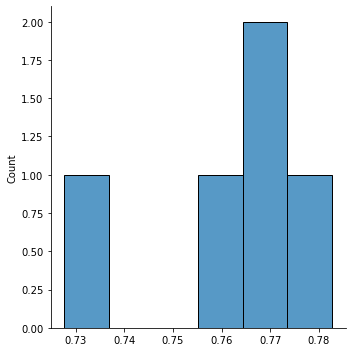

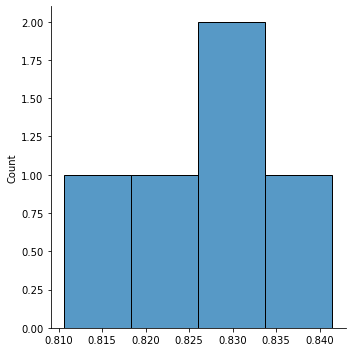

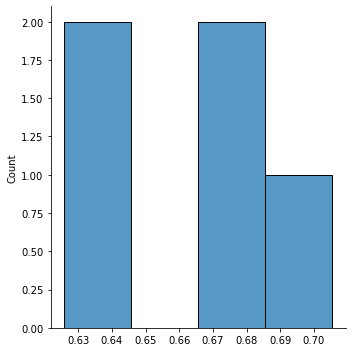

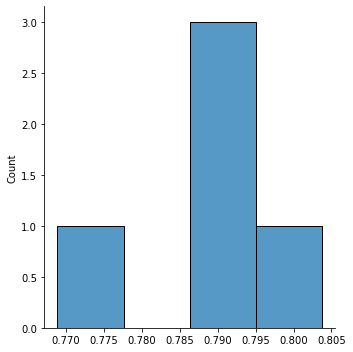

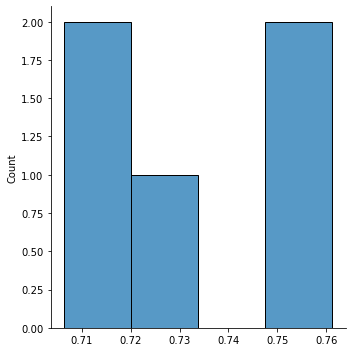

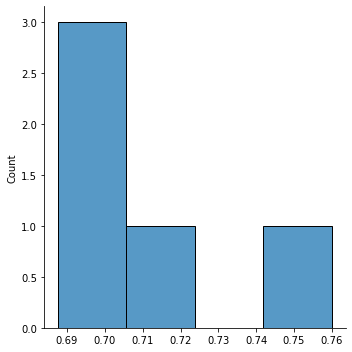

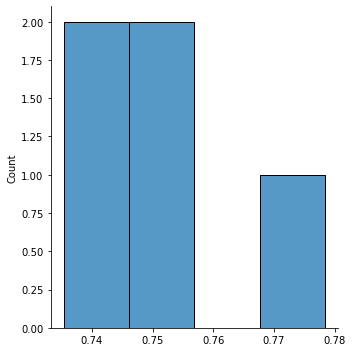

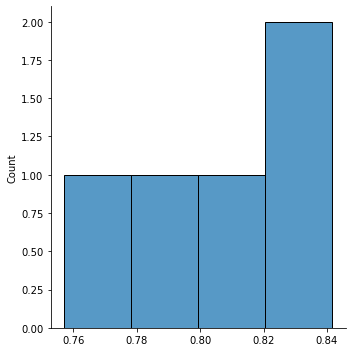

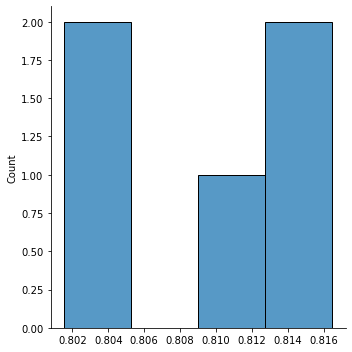

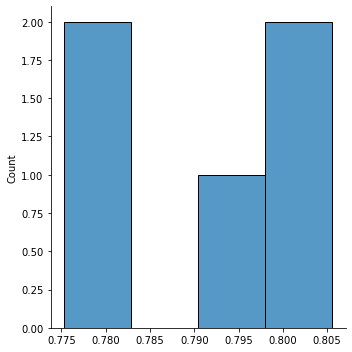

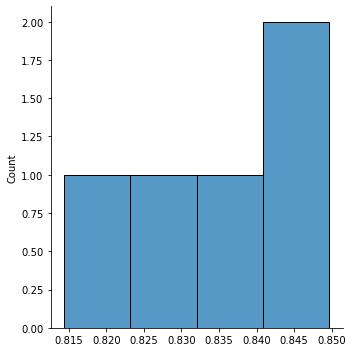

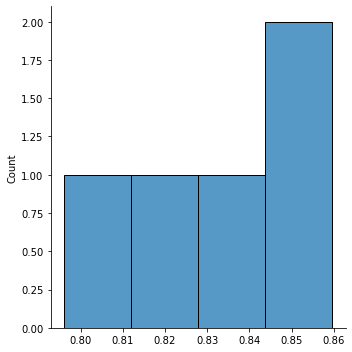

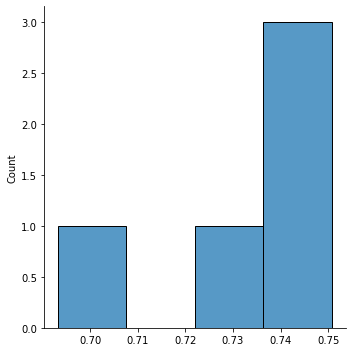

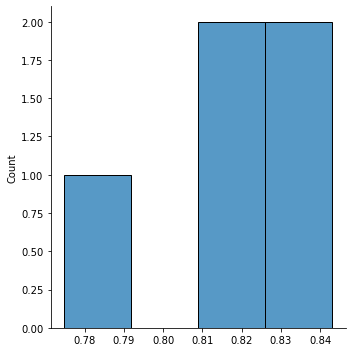

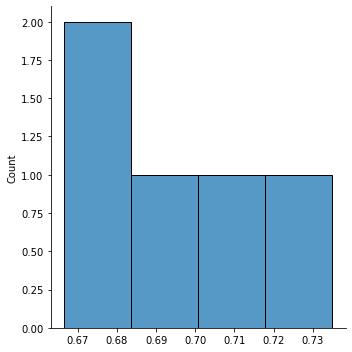

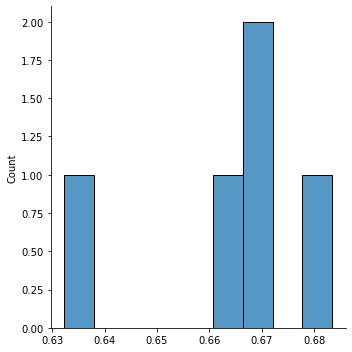

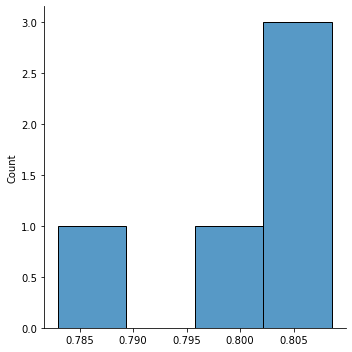

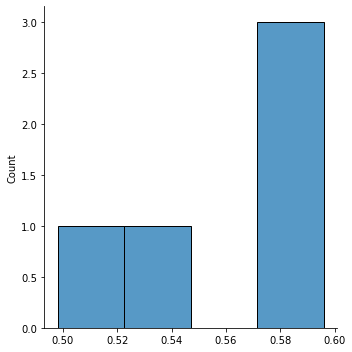

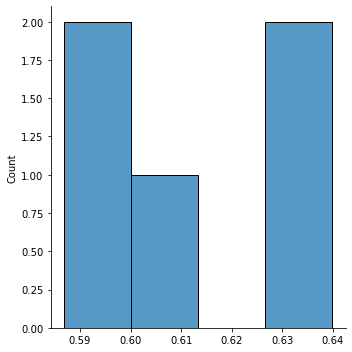

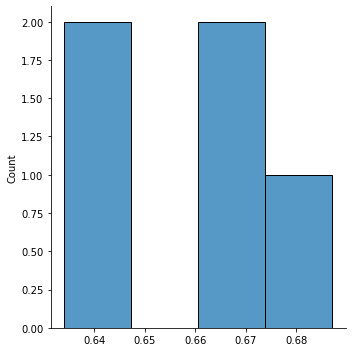

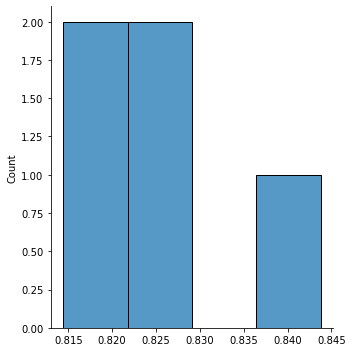

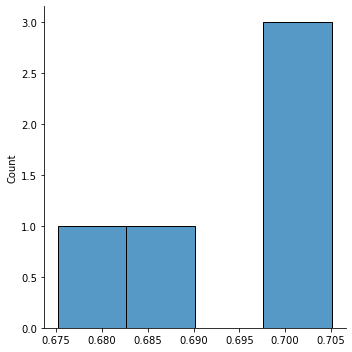

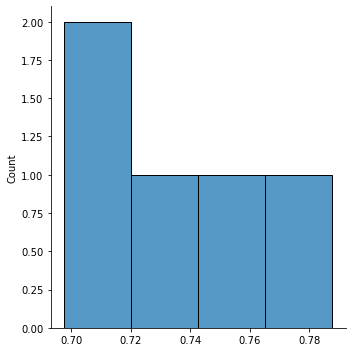

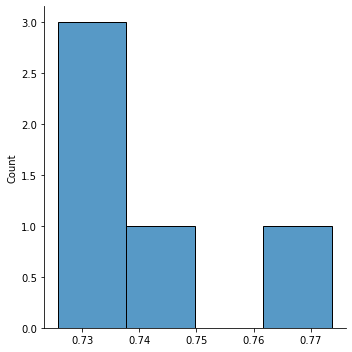

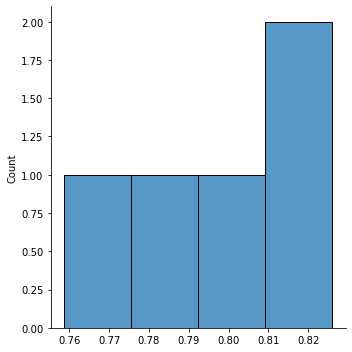

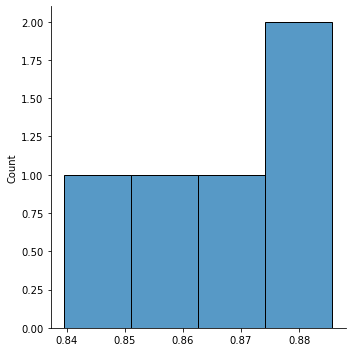

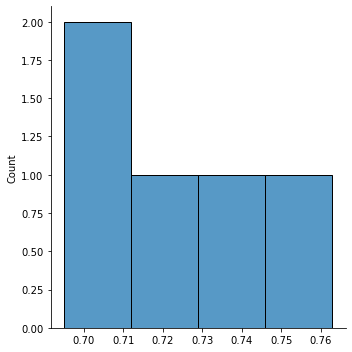

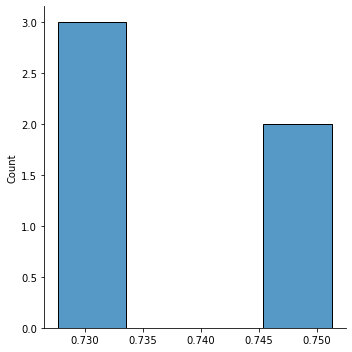

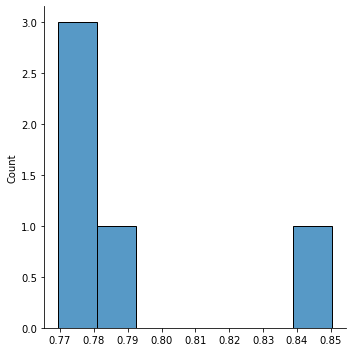

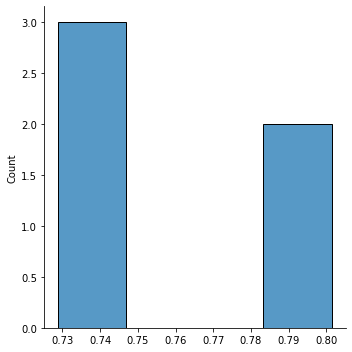

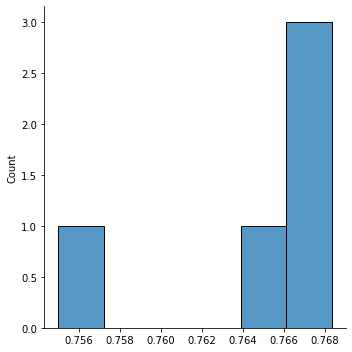

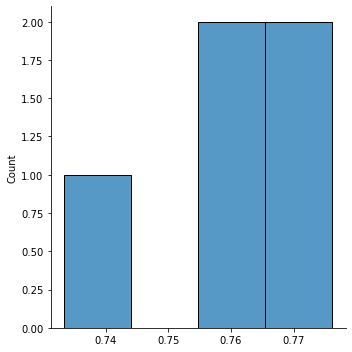

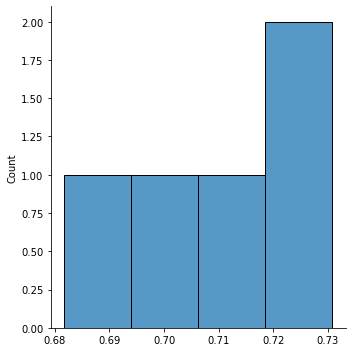

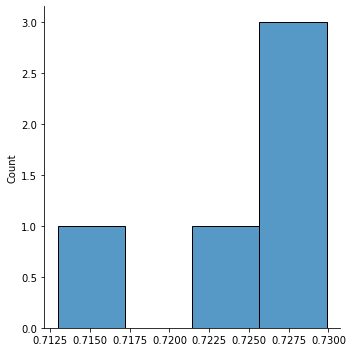

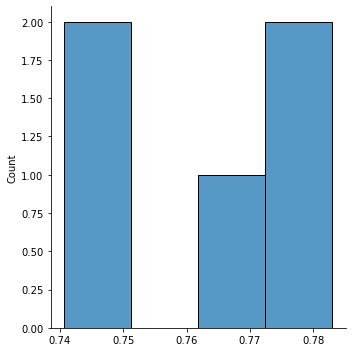

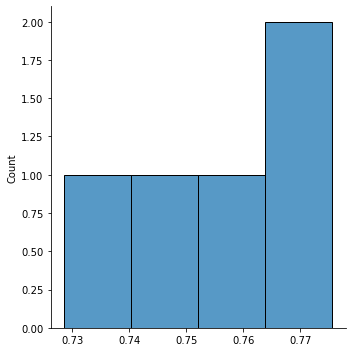

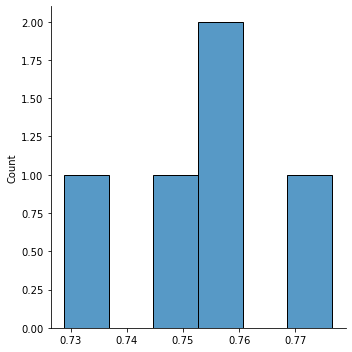

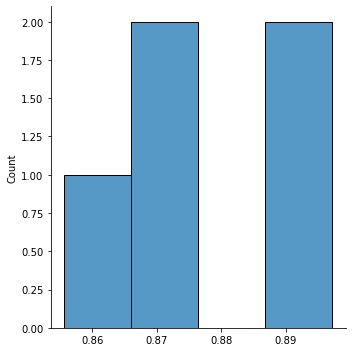

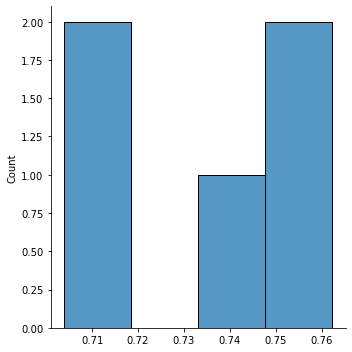

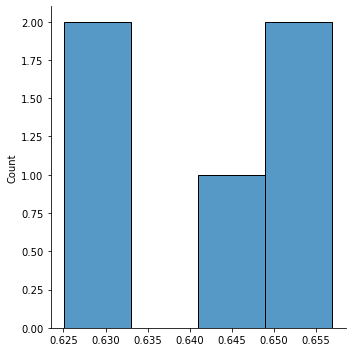

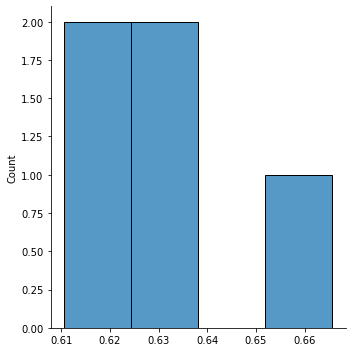

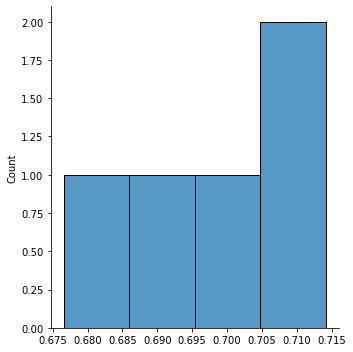

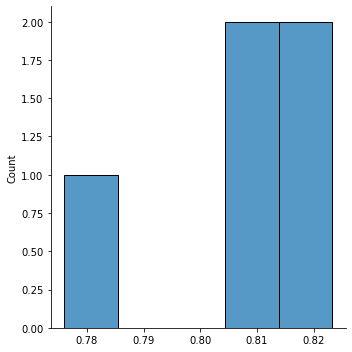

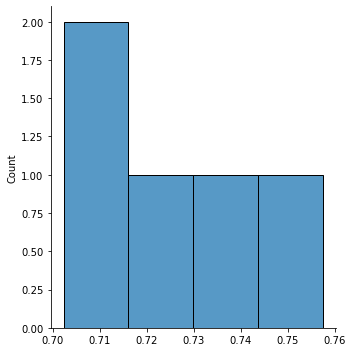

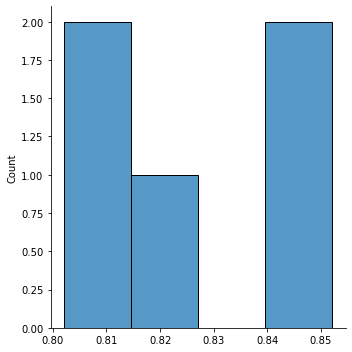

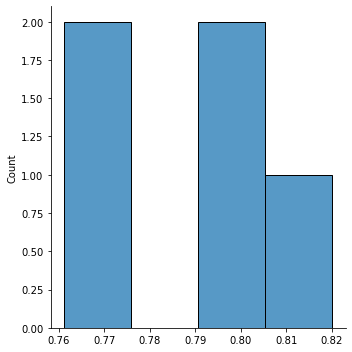

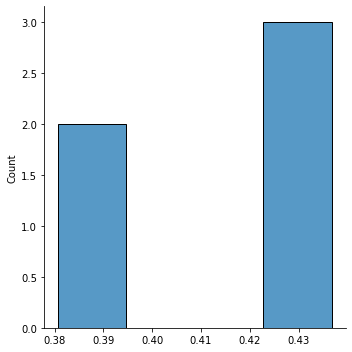

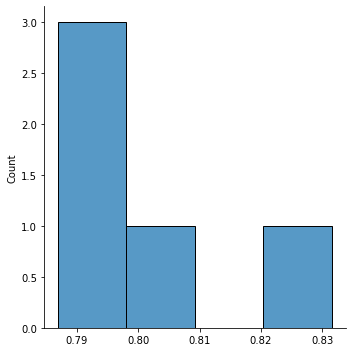

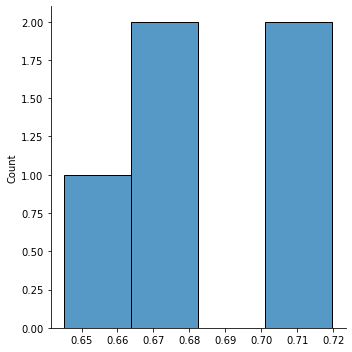

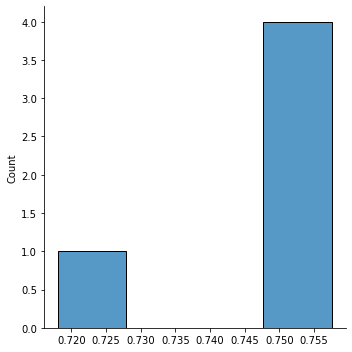

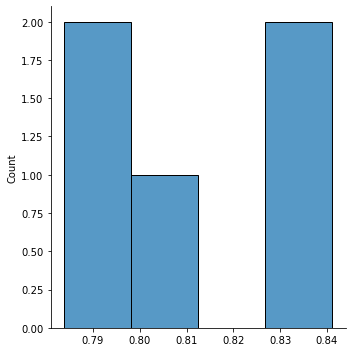

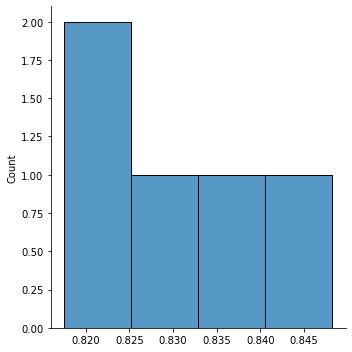

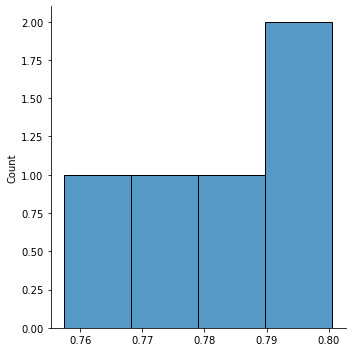

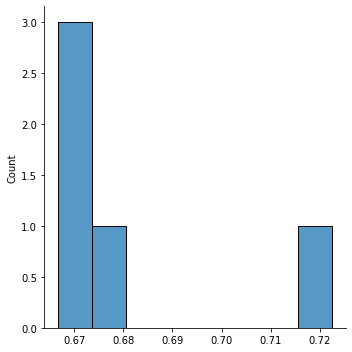

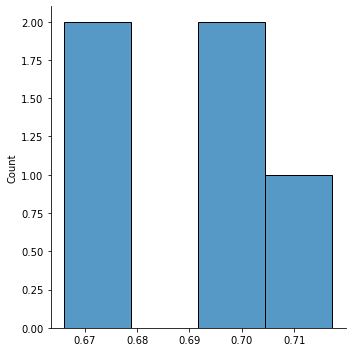

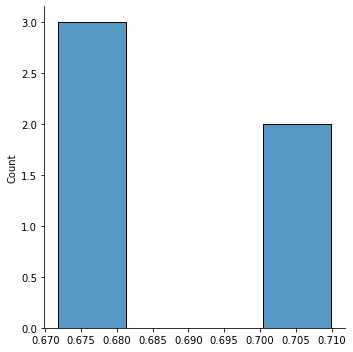

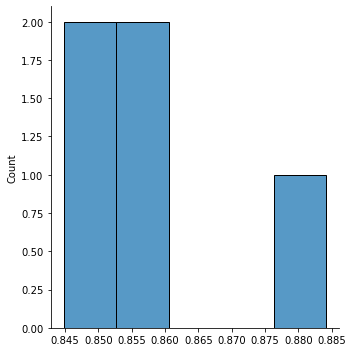

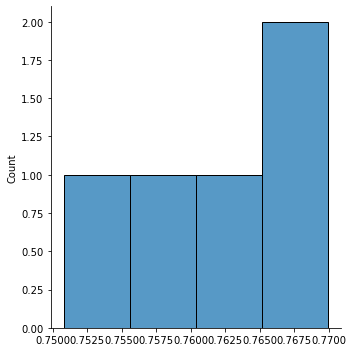

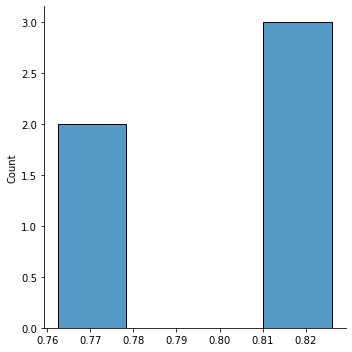

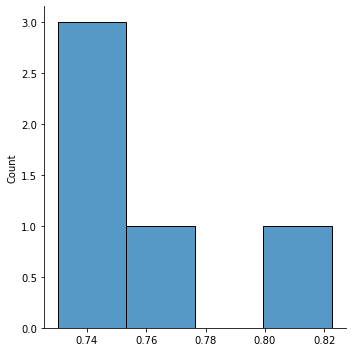

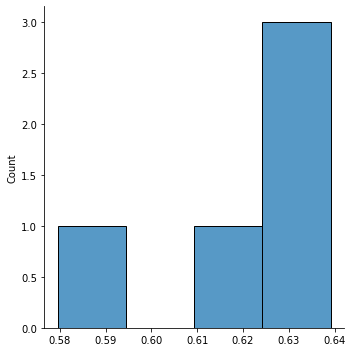

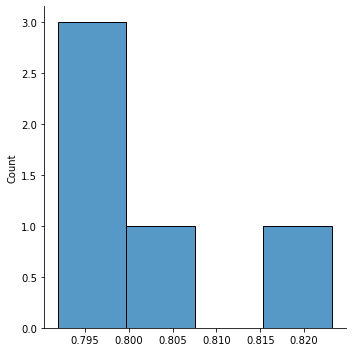

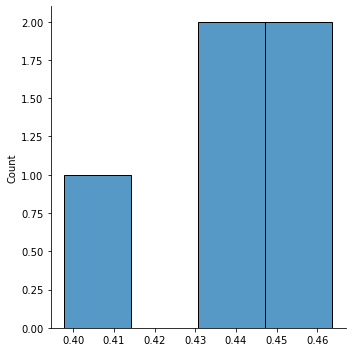

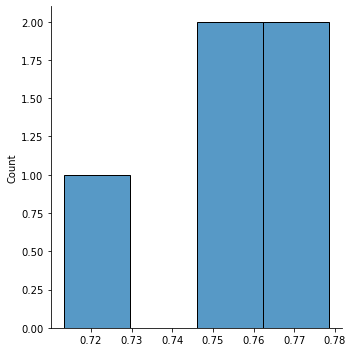

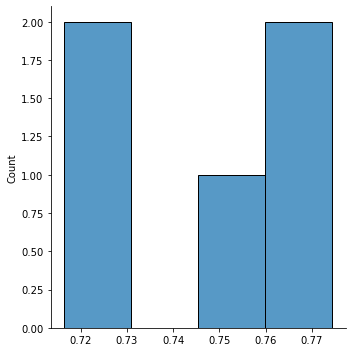

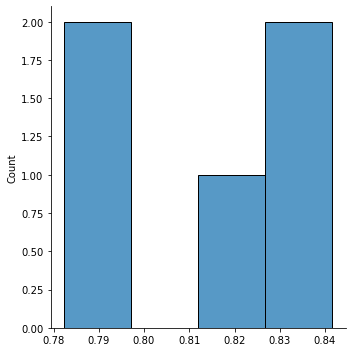

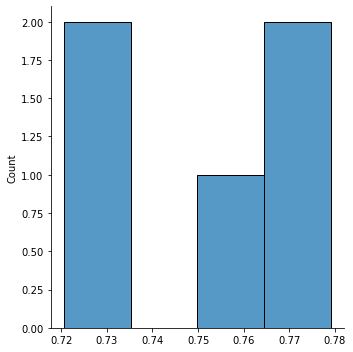

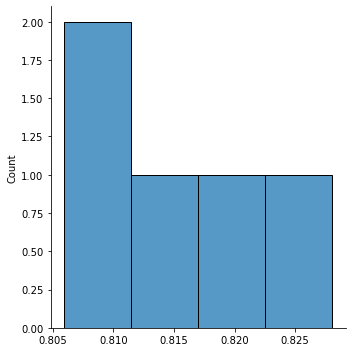

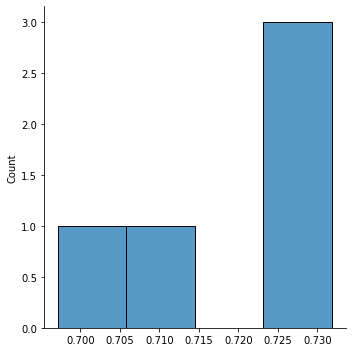

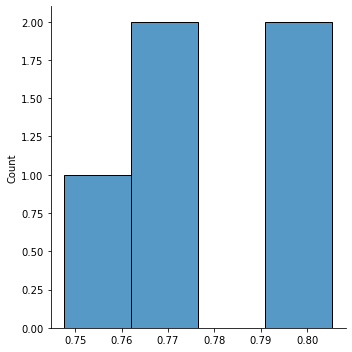

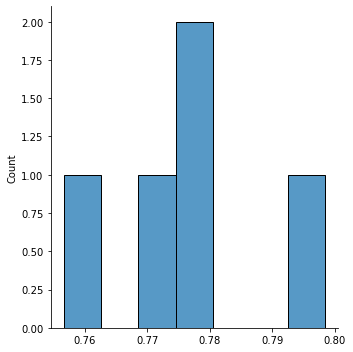

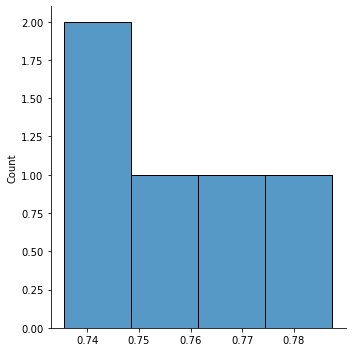

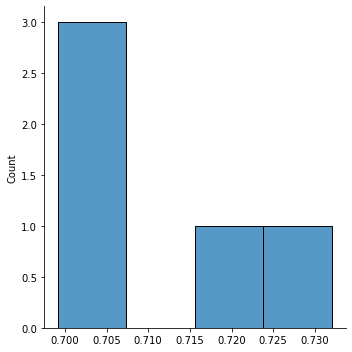

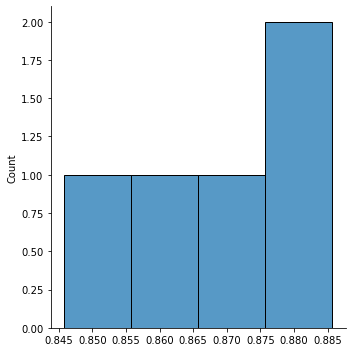

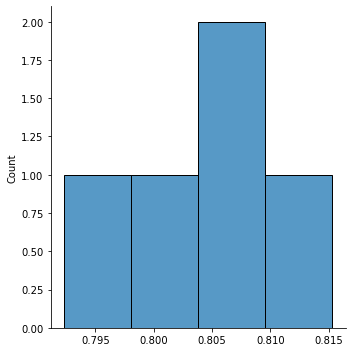

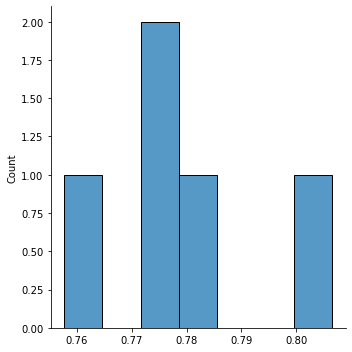

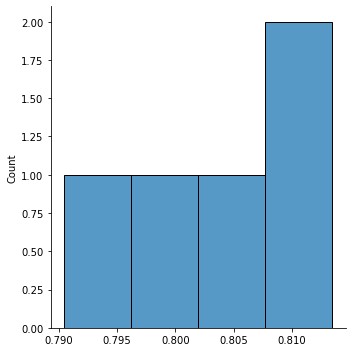

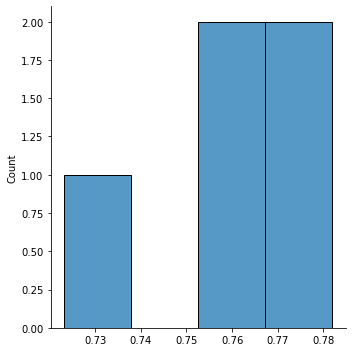

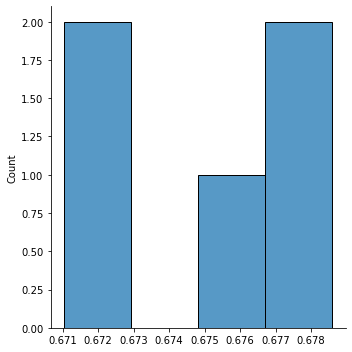

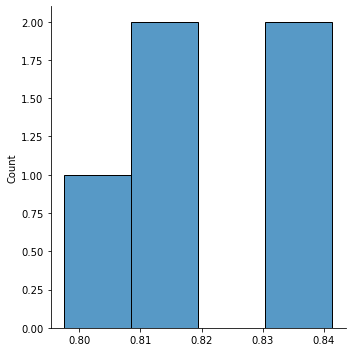

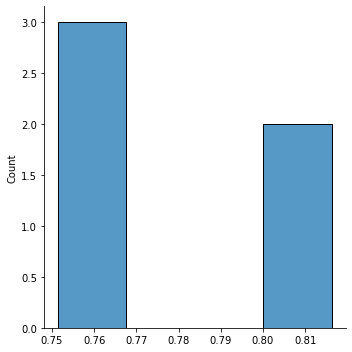

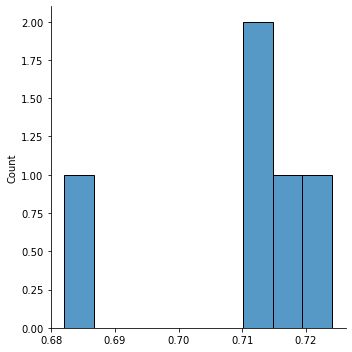

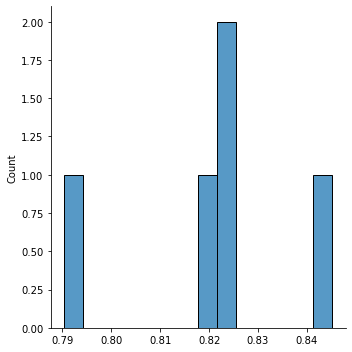

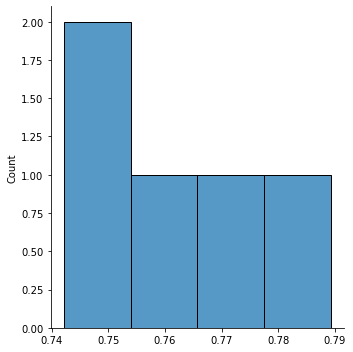

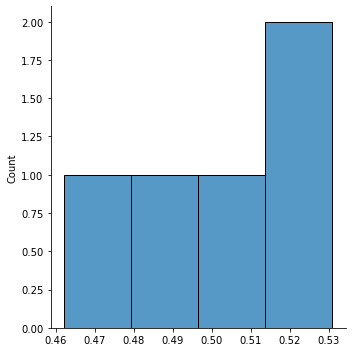

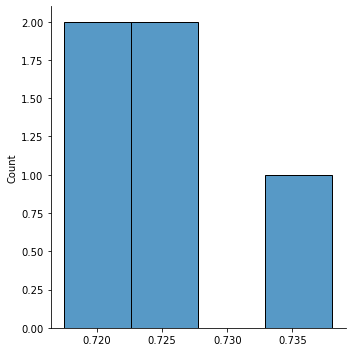

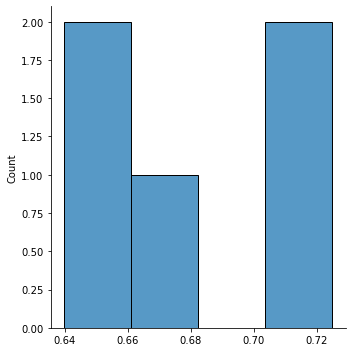

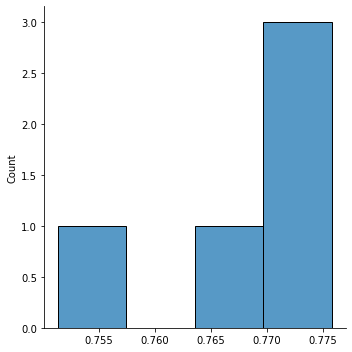

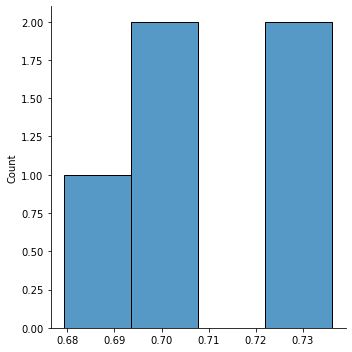

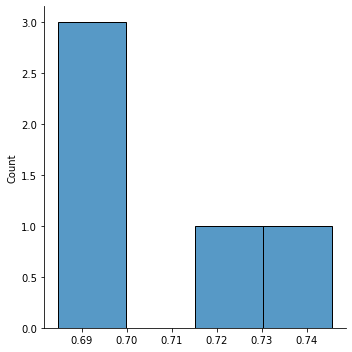

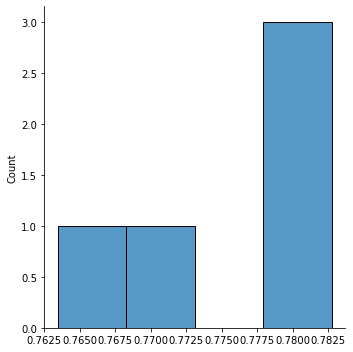

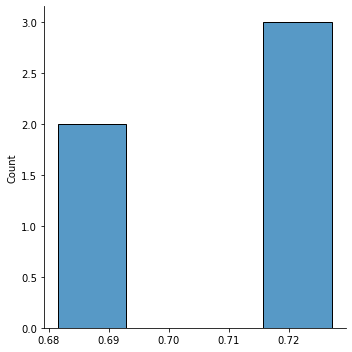

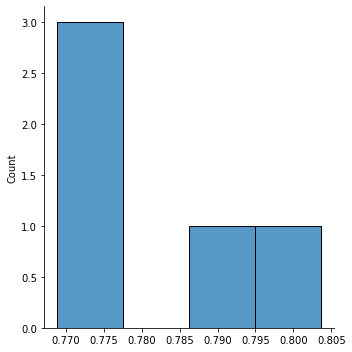

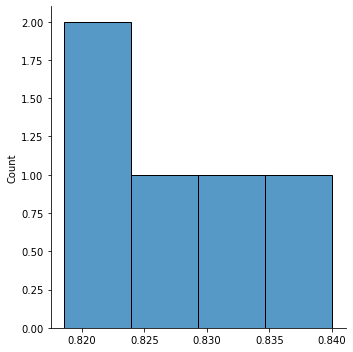

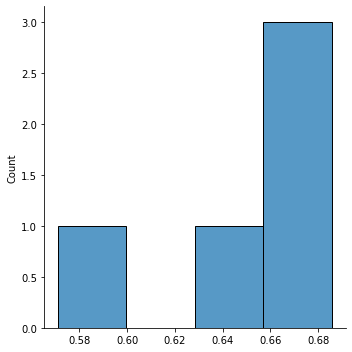

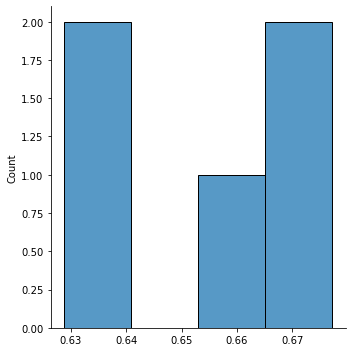

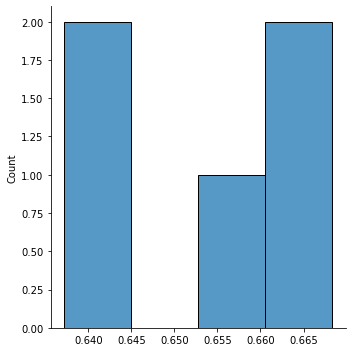

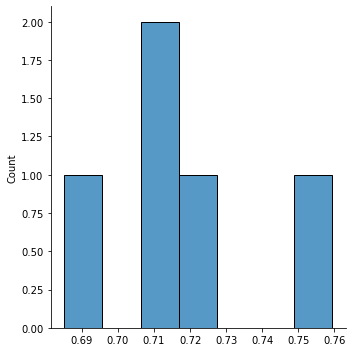

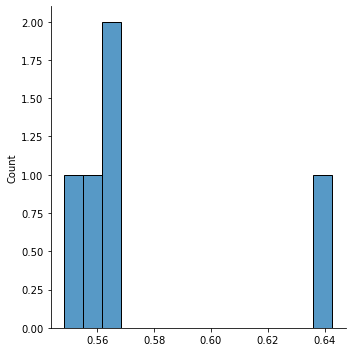

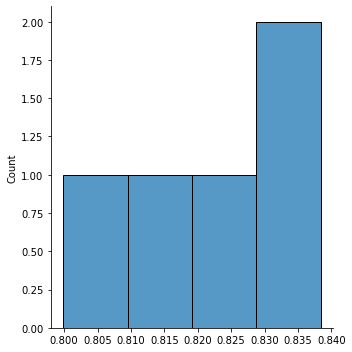

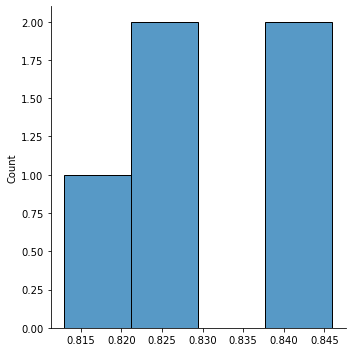

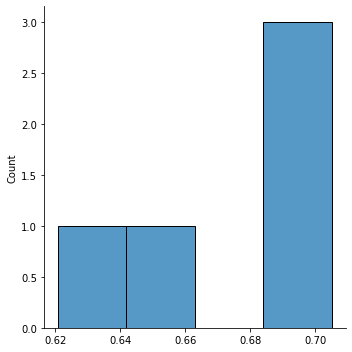

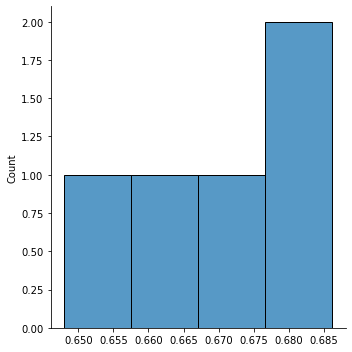

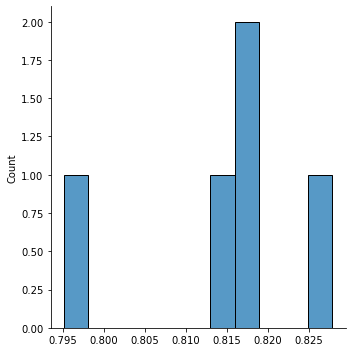

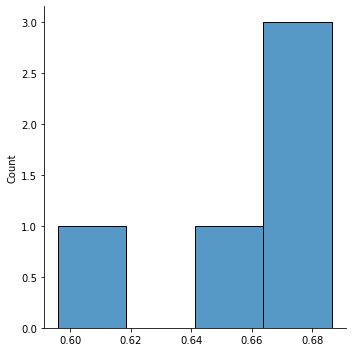

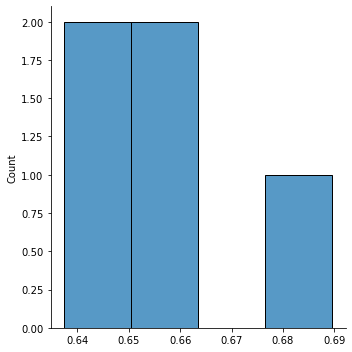

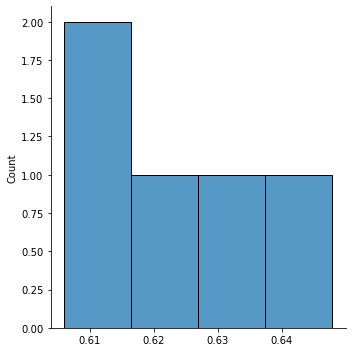

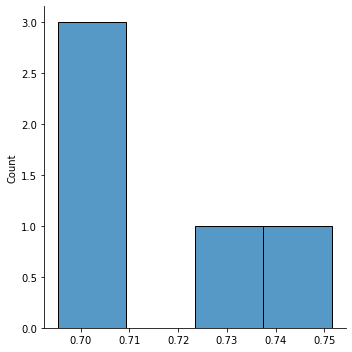

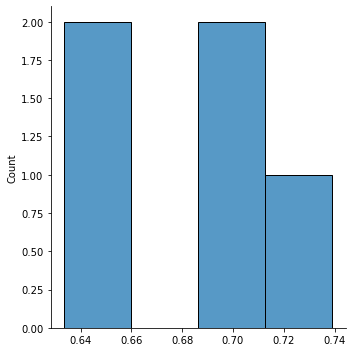

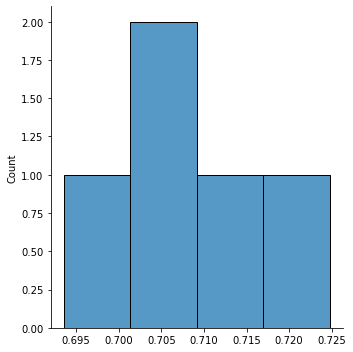

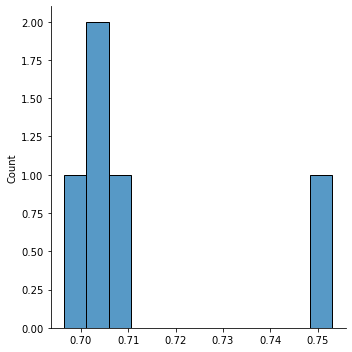

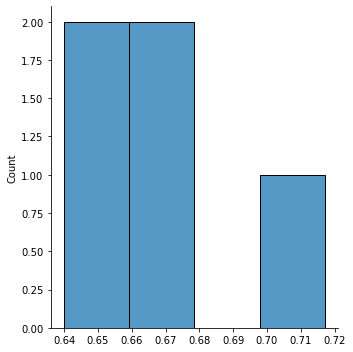

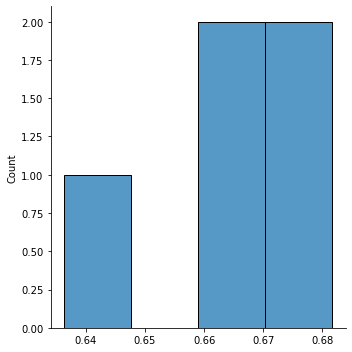

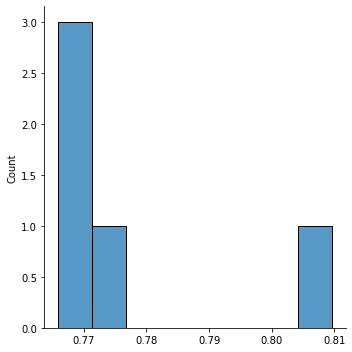

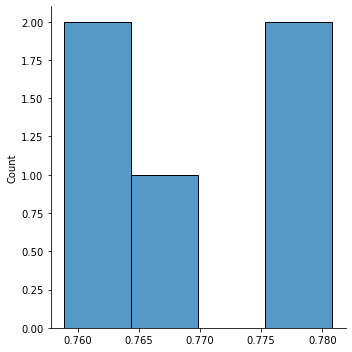

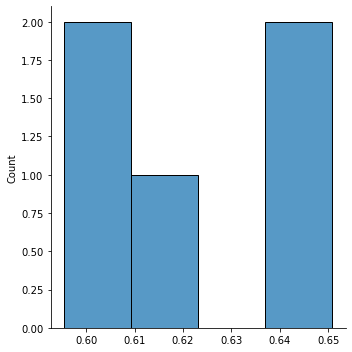

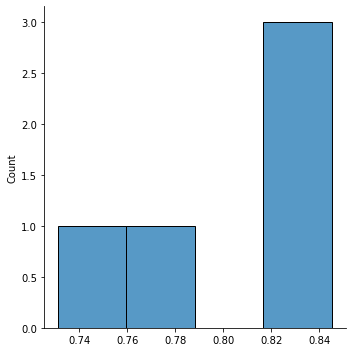

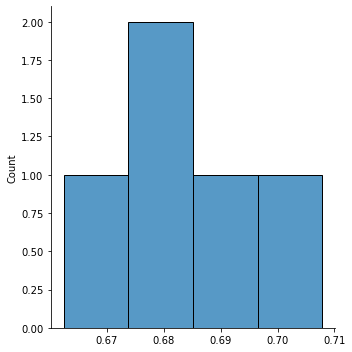

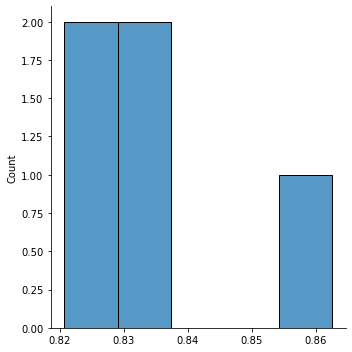

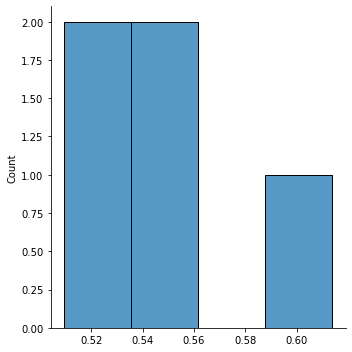

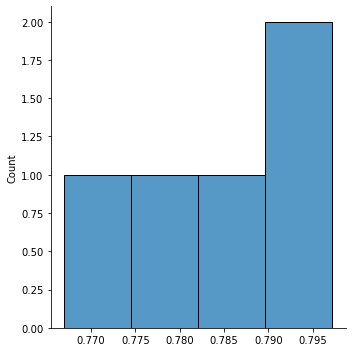

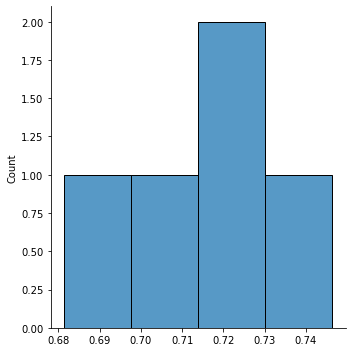

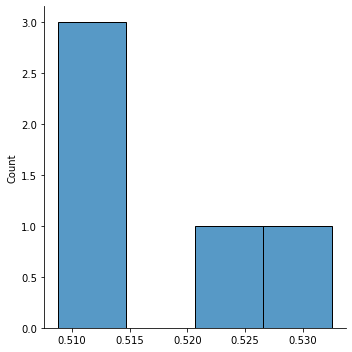

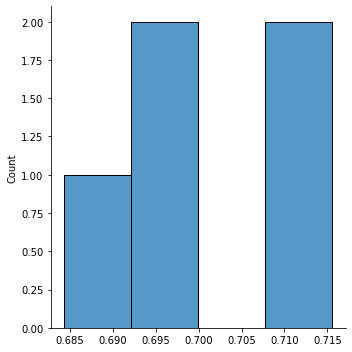

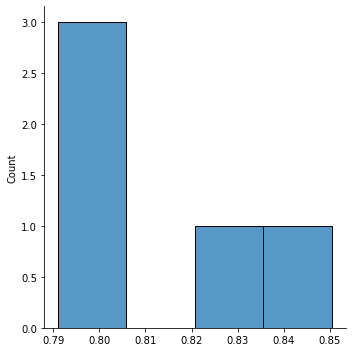

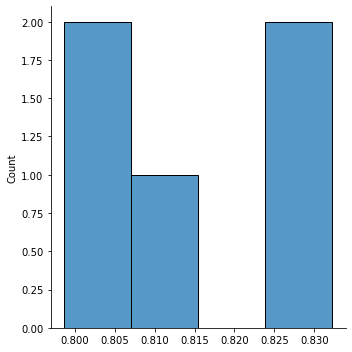

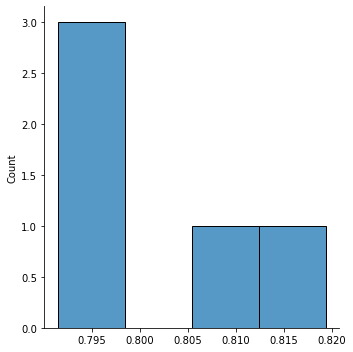

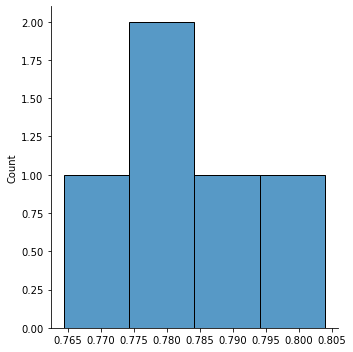

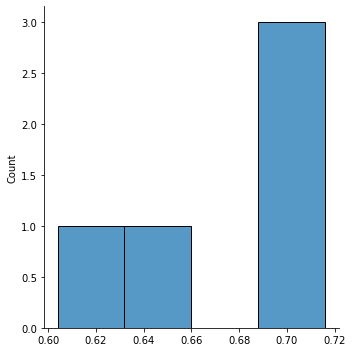

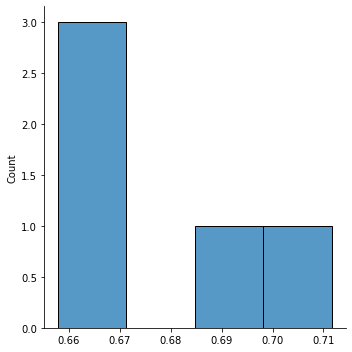

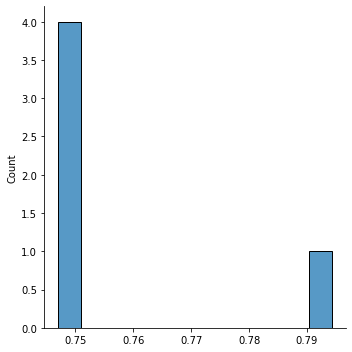

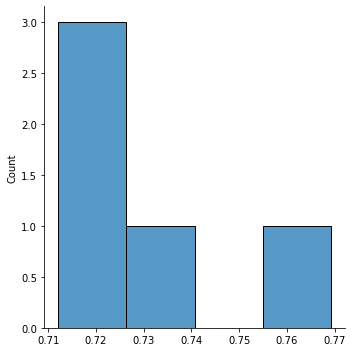

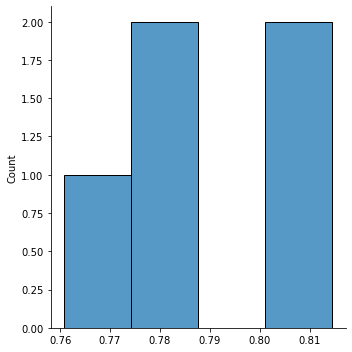

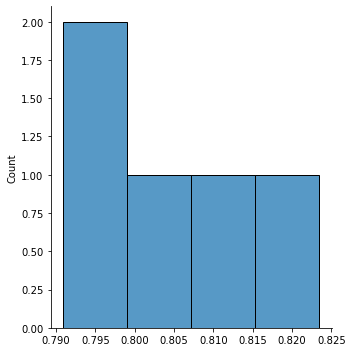

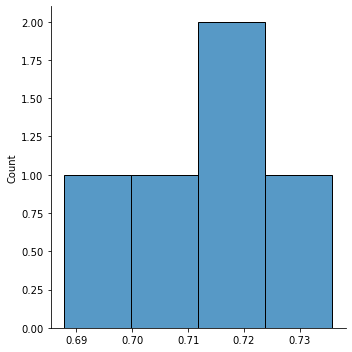

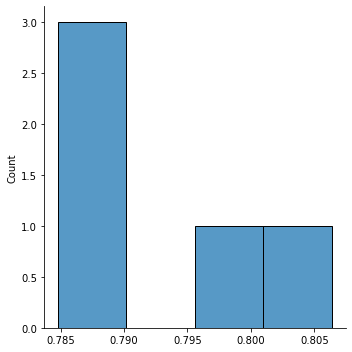

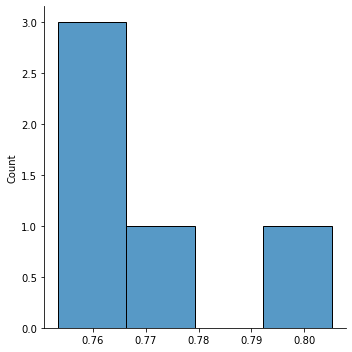

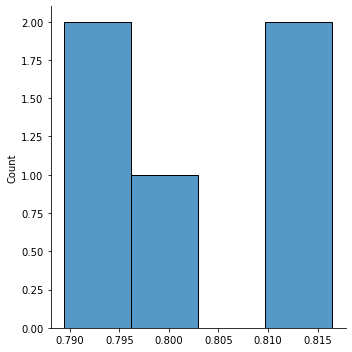

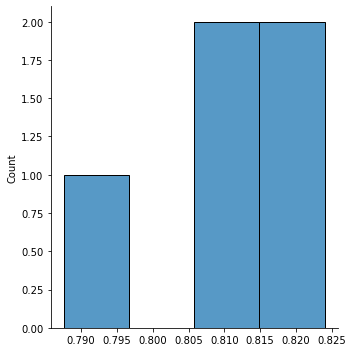

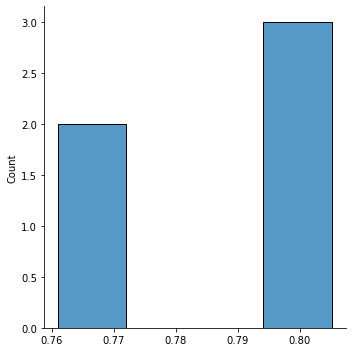

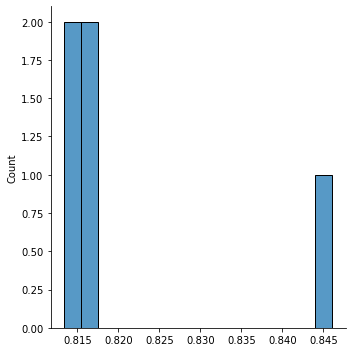

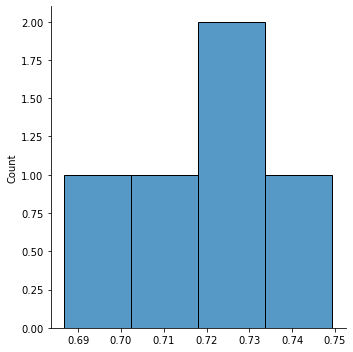

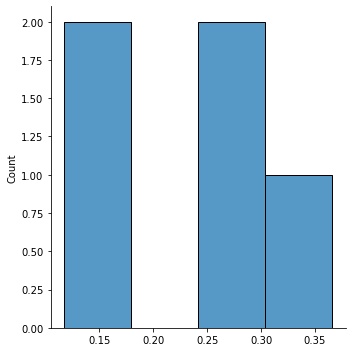

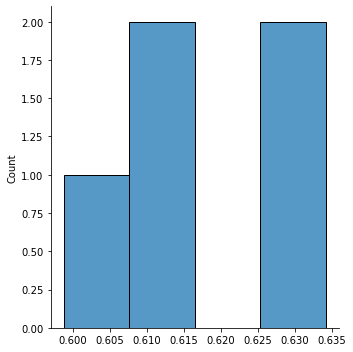

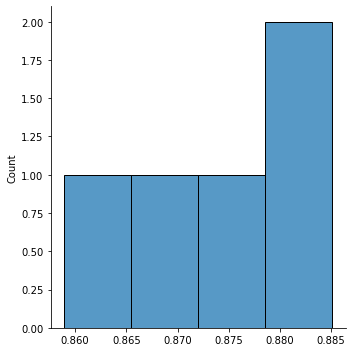

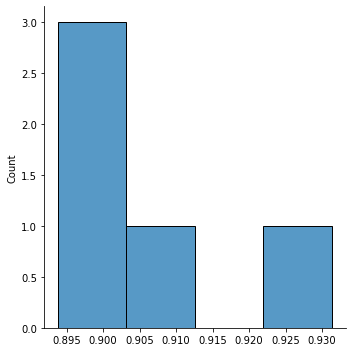

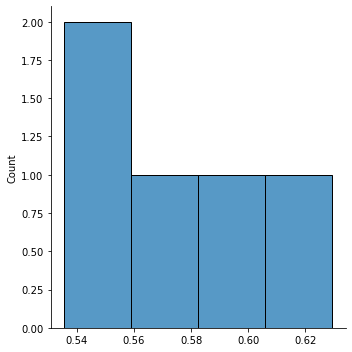

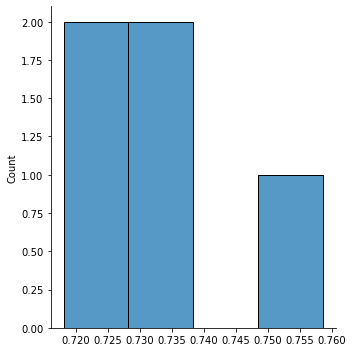

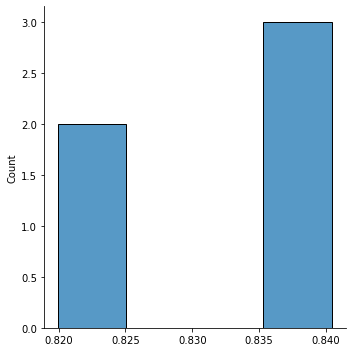

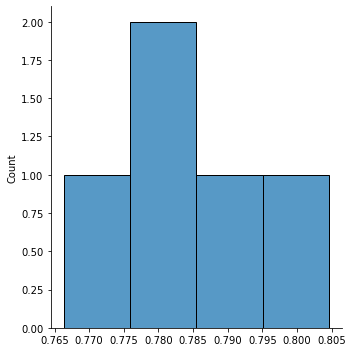

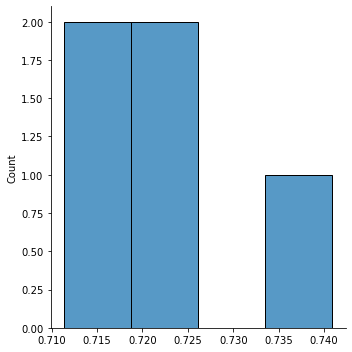

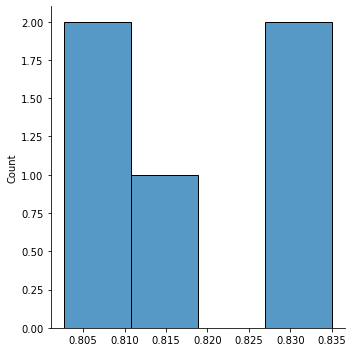

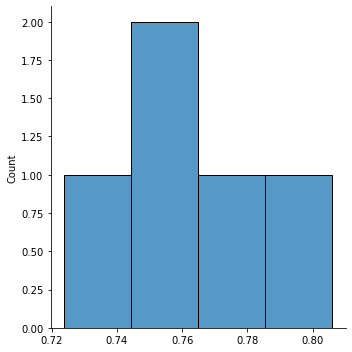

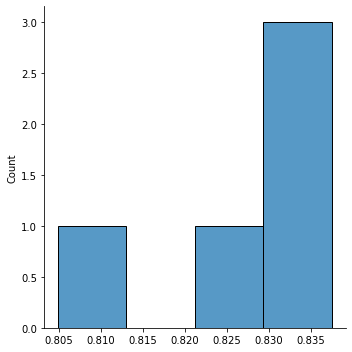

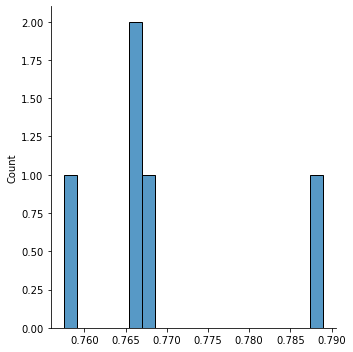

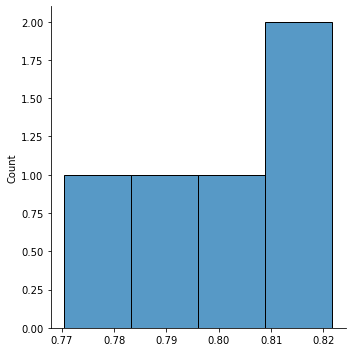

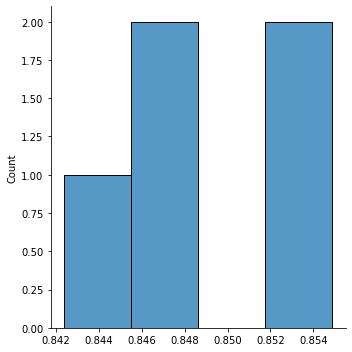

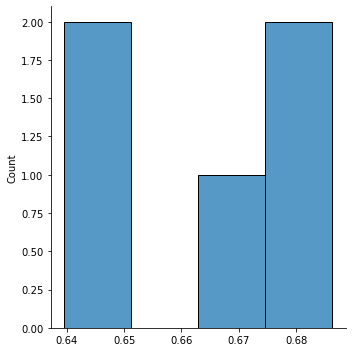

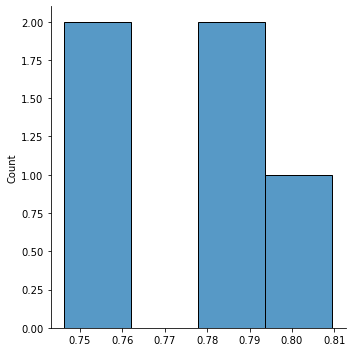

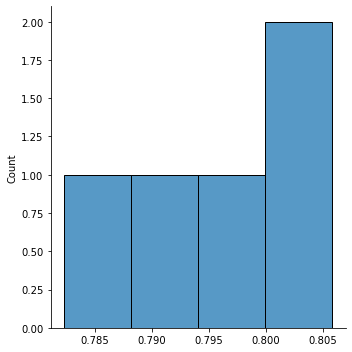

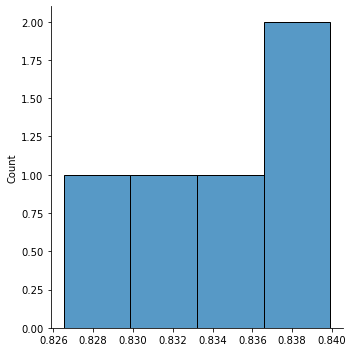

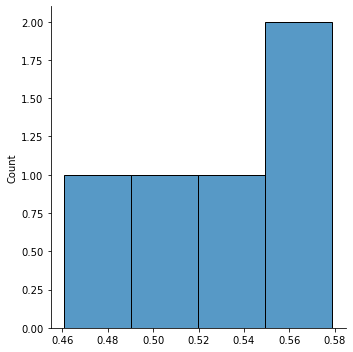

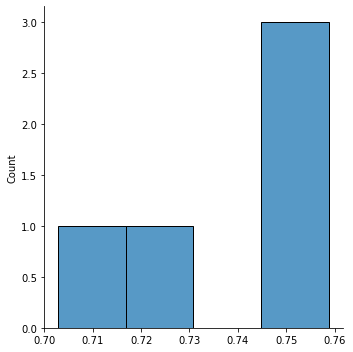

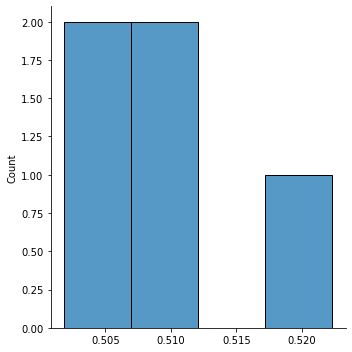

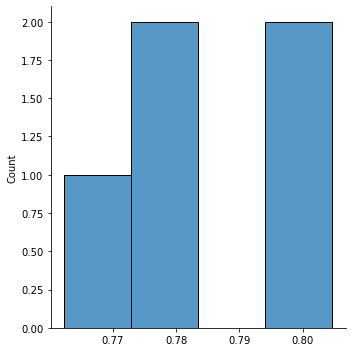

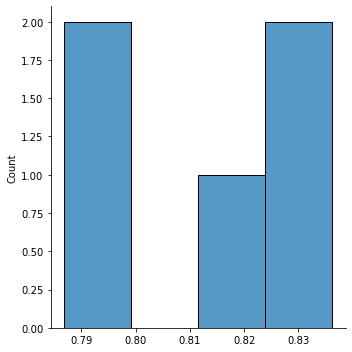

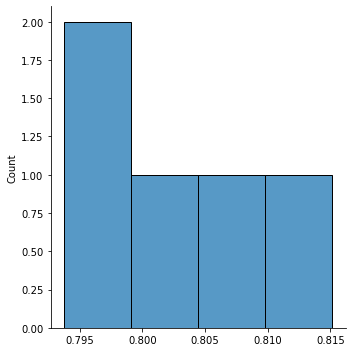

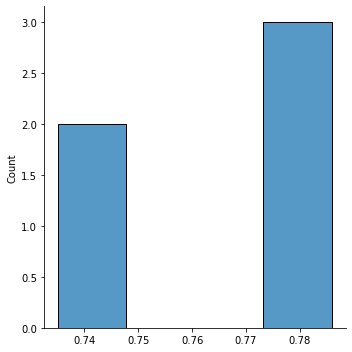

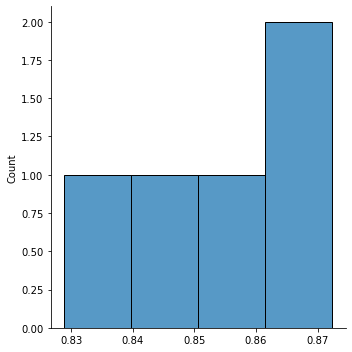

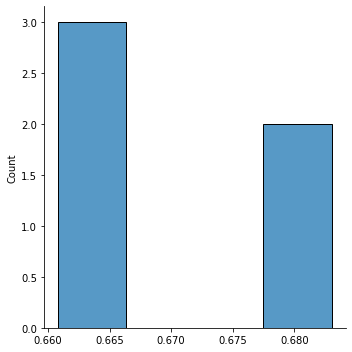

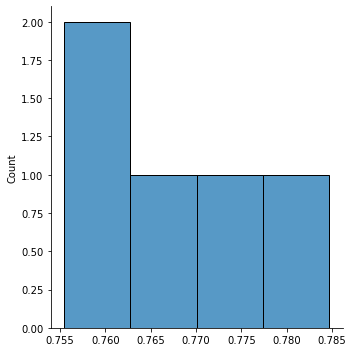

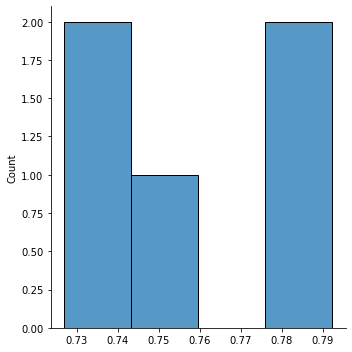

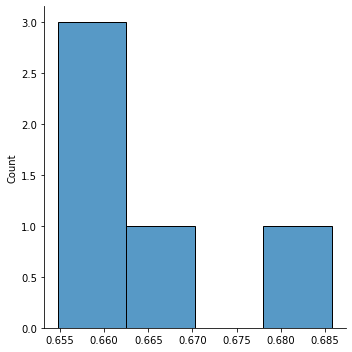

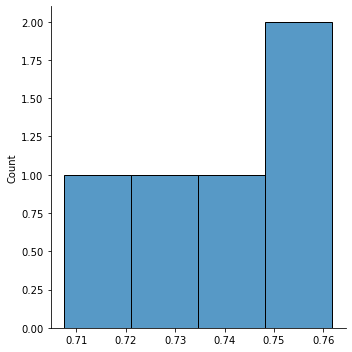

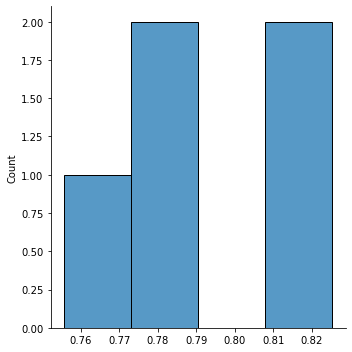

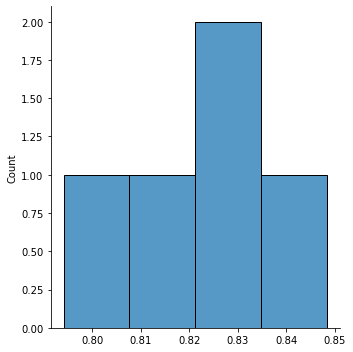

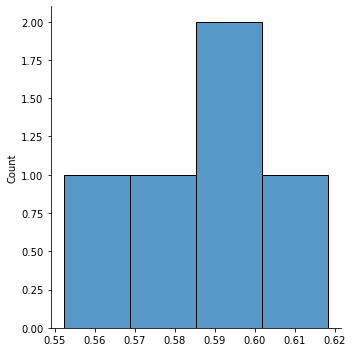

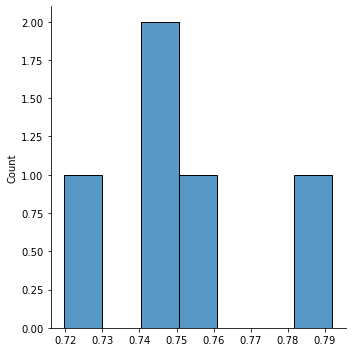

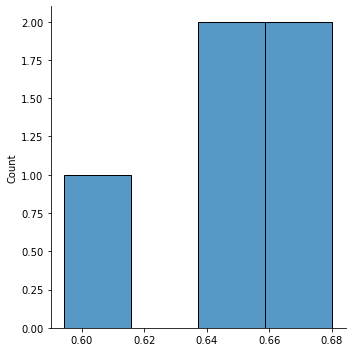

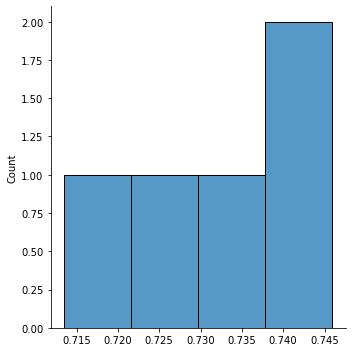

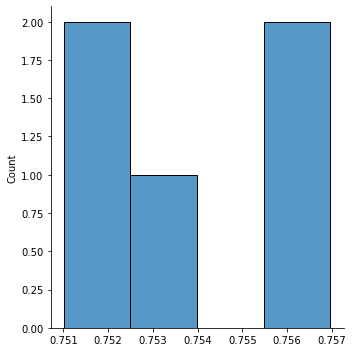

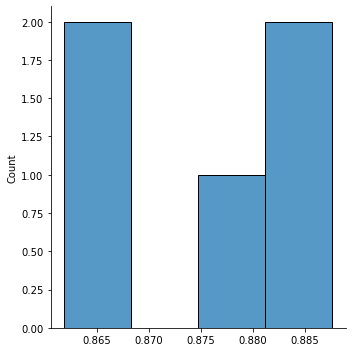

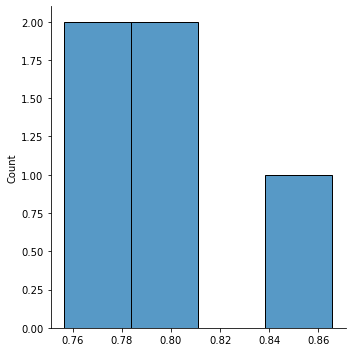

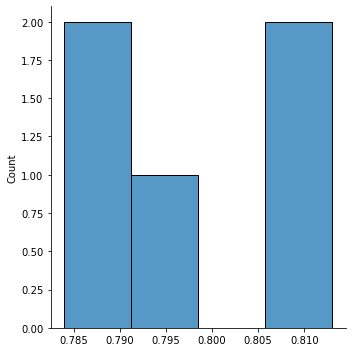

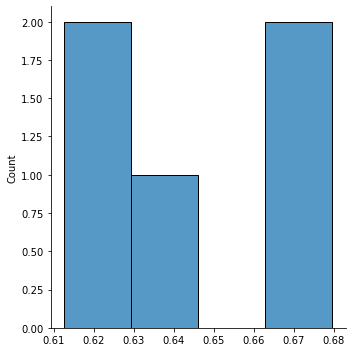

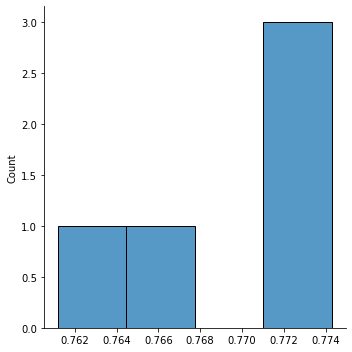

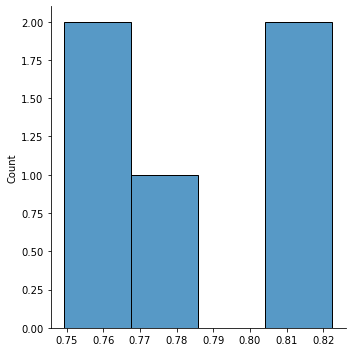

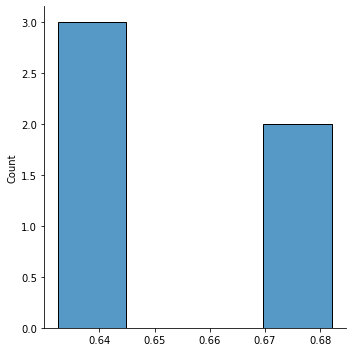

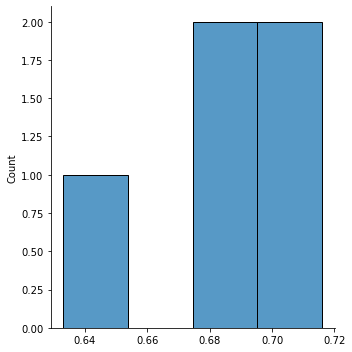

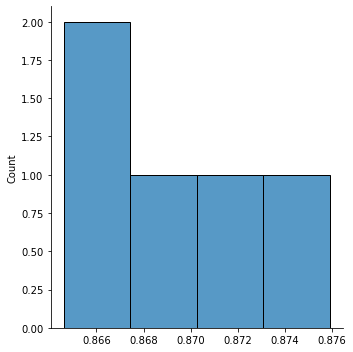

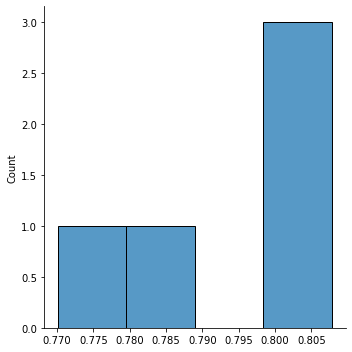

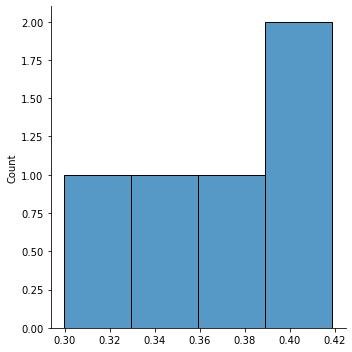

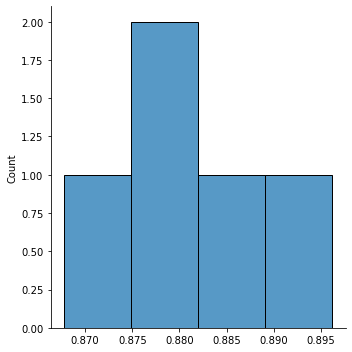

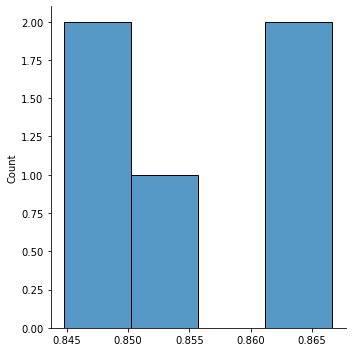

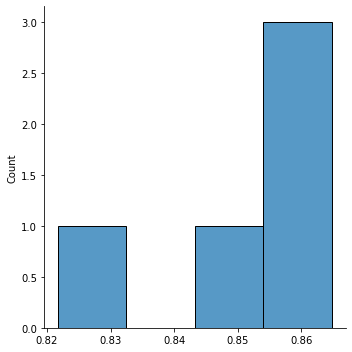

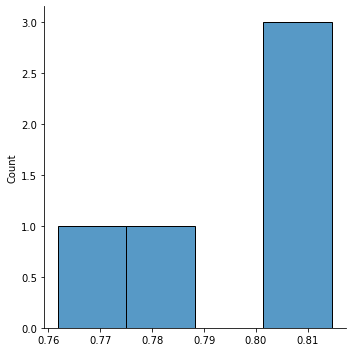

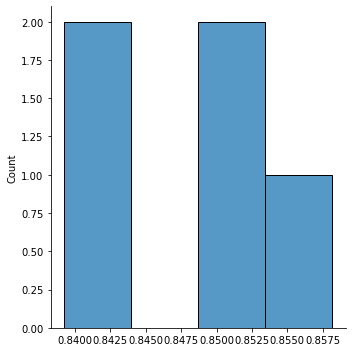

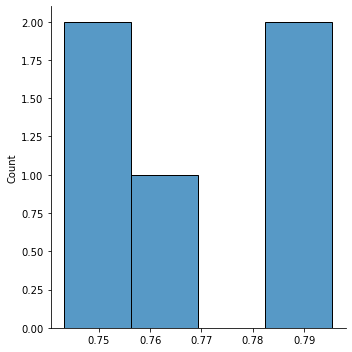

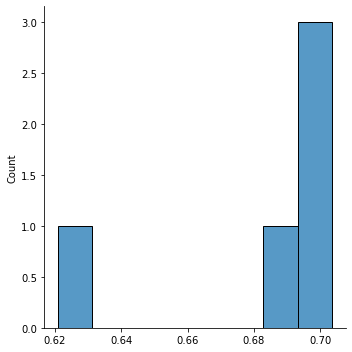

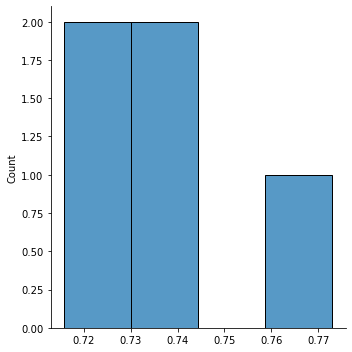

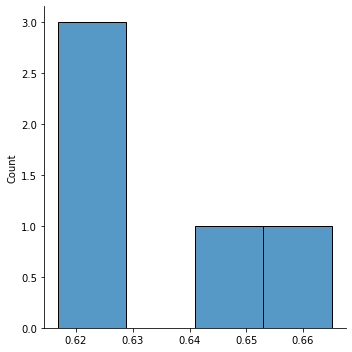

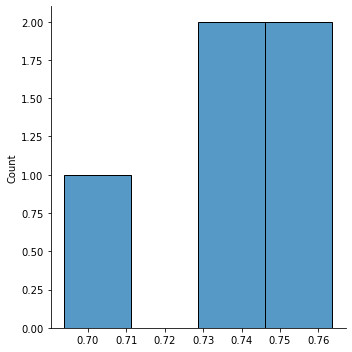

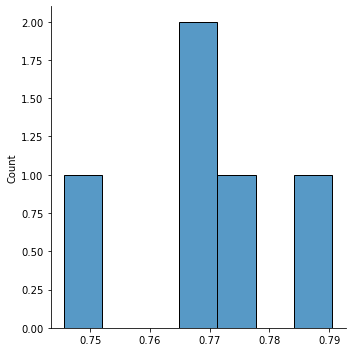

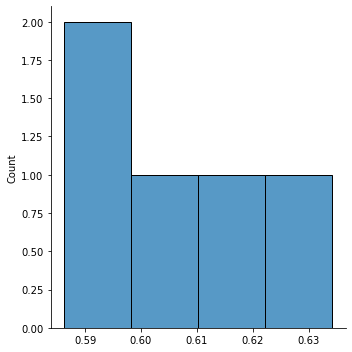

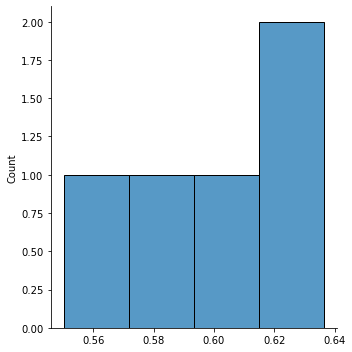

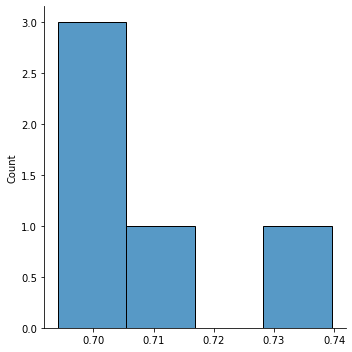

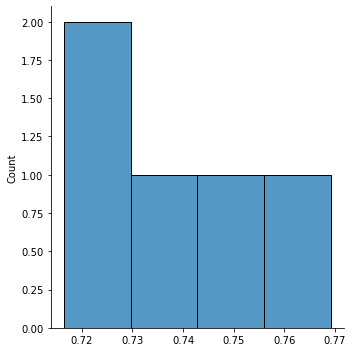

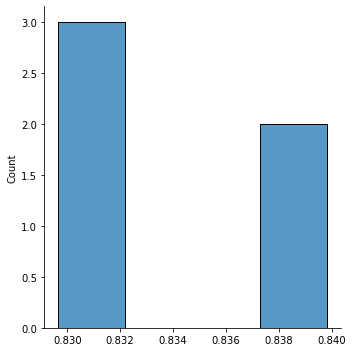

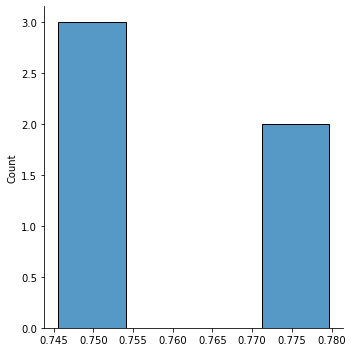

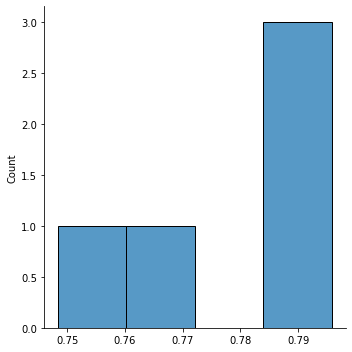

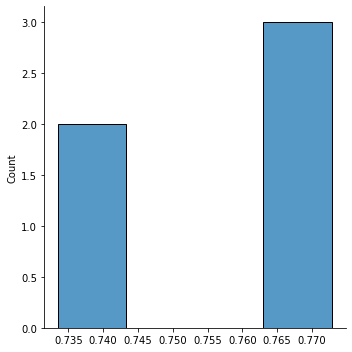

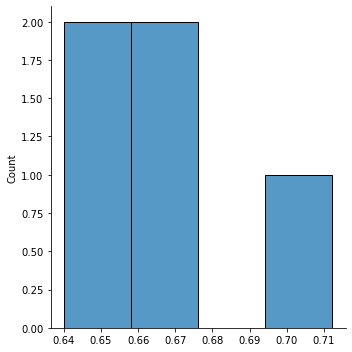

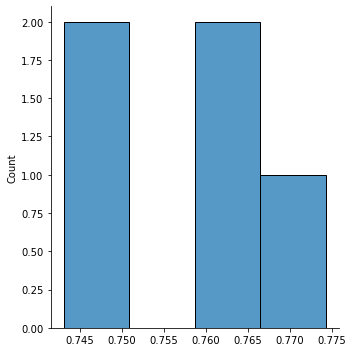

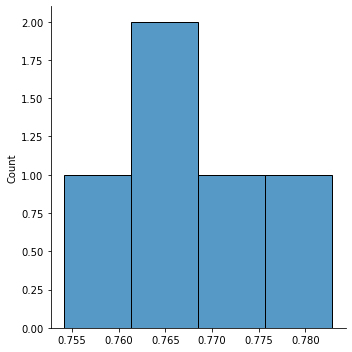

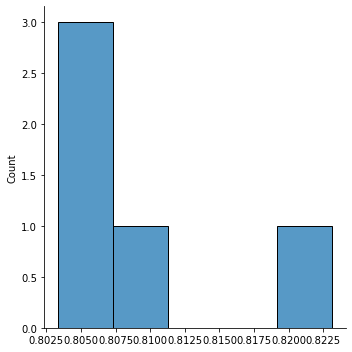

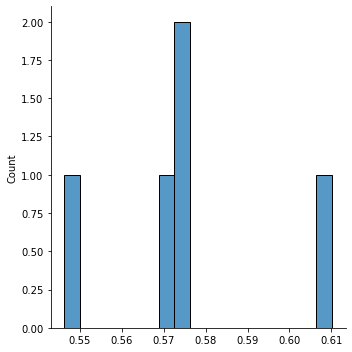

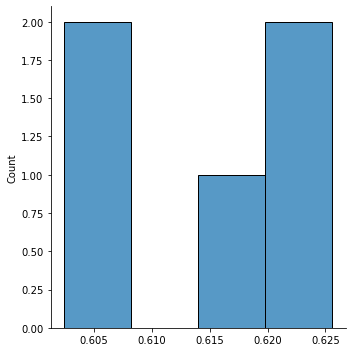

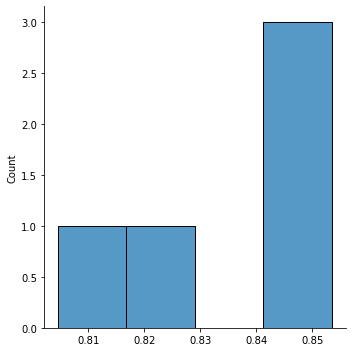

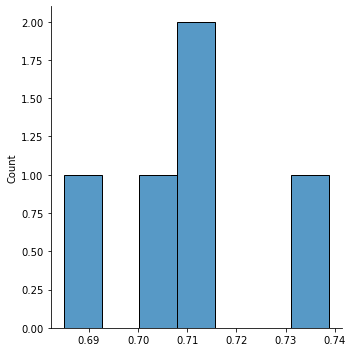

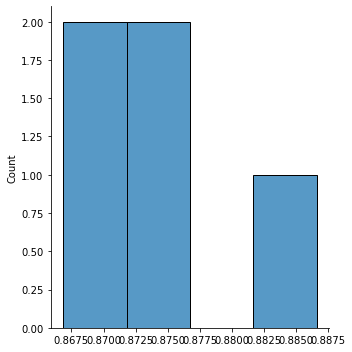

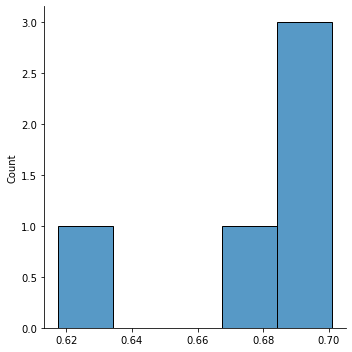

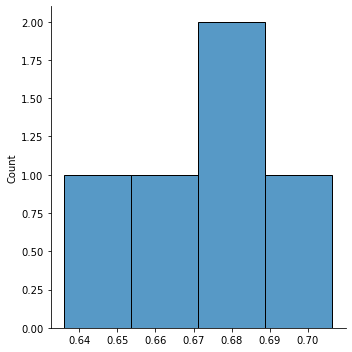

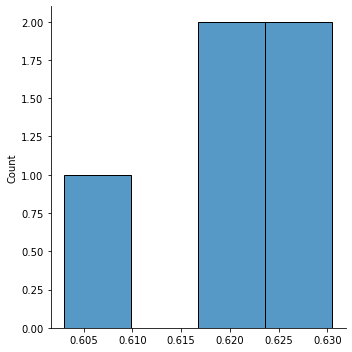

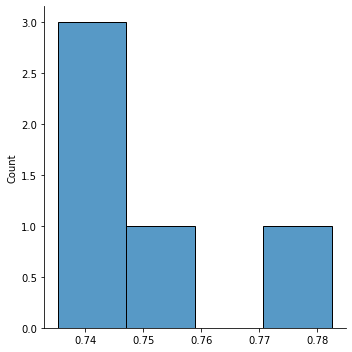

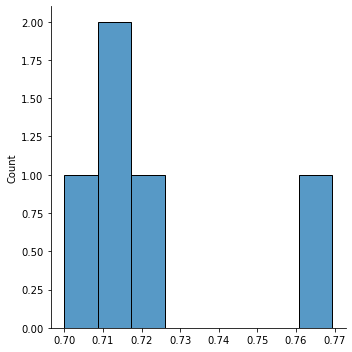

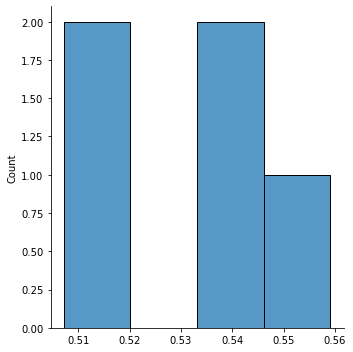

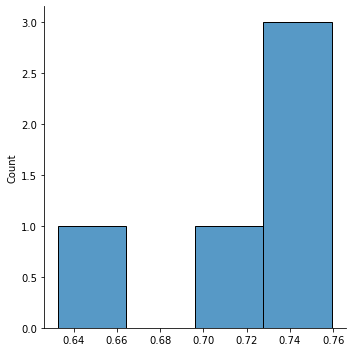

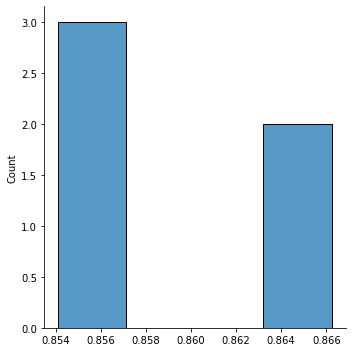

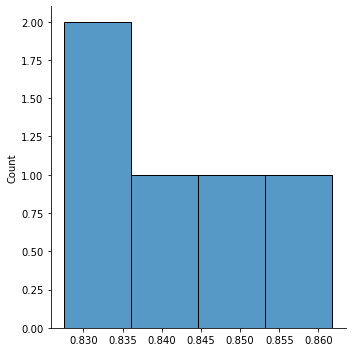

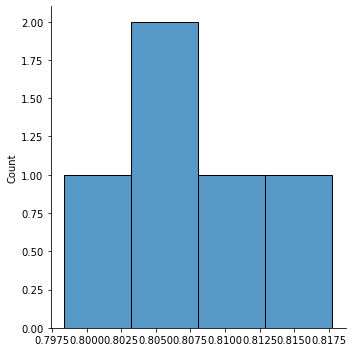

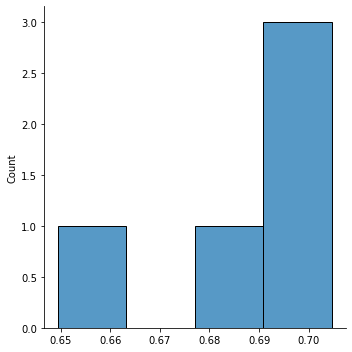

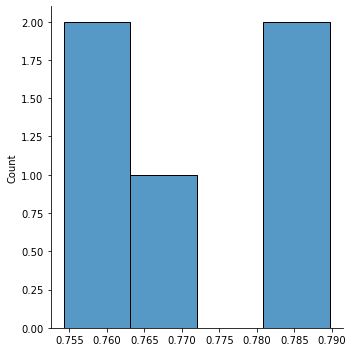

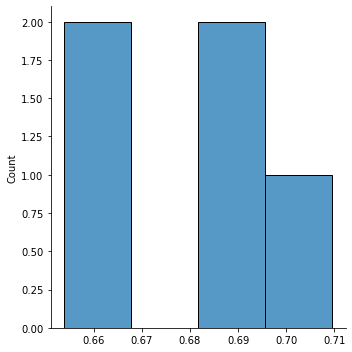

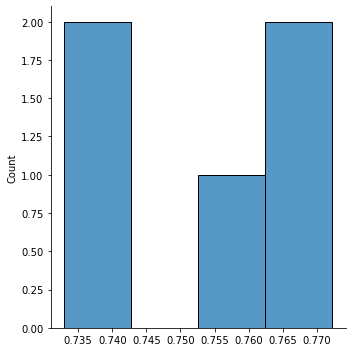

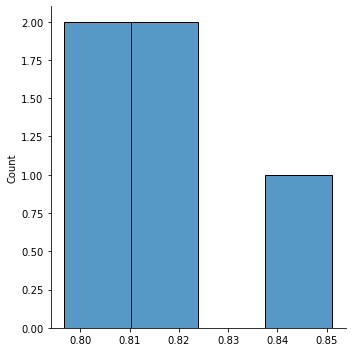

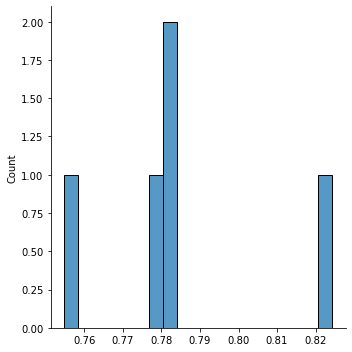

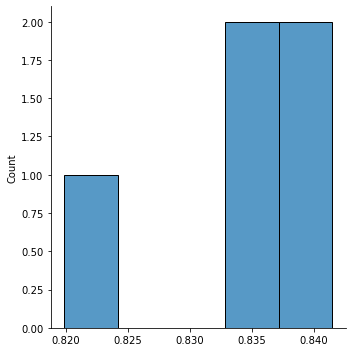

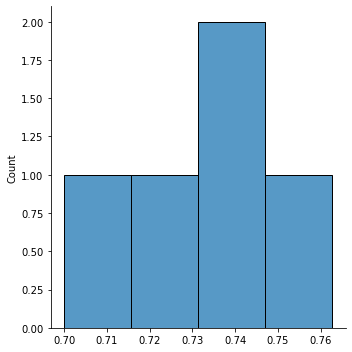

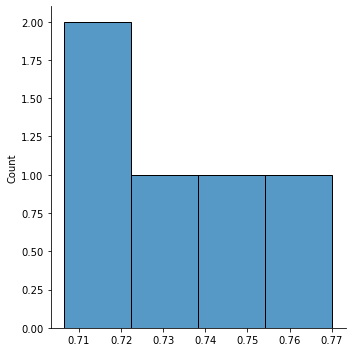

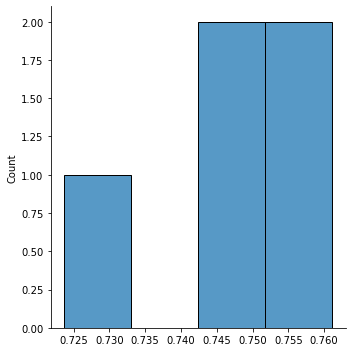

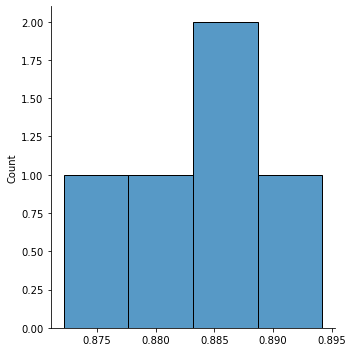

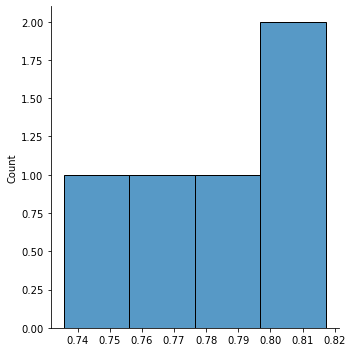

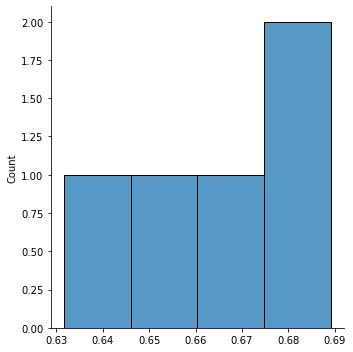

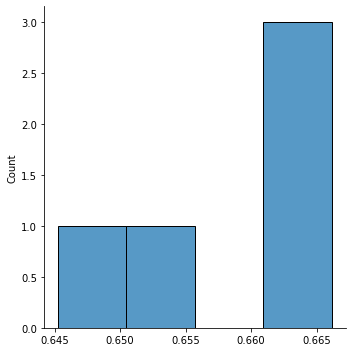

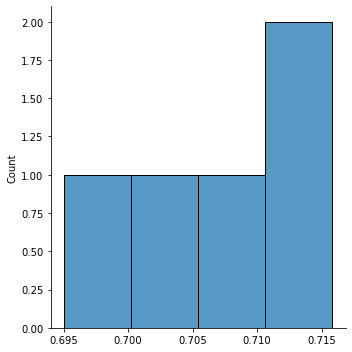

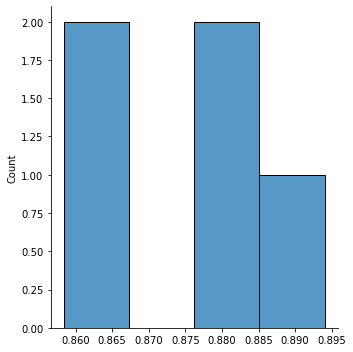

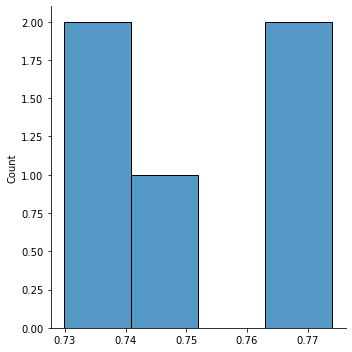

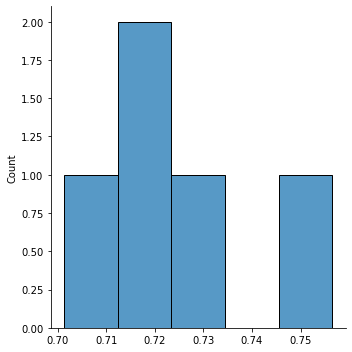

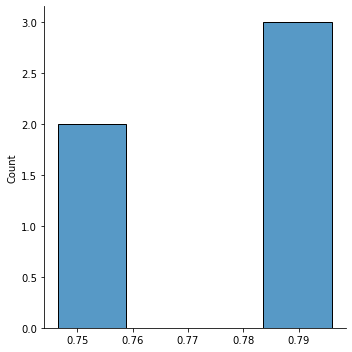

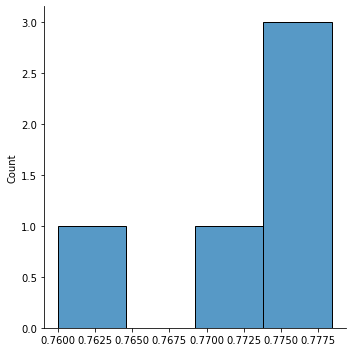

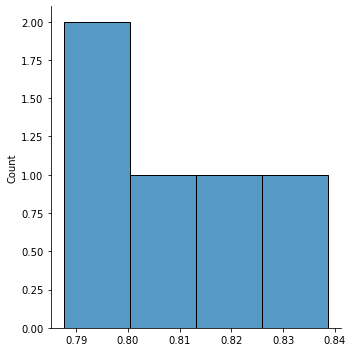

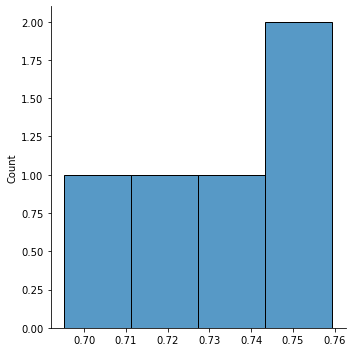

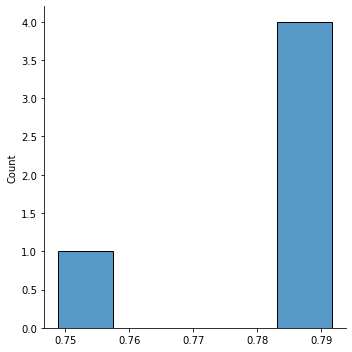

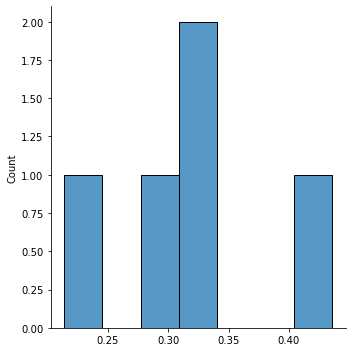

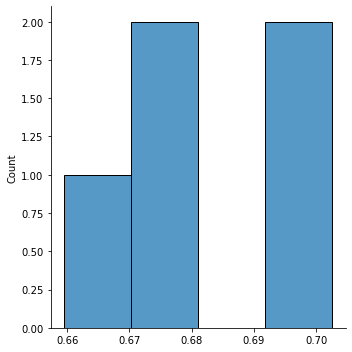

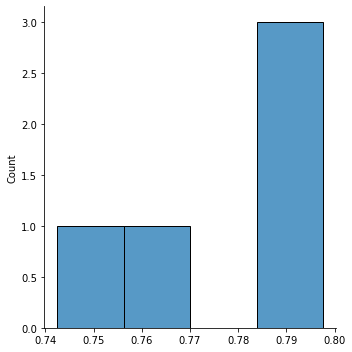

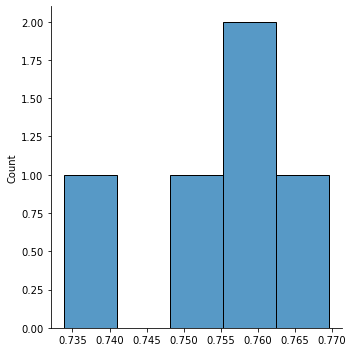

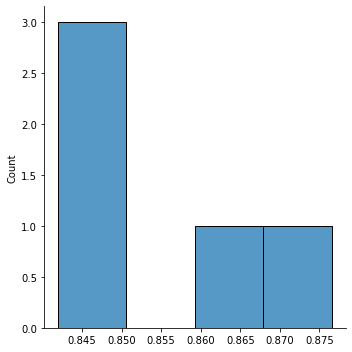

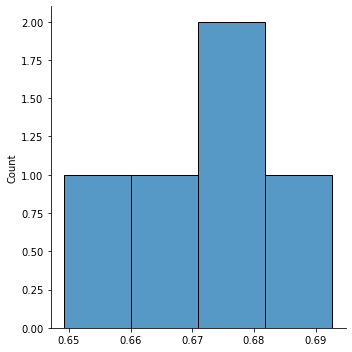

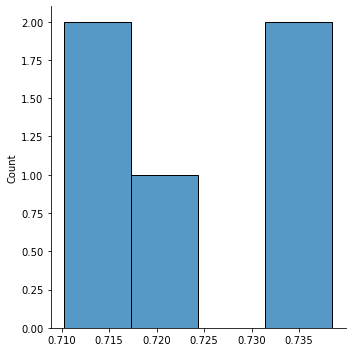

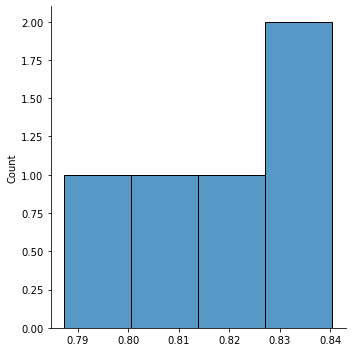

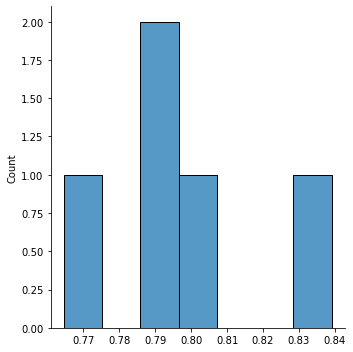

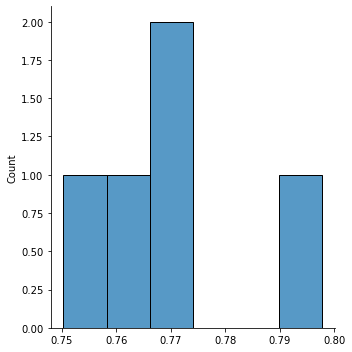

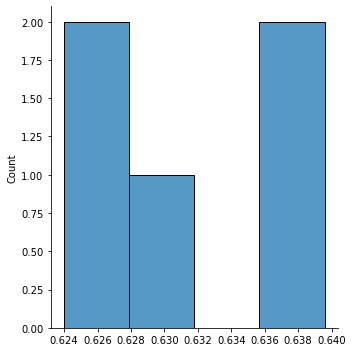

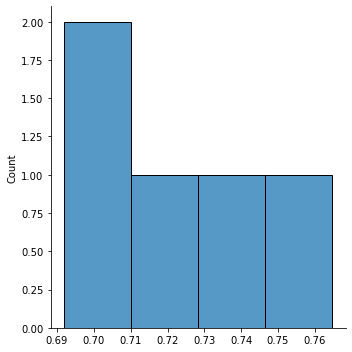

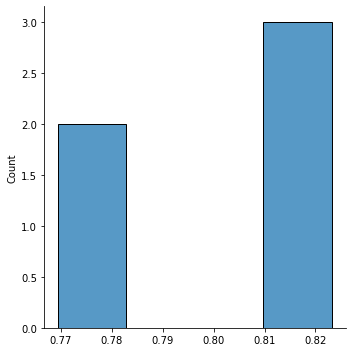

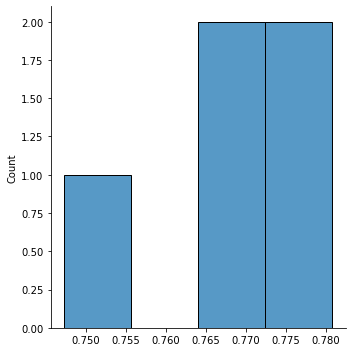

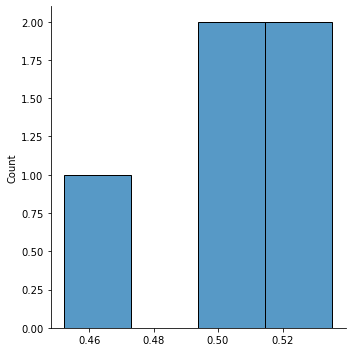

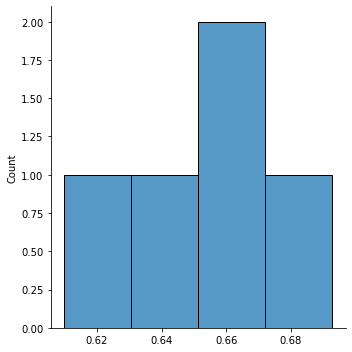

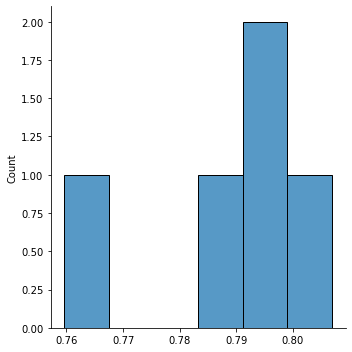

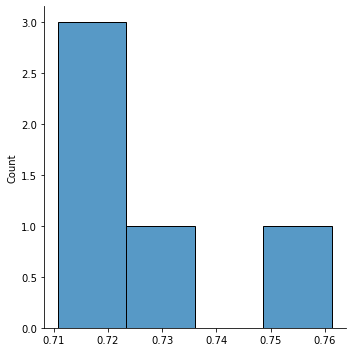

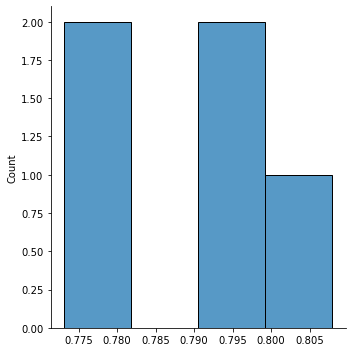

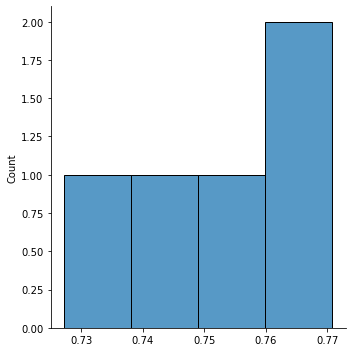

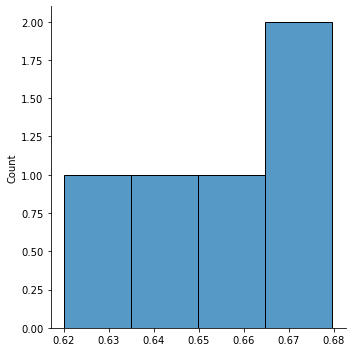

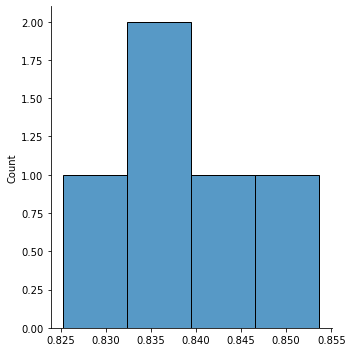

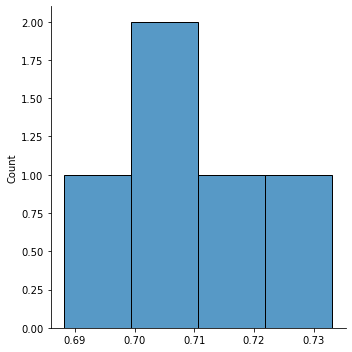

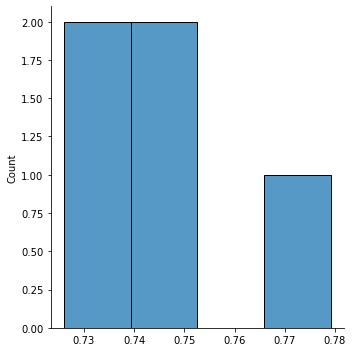

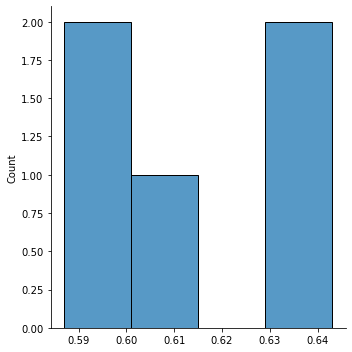

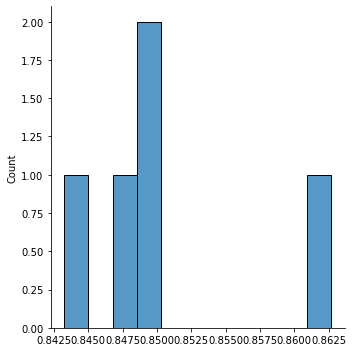

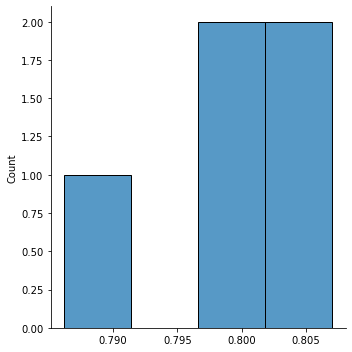

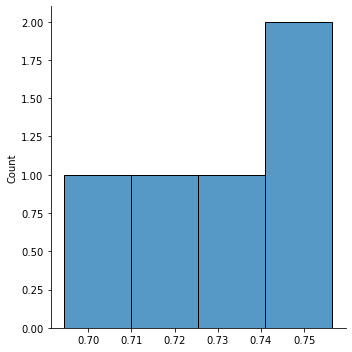

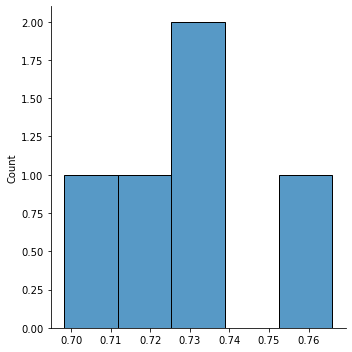

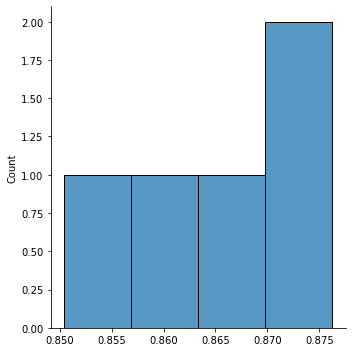

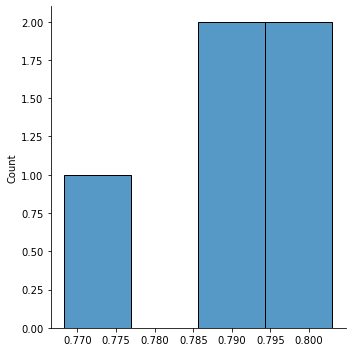

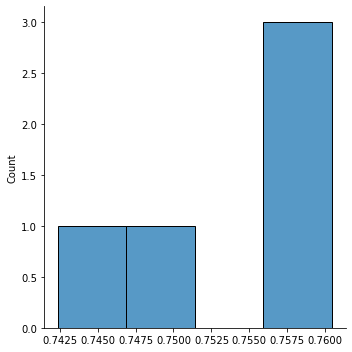

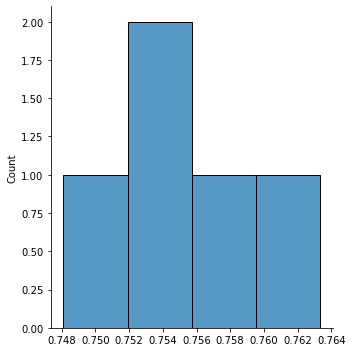

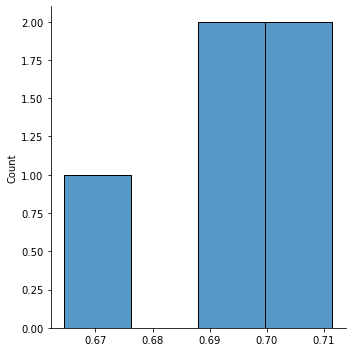

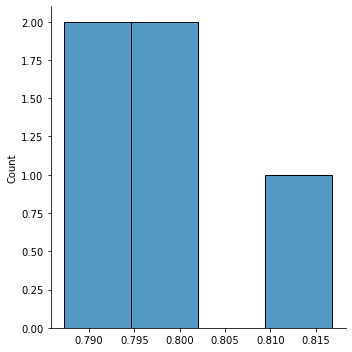

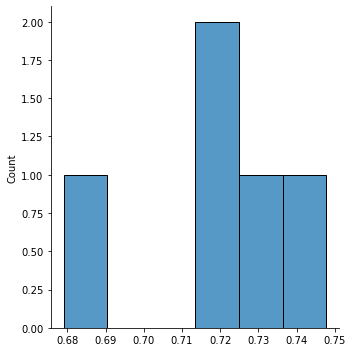

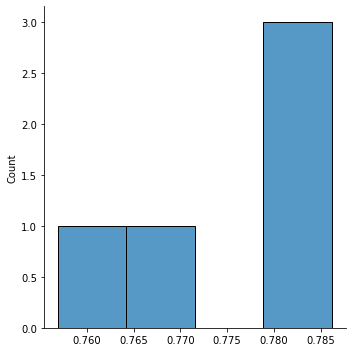

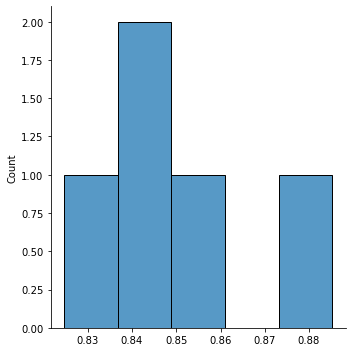

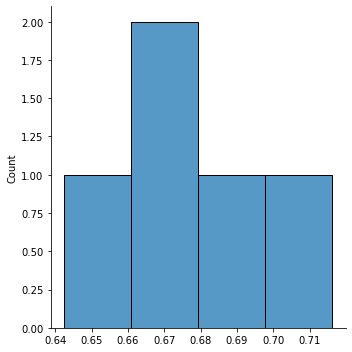

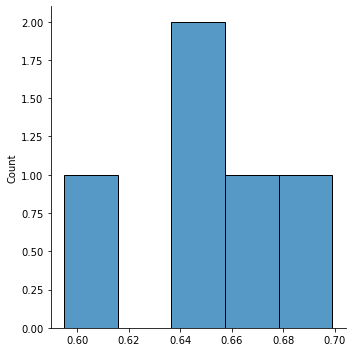

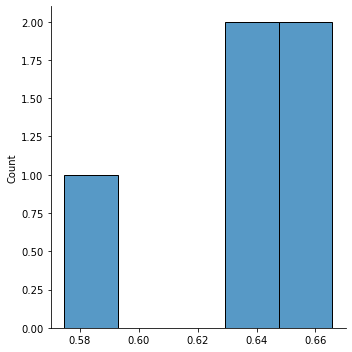

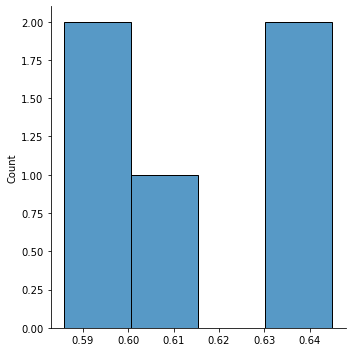

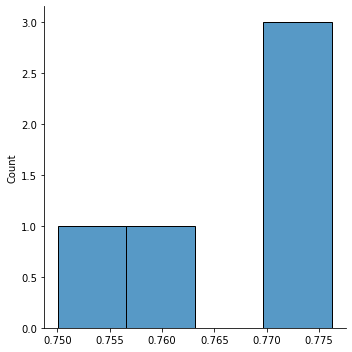

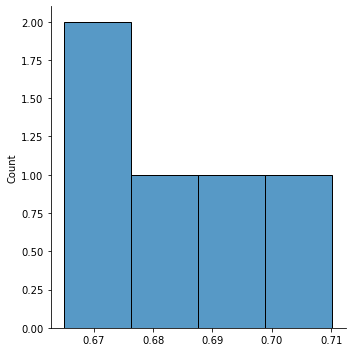

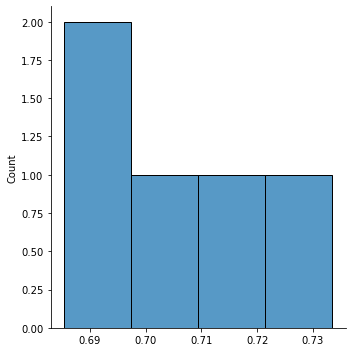

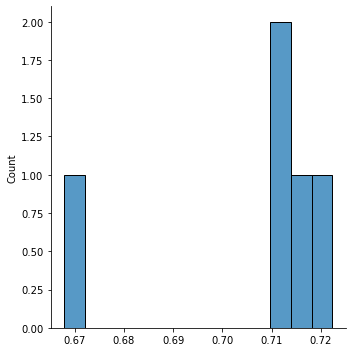

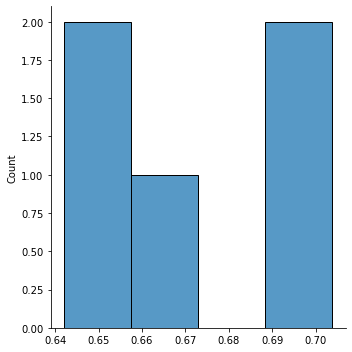

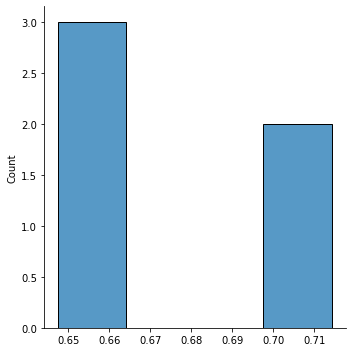

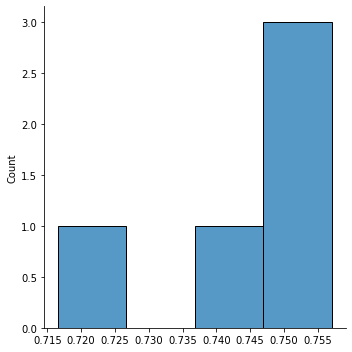

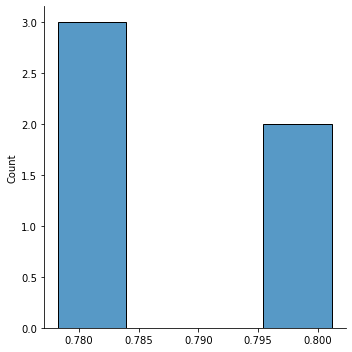

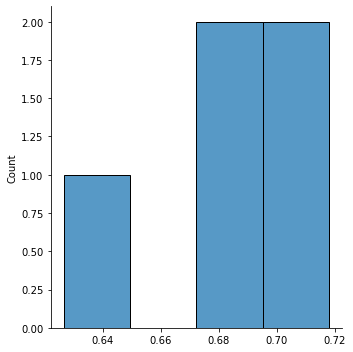

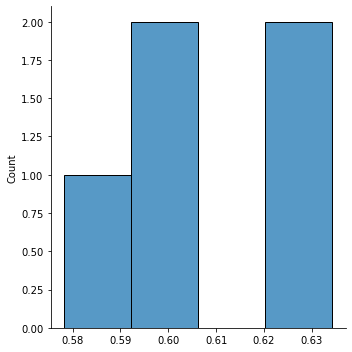

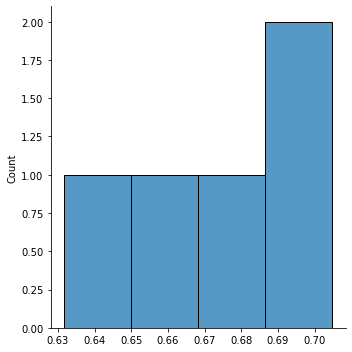

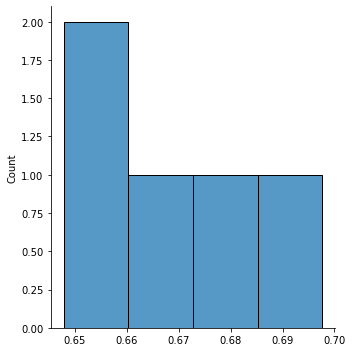

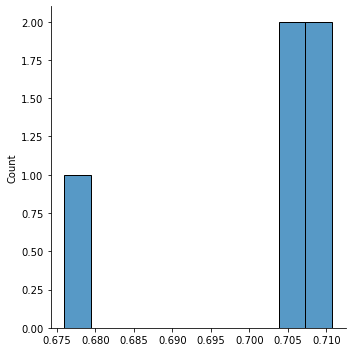

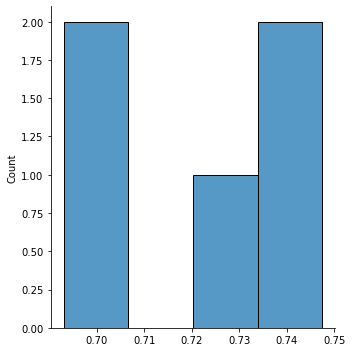

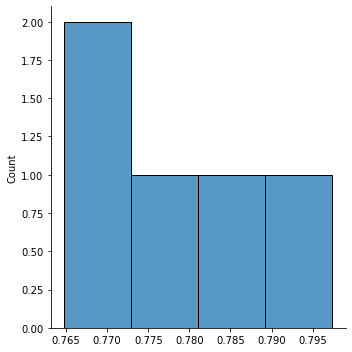

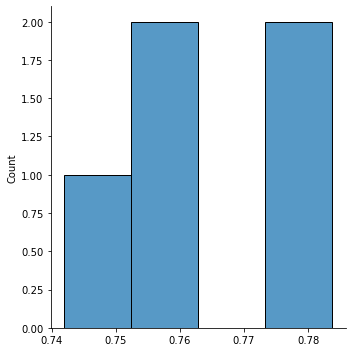

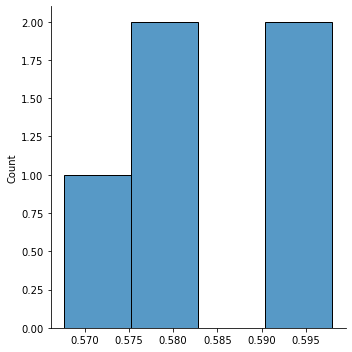

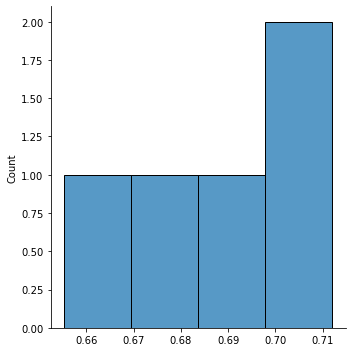

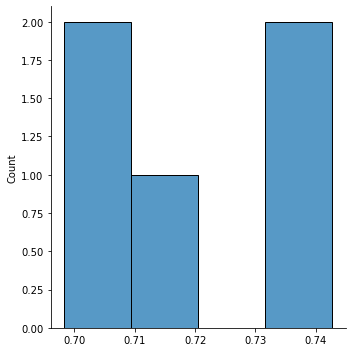

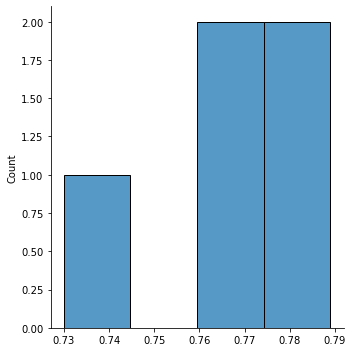

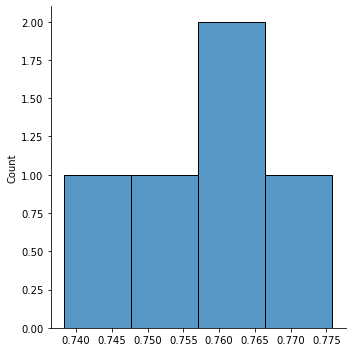

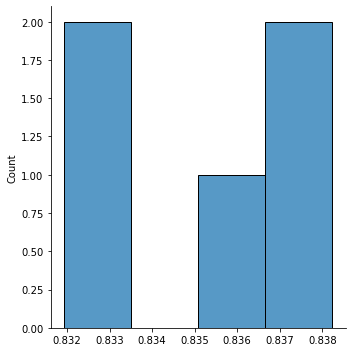

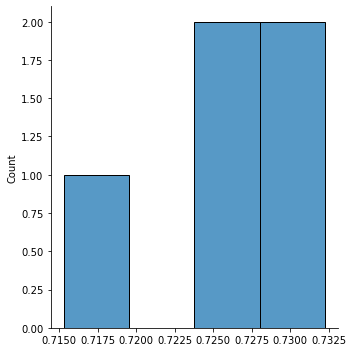

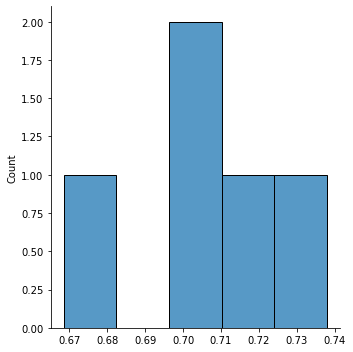

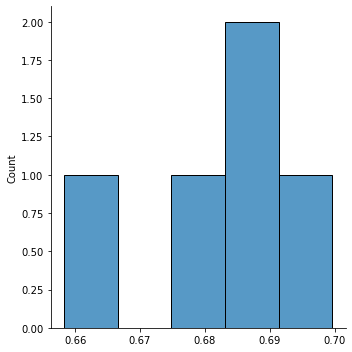

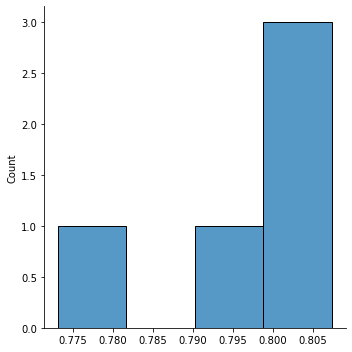

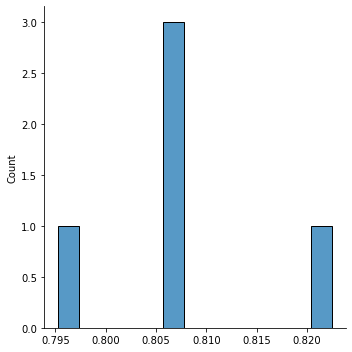

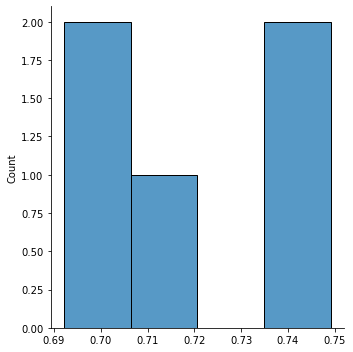

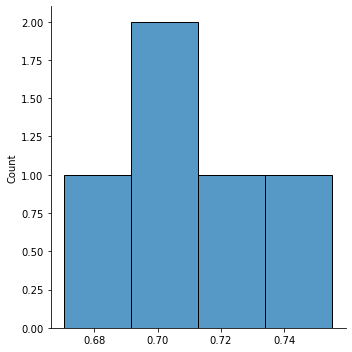

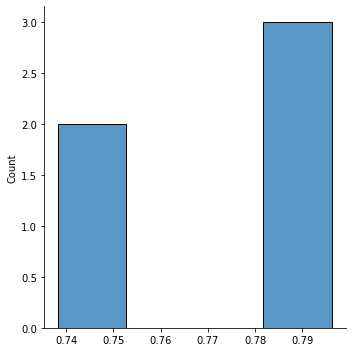

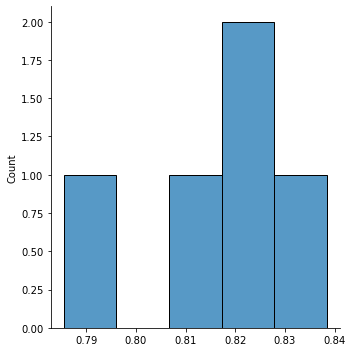

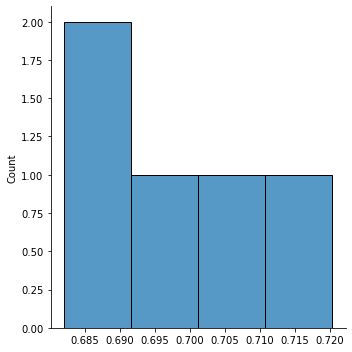

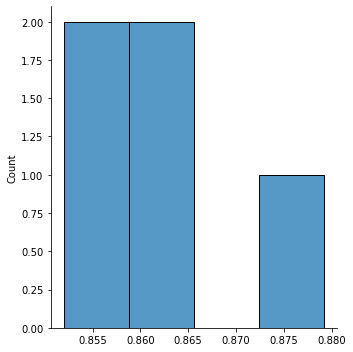

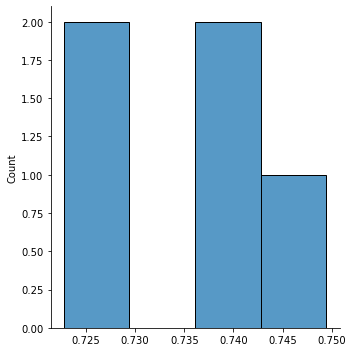

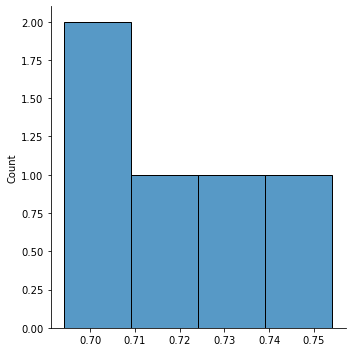

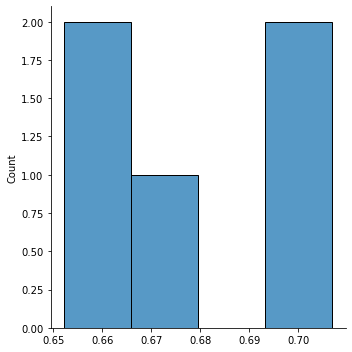

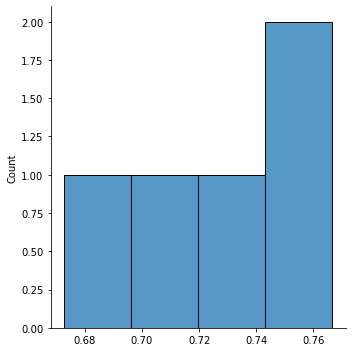

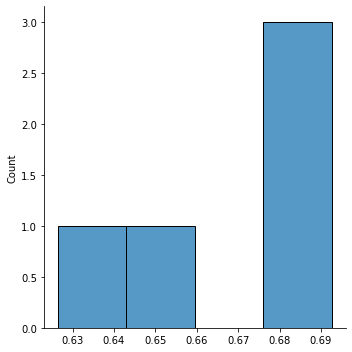

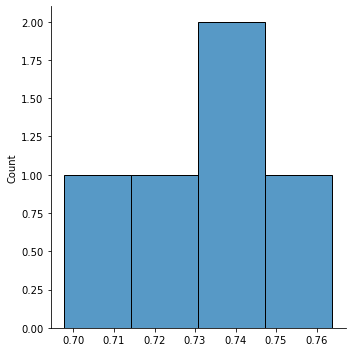

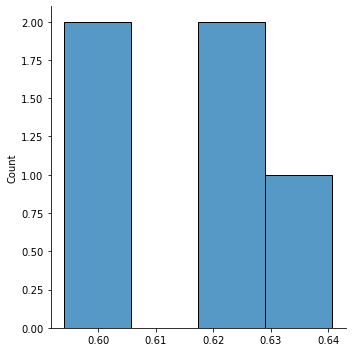

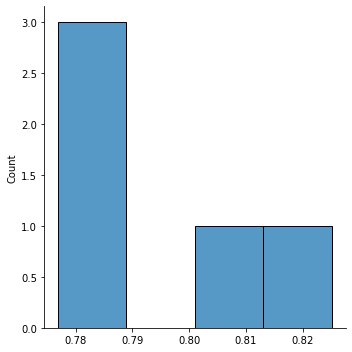

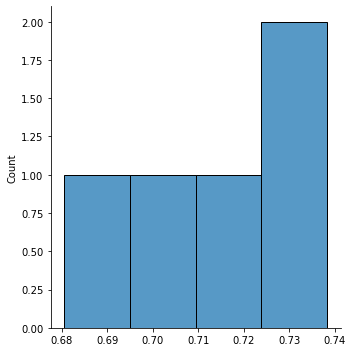

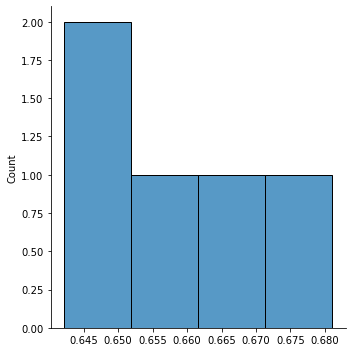

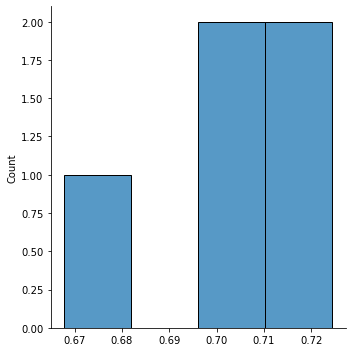

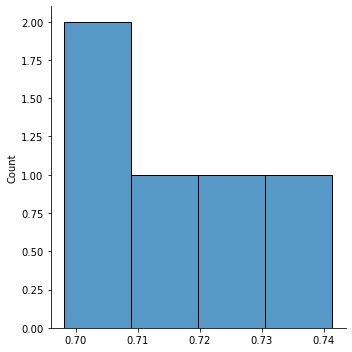

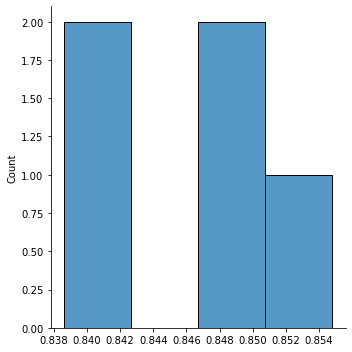

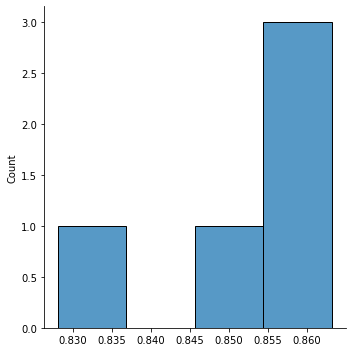

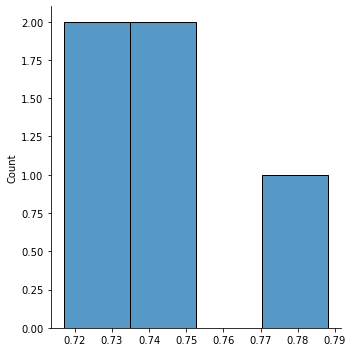

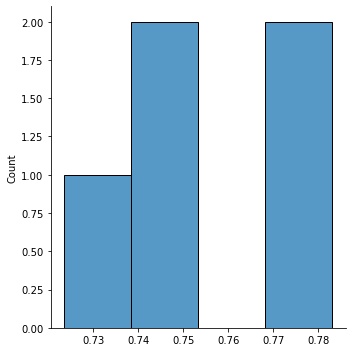

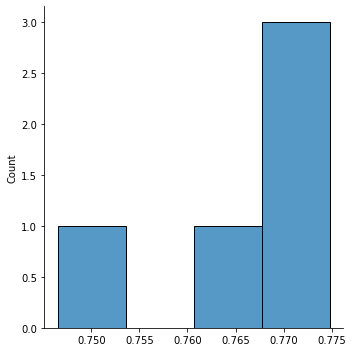

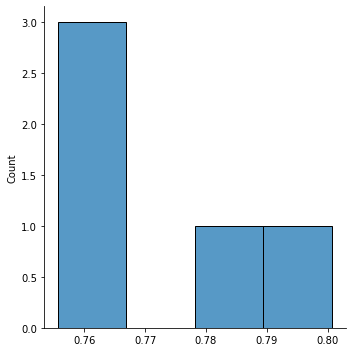

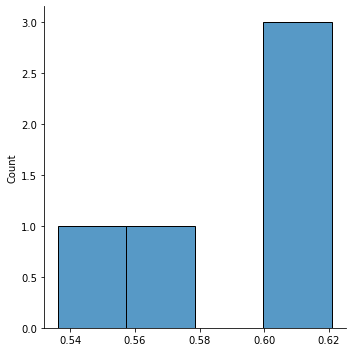

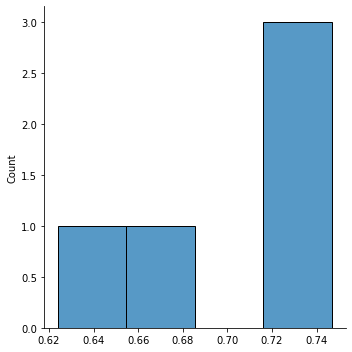

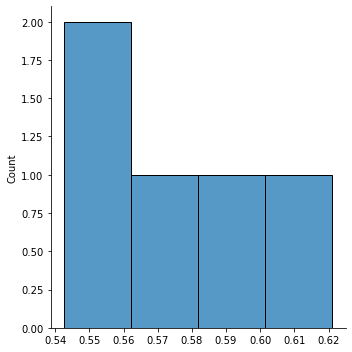

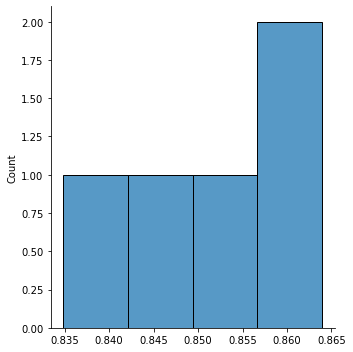

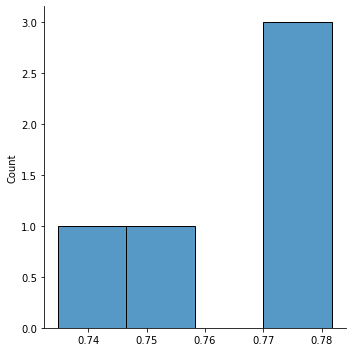

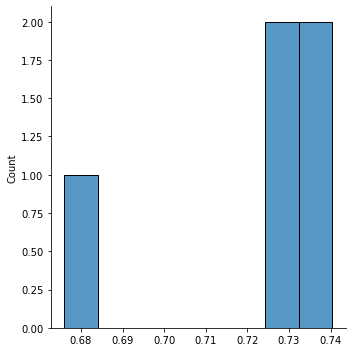

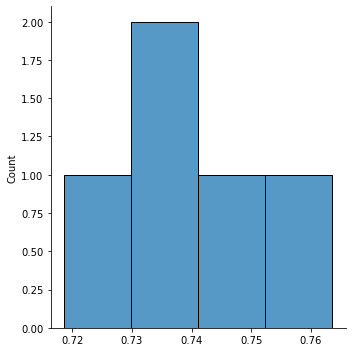

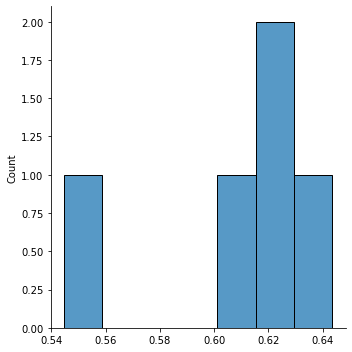

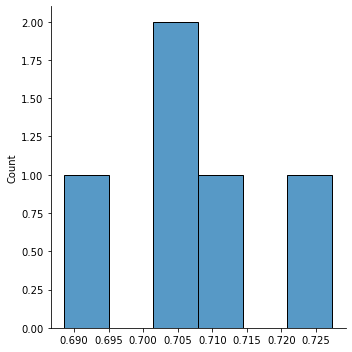

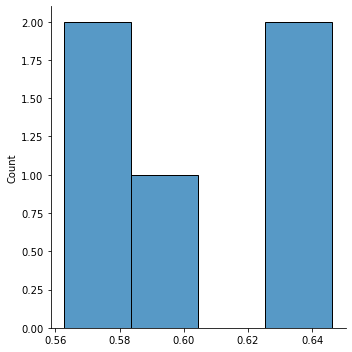

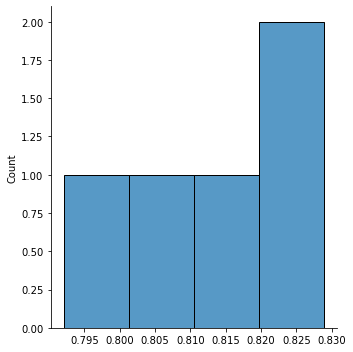

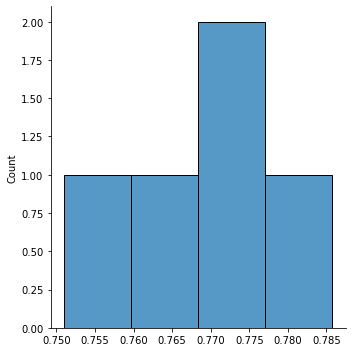

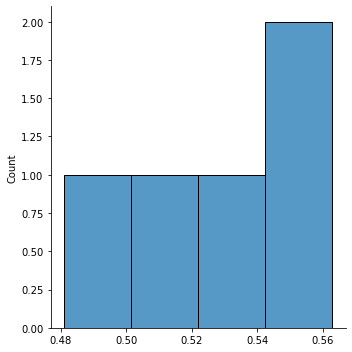

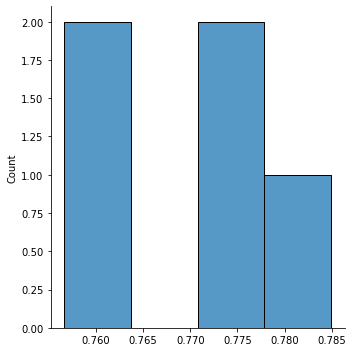

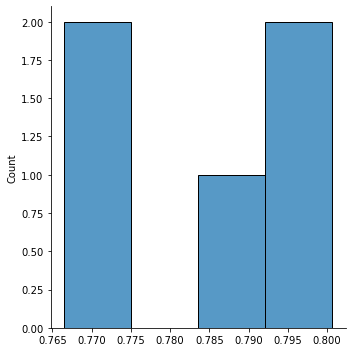

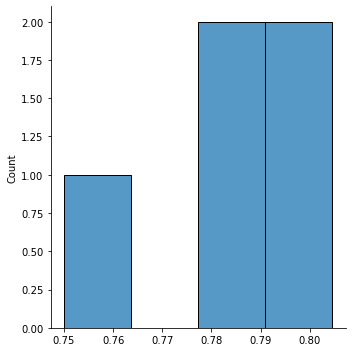

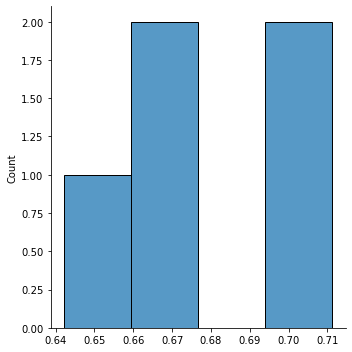

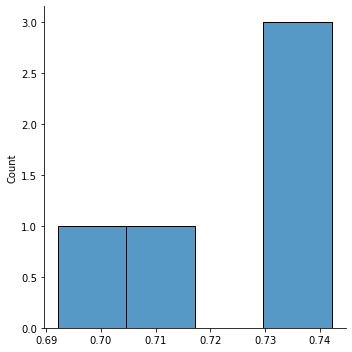

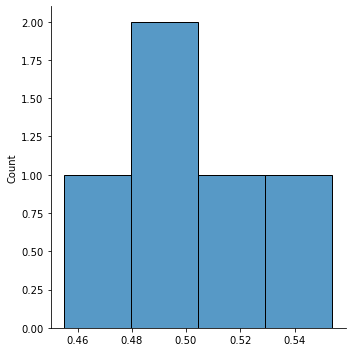

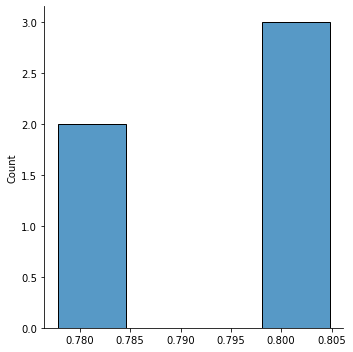

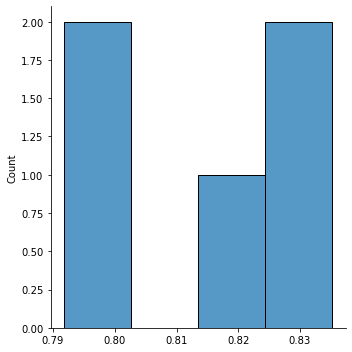

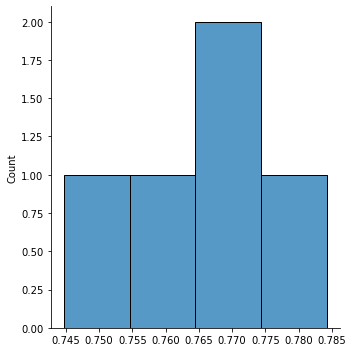

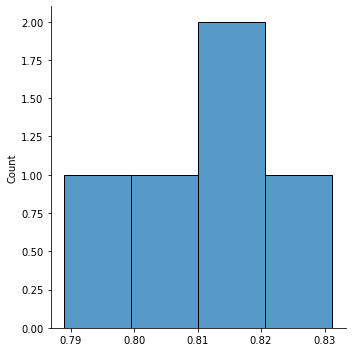

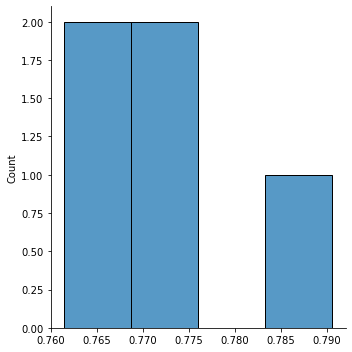

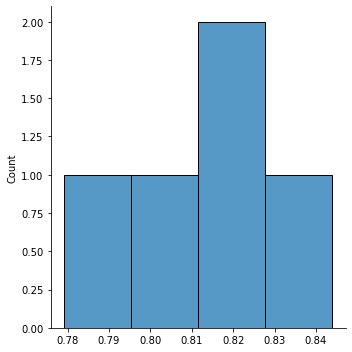

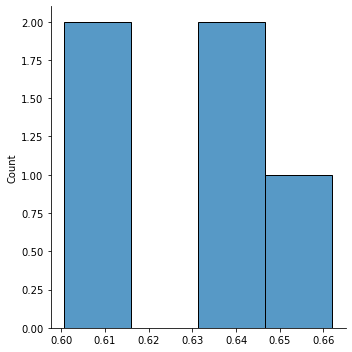

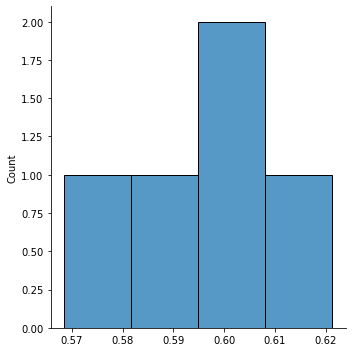

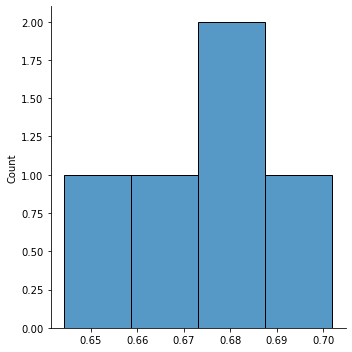

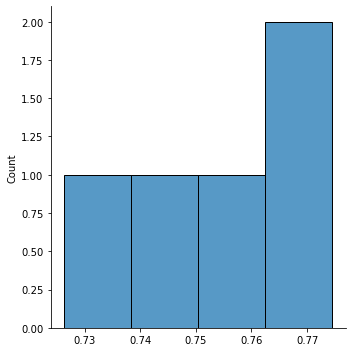

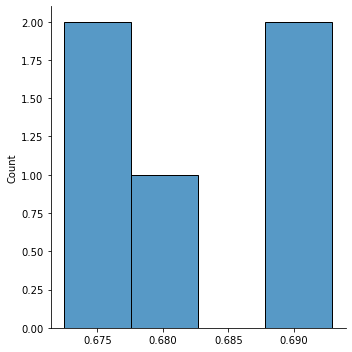

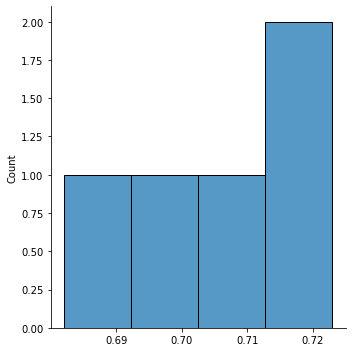

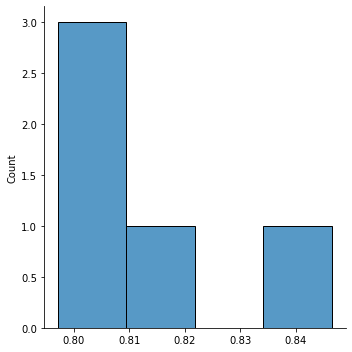

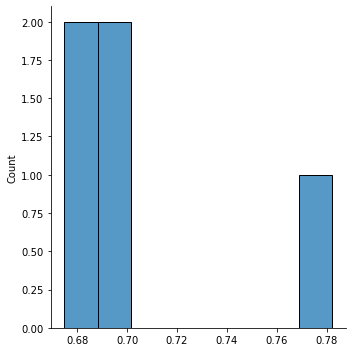

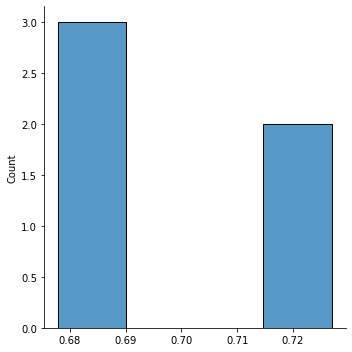

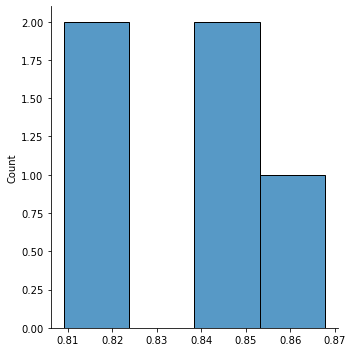

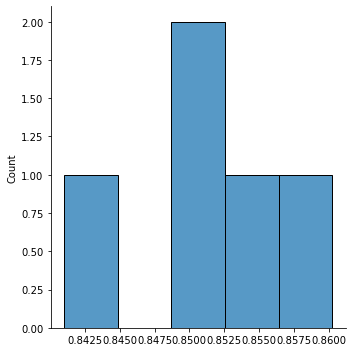

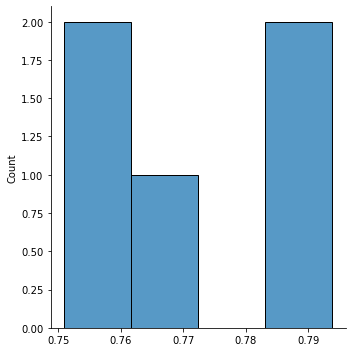

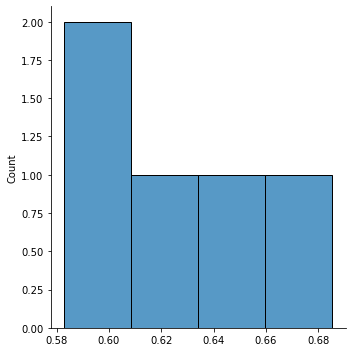

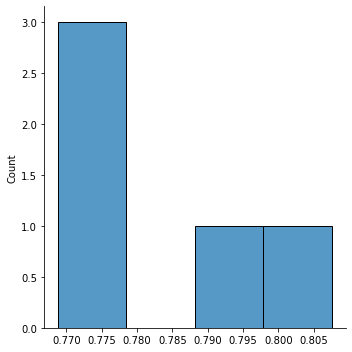

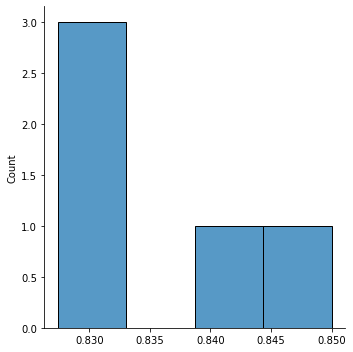

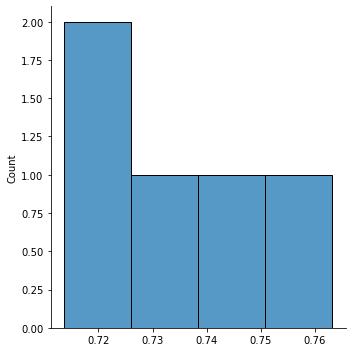

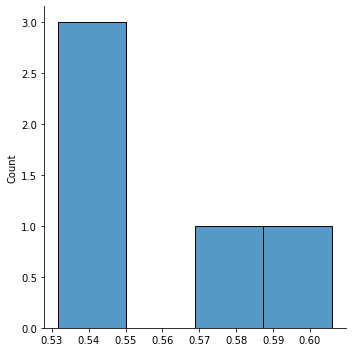

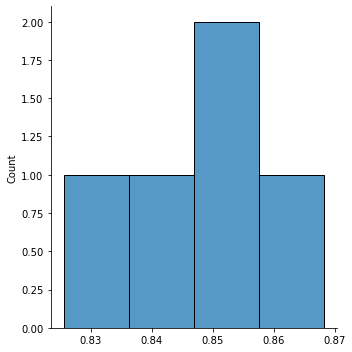

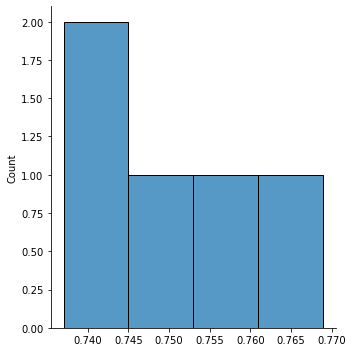

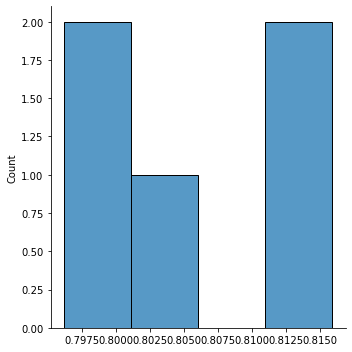

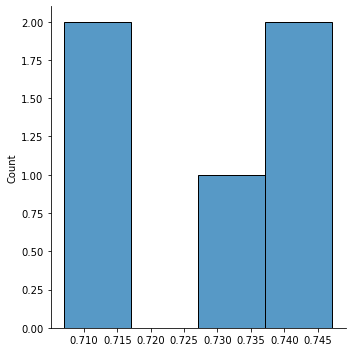

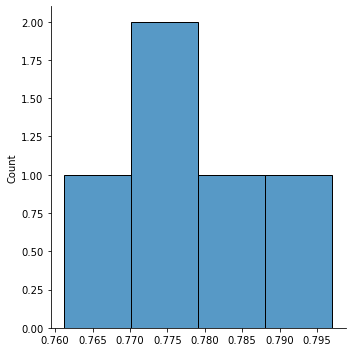

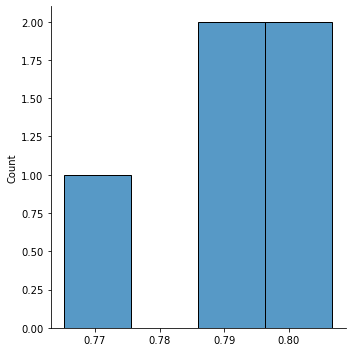

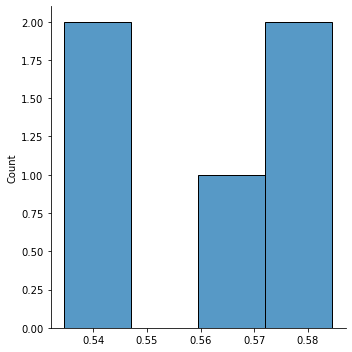

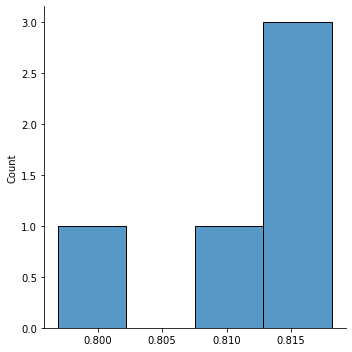

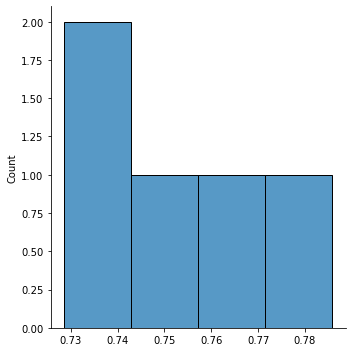

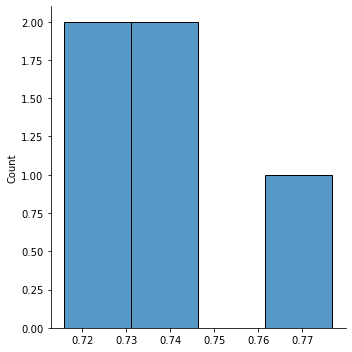

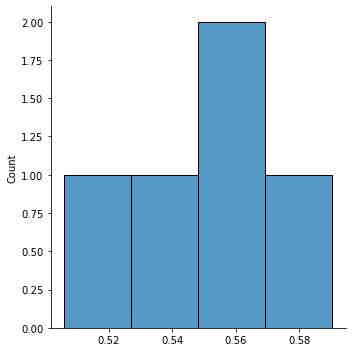

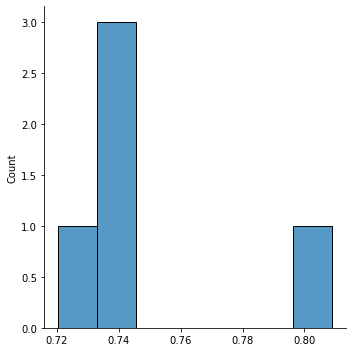

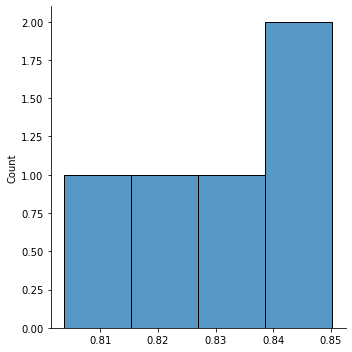

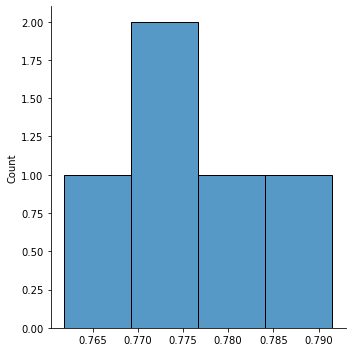

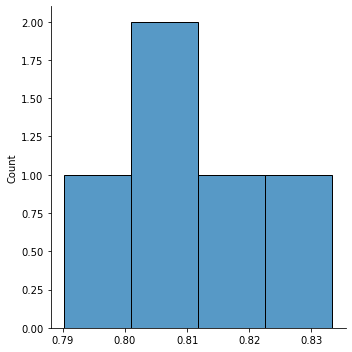

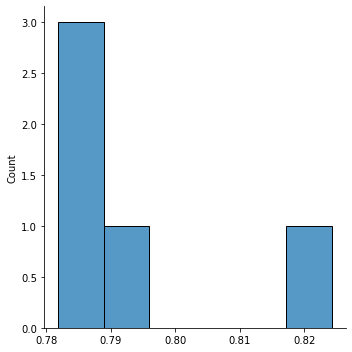

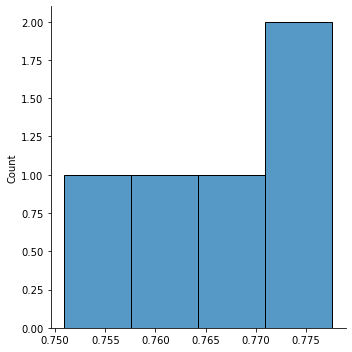

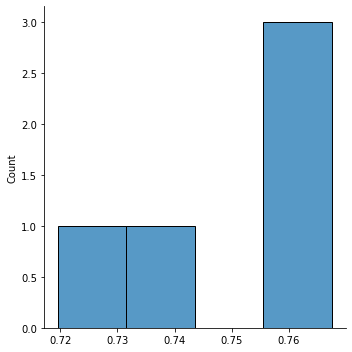

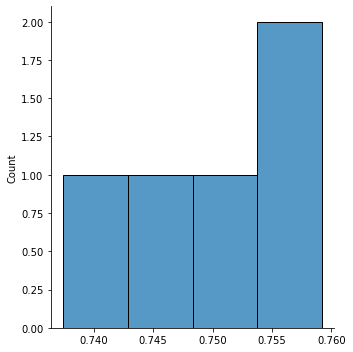

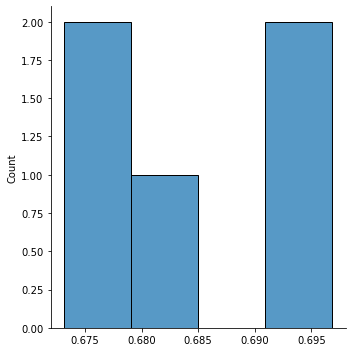

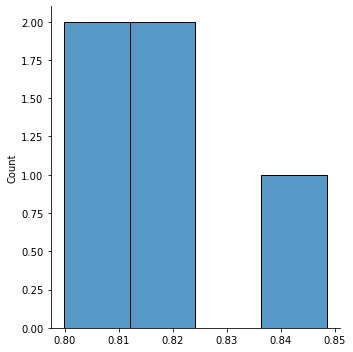

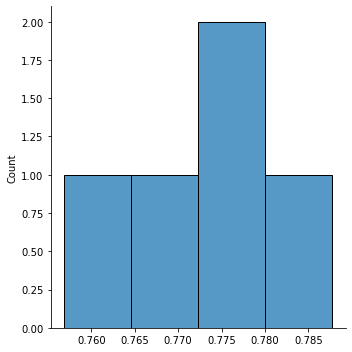

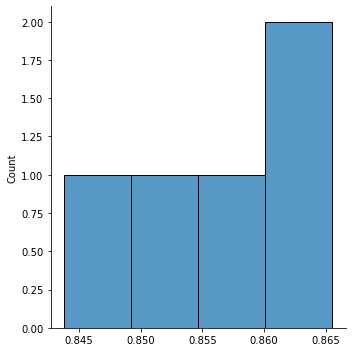

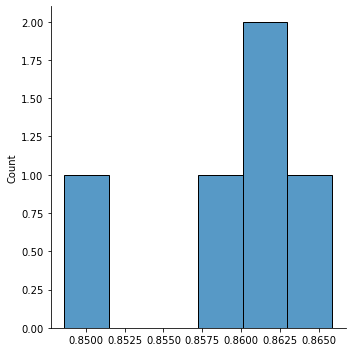

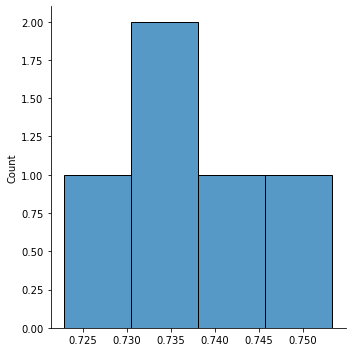

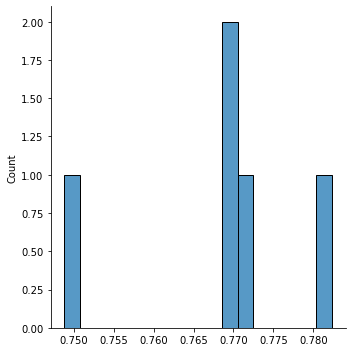

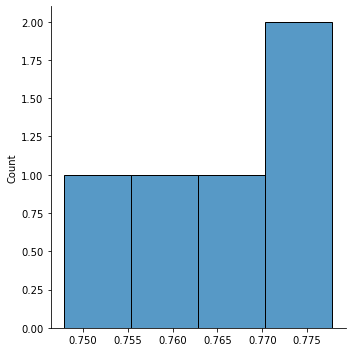

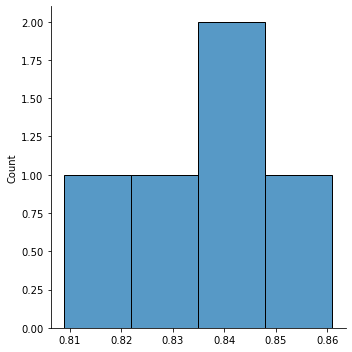

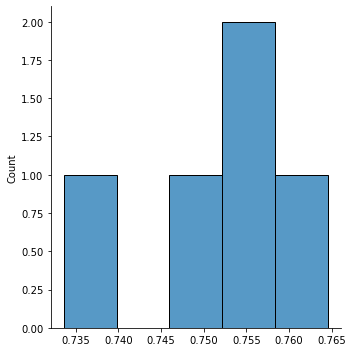

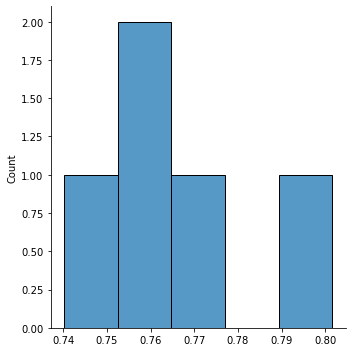

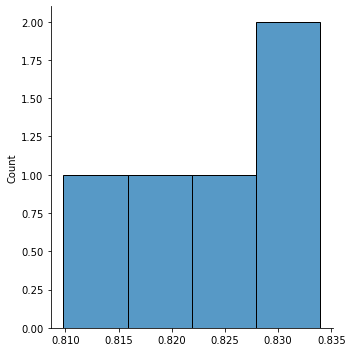

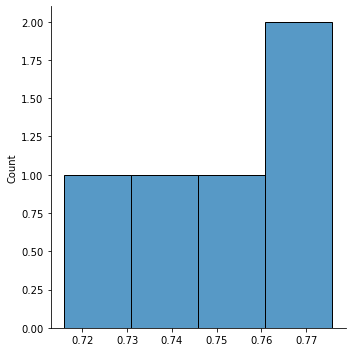

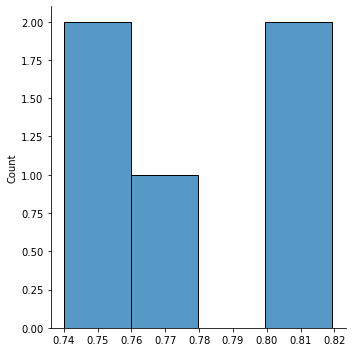

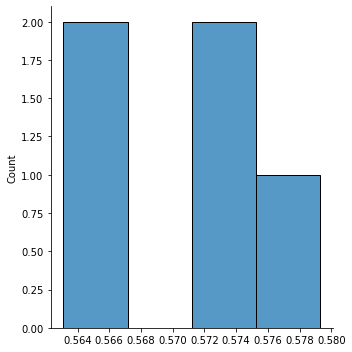

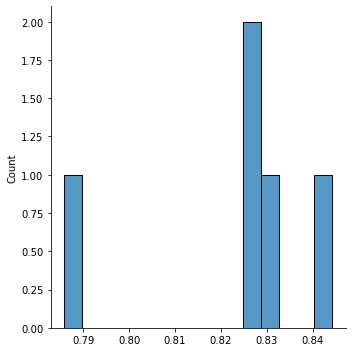

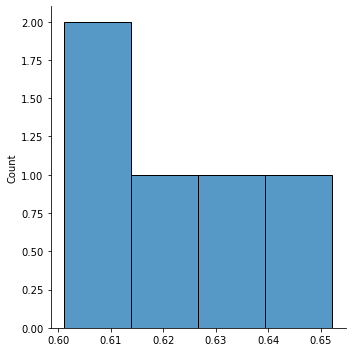

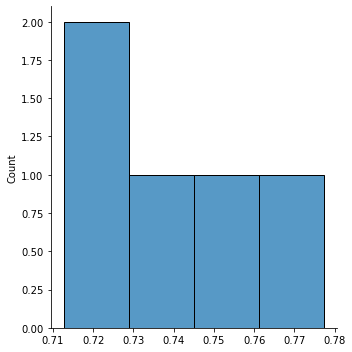

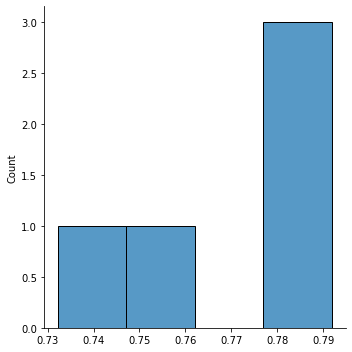

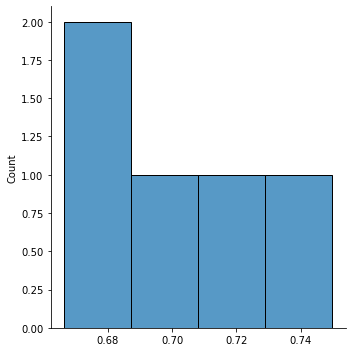

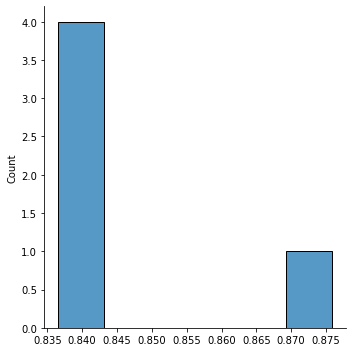

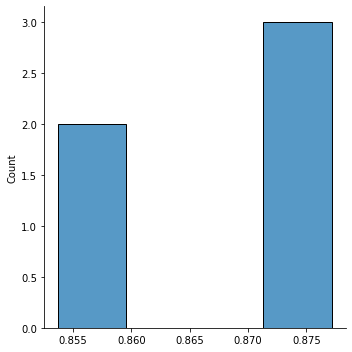

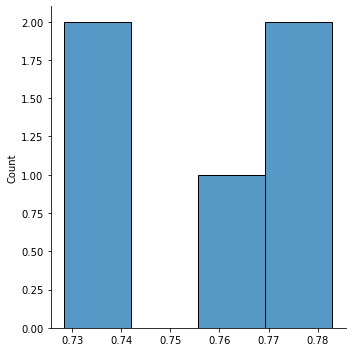

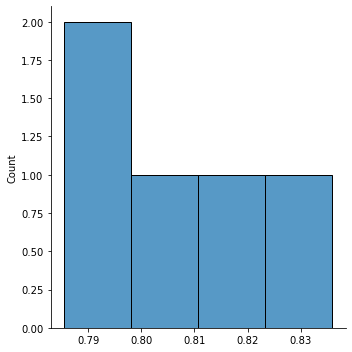

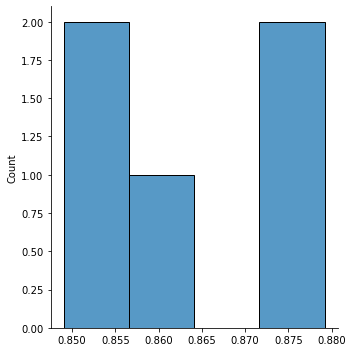

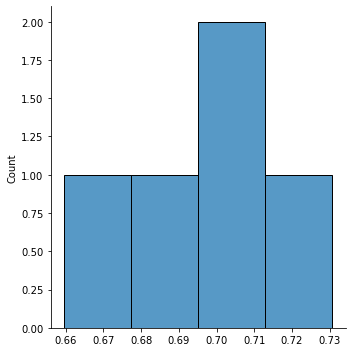

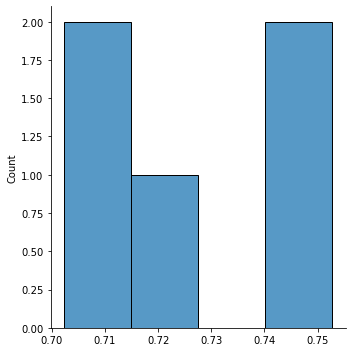

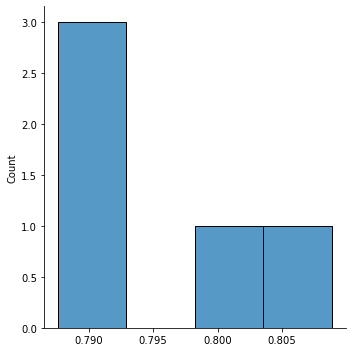

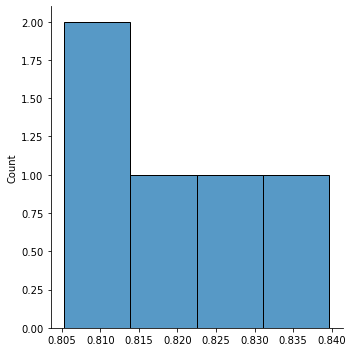

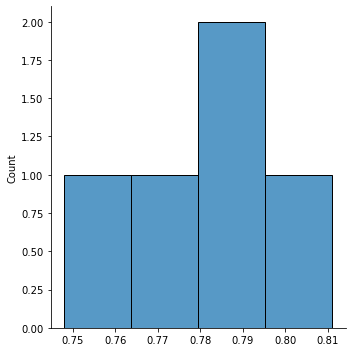

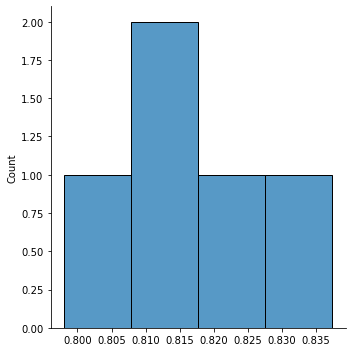

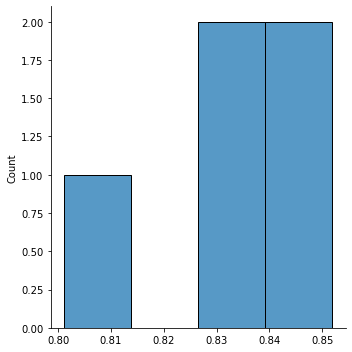

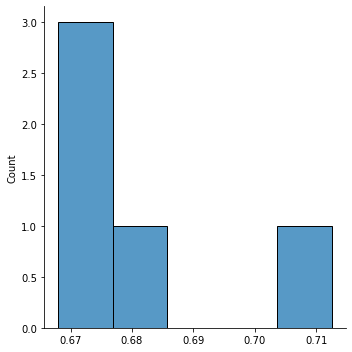

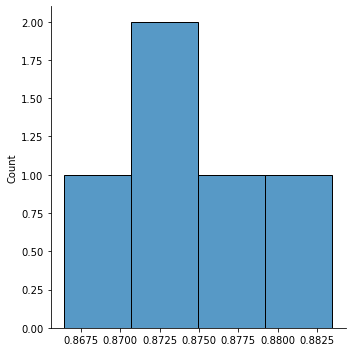

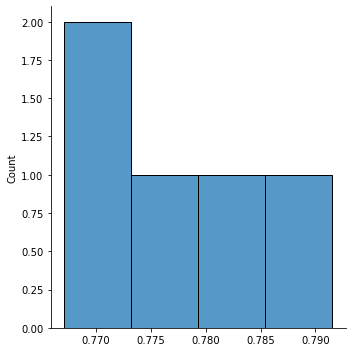

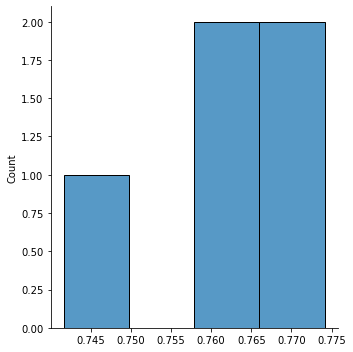

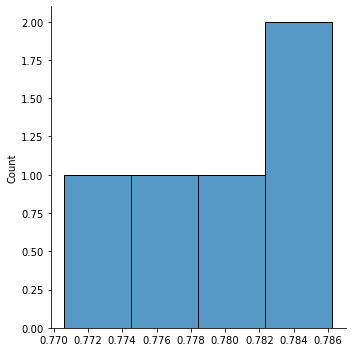

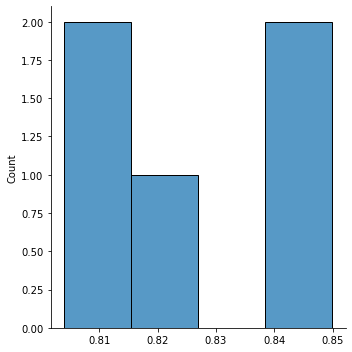

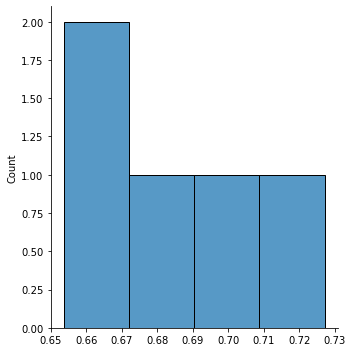

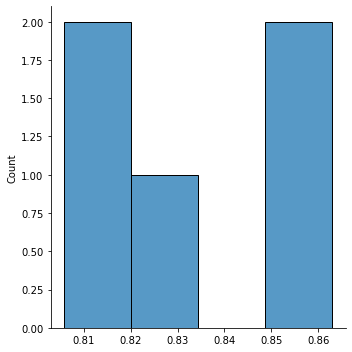

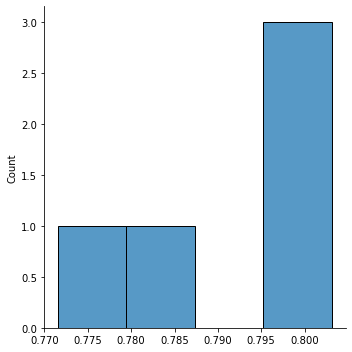

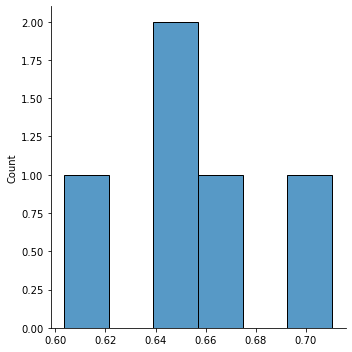

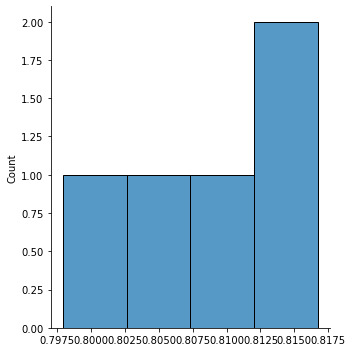

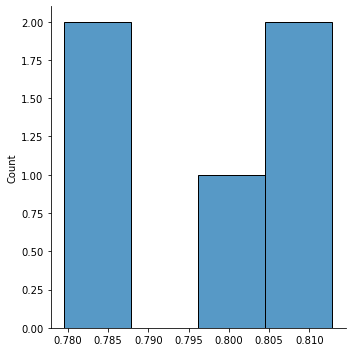

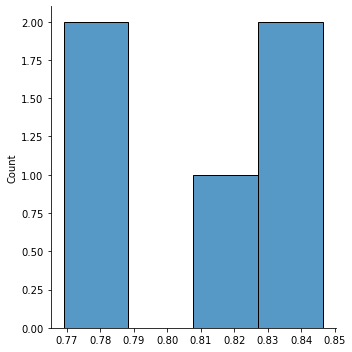

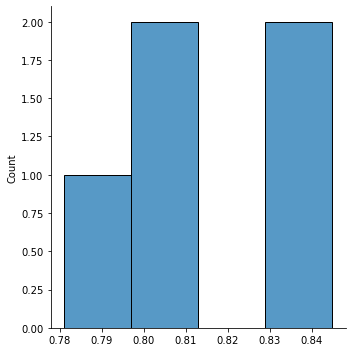

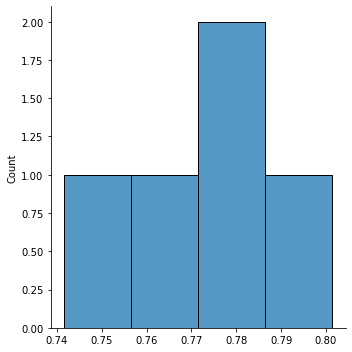

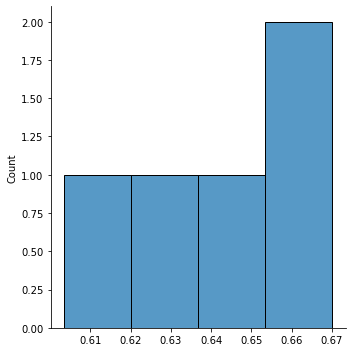

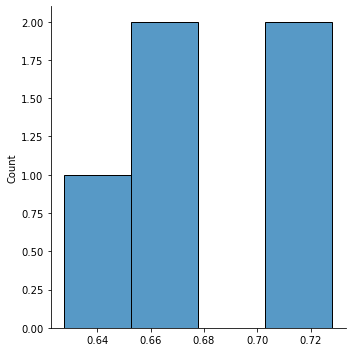

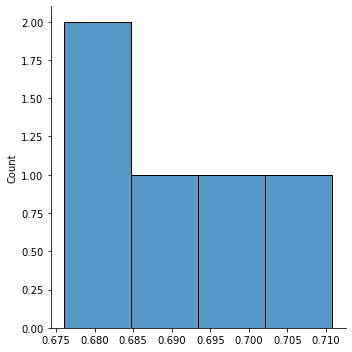

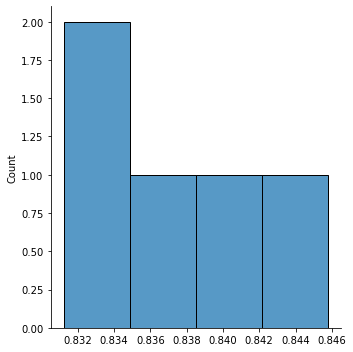

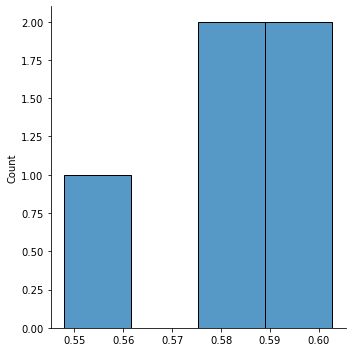

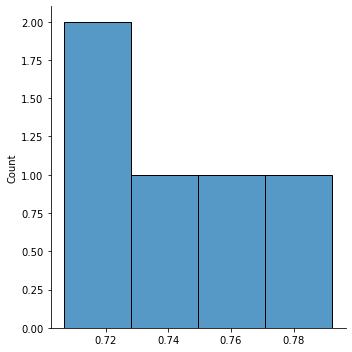

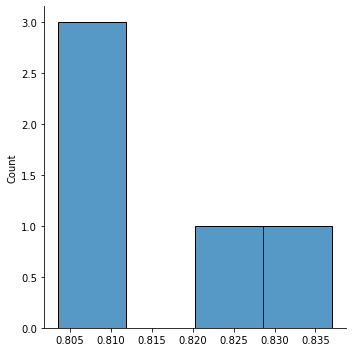

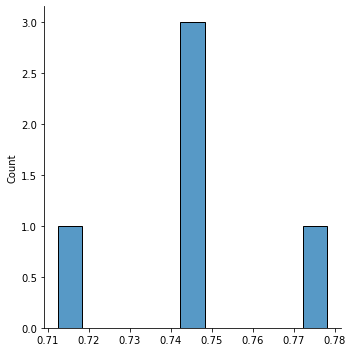

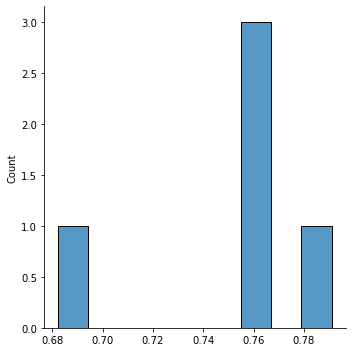

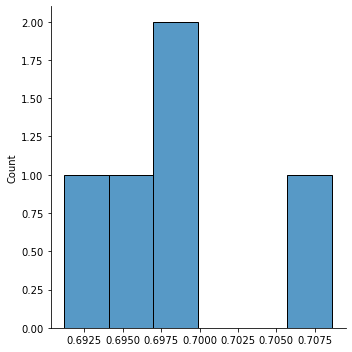

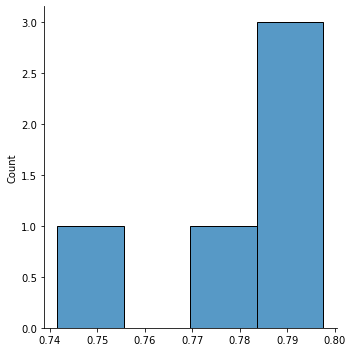

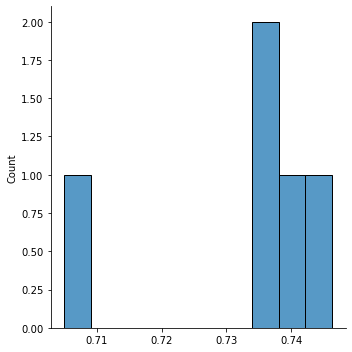

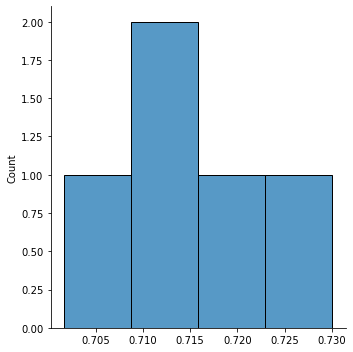

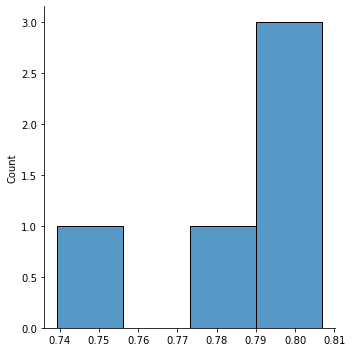

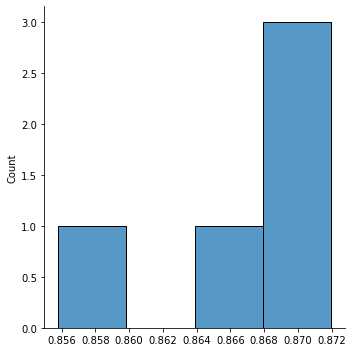

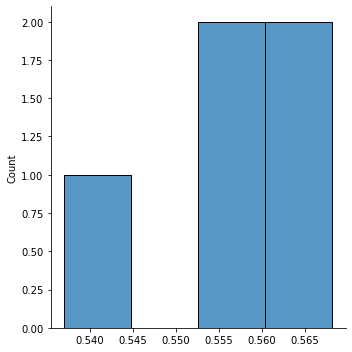

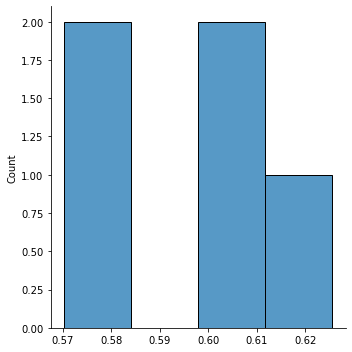

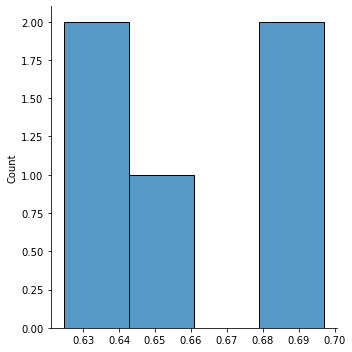

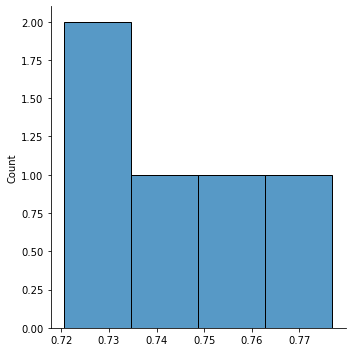

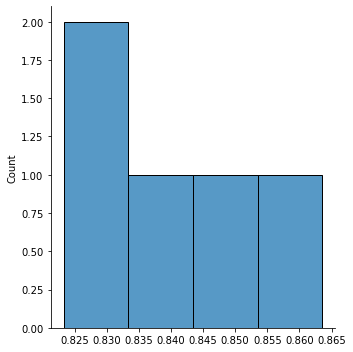

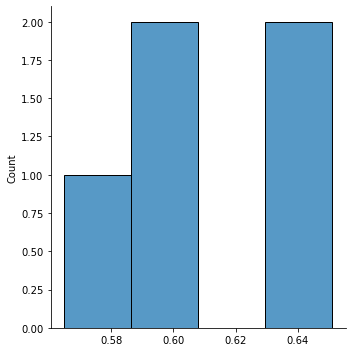

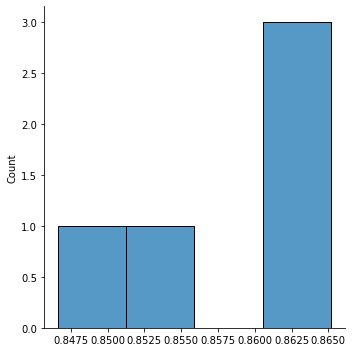

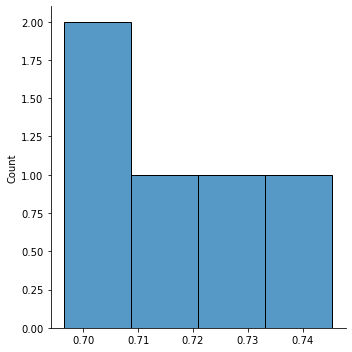

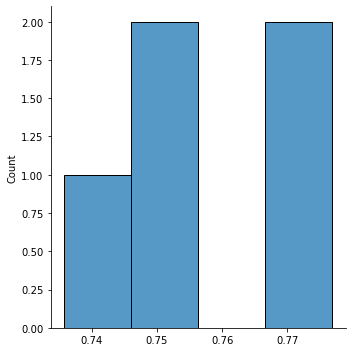

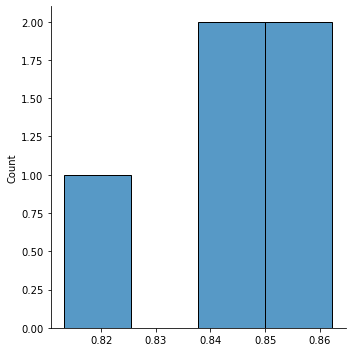

In [33]:
import time 
r_squareds = list()
r_squareds_randomized_testtrain = list()
r_squareds_train = list()
MAEs = list()
MAEs_train = list()
start = time.time()
r2_max = 0
for rand in range (0, 500):
    indices = np.arange(len(features))
    train_features, test_features, train_labels, test_labels, idxtrain, idx_test = \
                      train_test_split(features, labels, 
                      indices, test_size = 0.15, random_state=rand, stratify=df1['Material'])
    r_squareds = list()
    r_squareds_train = list()
    MAEs = list()
    MAEs_train = list()
    for random_state in range(5):
        # Instantiate model with 1000 decision trees
        xgbr_graphyield =  XGBRegressor(max_depth=4, n_estimators=51, gamma=0.07, 
                   learning_rate = 0.118, subsample=0.725, min_child_weight = 2, 
                  random_state=random_state)
        #xgbr_graphyield = RandomForestRegressor(max_depth=20, n_estimators=500, min_samples_split=3)
        """
        xgbr_graphyield = MLPRegressor(hidden_layer_sizes=(500, 500, 500), activation='logistic', batch_size=2,
                   alpha=0.00001, learning_rate = 'adaptive', solver='adam', random_state=random_state)    
        """
        # Train the model on training data
        xgbr_graphyield.fit(train_features, train_labels);
        # Use the forest's predict method on the test data
        predictions = xgbr_graphyield.predict(test_features)
        # Calculate the absolute errors
        errors = abs(predictions - test_labels)
        MAEs.append(errors)
        # Print out the mean absolute error (mae)
        #print('Mean Absolute Error:', round(np.mean(errors), 4), 'units.')

        r_squared = r2_score(test_labels, predictions)
        r_squareds.append (r_squared)
    
        pred_train = xgbr_graphyield.predict(train_features)
        errors = abs(pred_train - train_labels)
        MAEs_train.append(errors)
        r_squared = r2_score(train_labels, pred_train)
        r_squareds_train.append(r_squared)
        #print('r2 score = ', r_squared)

    print ('Average of r_squared for test', np.mean(np.array(r_squareds)))
    print ('std of r_squared for test', np.std(np.array(r_squareds)), '\n')

    print ('Average of r_squared for train', np.mean(np.array(r_squareds_train)))
    print ('std of r_squared for train', np.std(np.array(r_squareds_train)))
    # train accuracy
    pred_train = xgbr_graphyield.predict(train_features)
    # Calculate the absolute errors
    errors_train = abs(pred_train - train_labels)
    # Print out the mean absolute error (mae)
    print('Mean Absolute Error:', round(np.mean(errors_train), 4), 'units.')
    r_squared_train = r2_score(train_labels, pred_train)
    print('r2 score = ', r_squared_train)
    end = time.time()
    print ('time is: ', end-start)

    pred_test = xgbr_graphyield.predict(test_features)
    # Calculate the absolute errors
    errors_test = abs(pred_test - test_labels)
    # Print out the mean absolute error (mae)
    print('Mean Absolute Error for test:', round(np.mean(errors_test), 4), 'units.')
    r_squared_test = r2_score(test_labels, pred_test)
    if r_squared_test>r2_max:
        r2_max = r_squared_test
        rand_split = rand
    print('r2 score = ', r_squared_test)
    print ('****')

    sns.displot(r_squareds)
    r_squareds_randomized_testtrain.append (r_squareds)


r_squareds_randomized_testtrain_vec = np.array ((r_squareds_randomized_testtrain))
np.mean (r_squareds_randomized_testtrain_vec)

r_squareds_randomized_testtrain_vec = np.array ((r_squareds_randomized_testtrain))
r_squareds_randomized_testtrain_mean = np.mean (r_squareds_randomized_testtrain_vec, axis=1)
print (r_squareds_randomized_testtrain_mean)
print (np.mean(r_squareds_randomized_testtrain_mean))
print (np.mean(r_squareds_randomized_testtrain_vec))

In [31]:
print (np.mean(r_squareds_randomized_testtrain_vec))

NameError: name 'r_squareds_randomized_testtrain_vec' is not defined

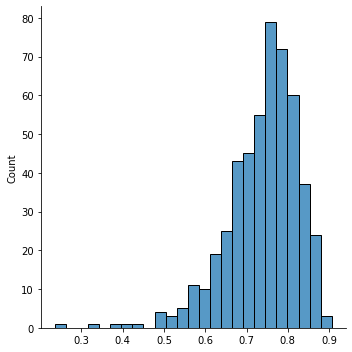

In [35]:
sns.displot (r_squareds_randomized_testtrain_mean)
plt.savefig('r_squareddist_jacob_model2_mean70.png', dpi=200)

In [ ]:
#### Performance on test data
train_predictions = clf.predict(train_features)

# Plot style
fig, ax = plt.subplots(figsize=(6,4))
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='14')
# ax.set_xlim(20,105)
# ax.set_ylim(20,105)

# Predicted 2D/G
plt.plot(train_predictions, train_labels, linestyle = 'none', marker = 'o', color='black', markersize='8')
plt.title('Training Data', fontsize='18', fontname='Arial', fontweight='bold')
plt.xlabel('Predicted', fontsize='18', fontname='Arial', fontweight='bold')
plt.ylabel('Actual', fontsize='18', fontname='Arial', fontweight='bold')
ymin, ymax = plt.ylim()
plt.xlim(ymin, ymax)
plt.ylim(ymin, ymax)
# Make a red line to show perfect predictions
x2 = np.arange(0, ymax*1.1, .1)
y2 = np.arange(0, ymax*1.1, .1)
plt.plot(x2,y2, linestyle='--', linewidth = '3', color='red')

# Save
plt.tight_layout()
# plt.savefig('TrainingData2DtoG_RF.png', dpi=300)
plt.show()

r_squared = r2_score(train_labels, train_predictions)
print('r2 score = ', r_squared)
mae = mean_absolute_error(train_labels, train_predictions)
print('MAE = ', mae)
# corr, _ = pearsonr(train_labels, train_predictions)
# print('Pearsons correlation: %.3f' % corr)
# acc = accuracy_func(train_predictions, train_labels)
# print('Accuracy: %.3f' % acc)

In [ ]:
# Grid Search CV
from sklearn.model_selection import GridSearchCV
gsc = GridSearchCV(
        estimator=XGBRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (45,50,51,52),
            'min_child_weight': range(2,5),
            'learning_rate': np.linspace(0.07, 0.13, 6),
            'subsample': np.linspace(0.7, 0.8, 5),
            'gamma': np.linspace(0.07, 0.13, 6)
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_result = gsc.fit(train_features, train_labels)
best_params = grid_result.best_params_
print('Max Depth: ', best_params["max_depth"])
print('N Estimators: ', best_params["n_estimators"])
print('Min Child Weight: ', best_params["min_child_weight"])
print('Learning Rate: ', best_params["learning_rate"])
print('Subsample: ', best_params["subsample"])
print('Gamma: ', best_params["gamma"])

In [ ]:
# Random forest
gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'min_samples_split': range(2,5),
            'n_estimators': (200, 500, 1000)
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_result = gsc.fit(train_features, train_labels)
best_params = grid_result.best_params_
print('Max Depth: ', best_params["max_depth"])
print('Min samples split: ', best_params["min_samples_split"])
print('N Estimators: ', best_params["n_estimators"])

In [ ]:
# Decision tree
gsc = GridSearchCV(
        estimator=DecisionTreeRegressor(),
        param_grid={
            'max_depth': range(3,7), 
            'min_samples_split': range(2,4)
            # 'learning_rate': (0.0001, 0.001, 0.01, 0.1, 0.2), 
            # 'n_estimators': (100, 200, 300, 400, 500)
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_result = gsc.fit(train_features, train_labels)
best_params = grid_result.best_params_
print('Max depth: ', best_params["max_depth"])
print('Min samples split: ', best_params["min_samples_split"])

In [ ]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [ ]:
# Plot style
fig, ax = plt.subplots(figsize=(5,4))
# ax.set_yticks(np.arange(.2, 2.2, .2))
# ax.set_xticks(np.arange(0, 1200, 100))
# ax.set_xlim(.7,3.3)

# Import file
filename='FJH_ML_Final.csv'
df = import_file_noOneHot(filename)
# Create normalized I by category
norm1, norm2 = category_normalization_theonesyoualwaysuse(df)
df['Norm_I_Max'] = norm1
df['Norm_charge_tot'] = norm2
df['charge_density'] = df['Voltage']*df['Cap']/df['Mass']
# df['test_feature'] = (df['Voltage']/df['Mass'])#*df['PulseTime']
# df = df[df['TwoDtoG']<1.5]
# df = df[df['Graphene_Yield']>20]

# Cut dataframe to only the test set
df = df.iloc[idx2]
df['y_pred'] = y_pred
df['y_true'] = y_true

groups = df.groupby(['Material'])

# Plot
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='14')
counter=0
markers = ['o', 's', '^', 'v']
colors=['blue', 'red', 'green', 'orange']
colors2 = ['maroon', 'darkorange', 'goldenrod', 'dodgerblue']
for name, group in groups:
    ax.plot(group.y_pred, group.y_true, marker=markers[counter], alpha=0.9, linestyle='', ms=8, label=name)
    counter+=1
    # Predicted 2D/G
# plt.title('Test Data', fontsize='18', fontname='Arial', fontweight='bold')
ax.set_xlabel('Predicted Yield (%)', fontsize='18', fontname='Arial', fontweight='bold')
ax.set_ylabel('Actual Yield (%)', fontsize='18', fontname='Arial', fontweight='bold')
ymin, ymax = plt.ylim()
ax.set_xlim(ymin, ymax)
ax.set_ylim(ymin, ymax)
# Make a red line to show perfect predictions
x2 = np.arange(ymin, ymax*1.1, .01)
y2 = np.arange(ymin, ymax*1.1, .01)
ax.plot(x2,y2, linestyle='--', linewidth = '3', color='red')
leg = plt.legend(frameon="True", prop={'family': 'Arial'})
ax.legend(frameon=False, ncol=2, fontsize=12, loc='upper left')

# Plot
# plt.plot(df['I_Max'],df['Graphene_Yield'], linestyle = 'none', marker = 'o', color='black', markersize='8')
# plt.xlabel('Flash Voltage (V)', fontsize='18', fontname='Arial', fontweight='bold')
# plt.ylabel('D/G Ratio', fontsize='18', fontname='Arial', fontweight='bold')

# Save
plt.tight_layout()
plt.savefig('XGBPerformanceJune25.png', dpi=300)
plt.show()

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(6,4))
ax.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='14')
for name, group in groups:
    p = ax.scatter(group.y_pred, group.y_true, c=group.charge_density, marker='o', s=100, cmap='Blues')
    
cb = fig.colorbar(p, ax=ax)
cb.set_label('Charge Density (C/g)', fontsize='18', fontname='Arial', fontweight='bold')
cb.ax.tick_params(labelsize=14)

# plt.title('Test Data', fontsize='18', fontname='Arial', fontweight='bold')
ax.set_xlabel('Predicted Yield', fontsize='18', fontname='Arial', fontweight='bold')
ax.set_ylabel('Actual Yield', fontsize='18', fontname='Arial', fontweight='bold')
ymin, ymax = plt.ylim()
ax.set_xlim(ymin, ymax)
ax.set_ylim(ymin, ymax)
# Make a red line to show perfect predictions
x2 = np.arange(ymin, ymax*1.1, .01)
y2 = np.arange(ymin, ymax*1.1, .01)
ax.plot(x2,y2, linestyle='--', linewidth = '3', color='red')
# ax.legend(fontsize=12)

# Plot
# plt.plot(df['I_Max'],df['Graphene_Yield'], linestyle = 'none', marker = 'o', color='black', markersize='8')
# plt.xlabel('Flash Voltage (V)', fontsize='18', fontname='Arial', fontweight='bold')
# plt.ylabel('D/G Ratio', fontsize='18', fontname='Arial', fontweight='bold')

# Save
plt.tight_layout()
# plt.savefig('XGB_Regression_Performance_colorChargeDensity.png', dpi=300)
plt.show()

In [ ]:
# Train neural network
from sklearn.model_selection import GridSearchCV
gsc = GridSearchCV(
        estimator=MLPRegressor(),
        param_grid={'hidden_layer_sizes': [(100, 100, 100), (10,10,10), (50,50,50), (200, 200, 200)],
          'activation': ['relu','tanh','logistic'],
          'alpha': [0.05, 0.10, 0.12, 0.15],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam'],
          'n_iter_no_change': range(3,7)
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_result = gsc.fit(train_features, train_labels)
best_params = grid_result.best_params_
print('hidden layer: ', best_params["hidden_layer_sizes"])
print('activation: ', best_params["activation"])
print('learning_rate: ', best_params["learning_rate"])
print('solver ', best_params["solver"])
print('alpha ', best_params["alpha"])
print('N_iter_no_change ', best_params["n_iter_no_change"])

In [ ]:
#M2 Multilayer Perceptron
model = 'M2 MLP'
print(model)
def build_mlp(units = 20, optimizer = 'rmsprop'):
    mlp = Sequential()
    mlp.add(Dense(units = units, activation = 'relu', input_dim = features.shape[1]))
    mlp.add(Dense(units = units, activation = 'relu', ))
    mlp.add(Dense(units = 1))
    mlp.compile(optimizer = optimizer, 
                loss='mean_squared_error', 
                metrics = ['mae'])
    return mlp
mlp = KerasRegressor(build_fn = build_mlp, verbose = 0)
grid_param_mlp = {'units': [20, 40, 60],
                    'batch_size': [16, 32, 64, 128],
                    'epochs': [100, 500, 1000],
                    'optimizer': ['rmsprop', 'adam']}
grid_param_mlp = {'units': [20],
                    'batch_size': [ 128],
                    'epochs': [100],
                    'optimizer': ['adam']}
grid_mlp = GridSearchCV(mlp, grid_param_mlp) 
grid_mlp.fit(train_features, train_labels)
y_pred_train_mlp = grid_mlp.predict(train_features)
y_pred_test_mlp = grid_mlp.predict(test_features)
#df_eval_mlp = save_evaluate_draw(y_pred_train_mlp, y_pred_test_mlp, 
#                                grid_param_mlp, grid_mlp.best_params_, 
#                                grid_mlp.best_estimator_, model)

print('Doneskies')


In [ ]:
feature_names = ['CB SM', 'MC SM', 'A$\mathregular{_{IT}}$', 'I$\mathregular{_{Max}}$', 'CD', 'I$\mathregular{_{f}}$/I$\mathregular{_{Max}}$']
pdp = partial_dependence(clf, features, (5,4))
print('Done!')

In [ ]:
# 3,4 then 2,4 then 2,3 then 5,4
# 4 is CD, 3 is Imax, 2 is AIT, 5 is If/Imax

X=pdp[1][0]
Y=pdp[1][1]
Z=pdp[0][0]
X, Y = np.mgrid[0:X:100j, 0:Y:100j]

resultX = ndimage.zoom(X, 10.0)
resultY = ndimage.zoom(Y, 10.0)
resultZ = ndimage.zoom(Z, 10.0)

fig, ax2 = plt.subplots(figsize=(10,8))
ax2 = plt.axes(projection='3d')
ax2.plot_surface(resultX, resultY, resultZ, rstride=1, cstride=1, cmap='Oranges', alpha=0.7, shade=False, antialiased=True)
plt.show()

In [ ]:
X=pdp[1][0]
Y=pdp[1][1]
Z=pdp[0][0]

In [ ]:
X

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(figsize=(9,7))
ax = plt.axes(projection='3d')
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
# ax.tick_params(direction='in', length=4, width=1.5, grid_alpha=0, labelsize=16)

# Now set color to white (or whatever is "invisible")
# ax.xaxis.pane.set_edgecolor('w')
# ax.yaxis.pane.set_edgecolor('w')
# ax.zaxis.pane.set_edgecolor('w')
# Bonus: To get rid of the grid as well:
# ax.grid(False)
ax.tick_params(direction='in', length=4, width=1.5, grid_alpha=0, labelsize=20)

cset = ax.contourf(resultX, resultY, resultZ, zdir='z', offset=np.min(Z), cmap='Greens')
# cset = ax.contourf(X, Y, Z, zdir='x', offset=0, cmap='Oranges')
# cset = ax.contourf(X, Y, Z, zdir='y', offset=165, cmap='Oranges')
# print(Z)

surf = ax.plot_surface(resultX, resultY, resultZ, rstride=1, cstride=1, cmap='Greens', alpha=0.7, shade=False, antialiased=True)
cb = fig.colorbar(surf, shrink=0.5, aspect=8)
for t in cb.ax.get_yticklabels():
     t.set_fontsize(20)

ax.set_xlabel('\n\nI$\mathregular{_{F}}$/I$\mathregular{_{Max}}$ (a.u.)', fontfamily='Arial', fontweight='bold', fontsize=28, linespacing=3)
# ax.set_xlabel('\nA$\mathregular{_{IT}}$ (C/g)', fontfamily='Arial', fontweight='bold', fontsize=28)
# ax.set_xlabel('\nI$\mathregular{_{Max}}$ (A/g)', fontfamily='Arial', fontweight='bold', fontsize=28)
ax.set_ylabel('\n\nCD (C/g)', fontfamily='Arial', fontweight='bold', fontsize=28, linespacing=3)
ax.set_zlabel('\nPD (%)', fontfamily='Arial', fontweight='bold', fontsize=28, linespacing=3)
# ax.view_init(30, -150)

ax.set_yticks([0, 30, 60, 90, 120, 150])

plt.savefig('3Dplot4_IfImax_CD_PD.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print(len(errors))

print(errors)

In [ ]:
# plot single tree
plot_tree(clf, num_trees=5, rankdir='LR')
plt.savefig('XGBtree.png', dpi=300)
plt.show()

In [ ]:

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = clf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree2.dot', feature_names = feature_list, rounded = True, precision = 1)

In [ ]:
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree2.dot')
# Write graph to a png file
graph.write_png('sampleTree.png')

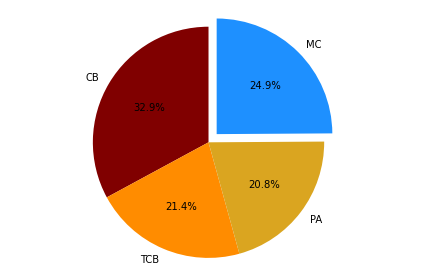

In [4]:
import matplotlib.pyplot as plt

x = 100
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
features2 = ['CB', 'TCB', 
             'PA', 'MC']
importances2 = [32.9/x, 21.4/x, 20.8/x, 24.9/x]
colors = ['maroon', 'darkorange', 'goldenrod', 'dodgerblue']
explode = (0, 0.0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.tick_params(direction='in', length=4, width=1.5, colors='black', grid_alpha=0, labelsize='16')
ax1.pie(importances2, explode=explode, labels=features2, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Format and save
plt.tight_layout()
plt.savefig('Materialmetrics.png', dpi=300) # Change file name